In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

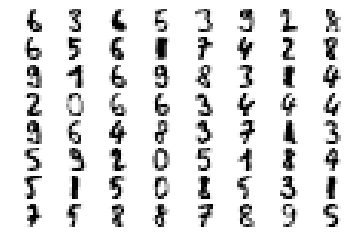

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.57378 stdev: 0.27533
Best fitness: 0.90043 - size: (2, 13) - species 1 - id 23
Average adjusted fitness: 0.519
Mean genetic distance 2.936, standard deviation 0.472
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 8.629 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.70516 stdev: 0.25856
Best fitness: 0.91342 - size: (2, 14) - species 8 - id 281
Average adjusted fitness: 0.583
Mean genetic distance 2.992, standard deviation 0.483
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.122 sec (7.875 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.78379 stdev: 0.19678
Best fitness: 0.94805 - size: (3, 15) - species 3 - id 488
Average adjusted fitness: 0.637
Mean genetic distance 3.047, standard deviation 0.492
Population of 203 members in 32 species
T

Population's average fitness: 0.71820 stdev: 0.18602
Best fitness: 0.91156 - size: (4, 15) - species 5 - id 840
Average adjusted fitness: 0.505
Mean genetic distance 3.136, standard deviation 0.519
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 9.174 sec (8.701 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.74583 stdev: 0.17596
Best fitness: 0.91156 - size: (4, 15) - species 5 - id 840
Average adjusted fitness: 0.518
Mean genetic distance 3.158, standard deviation 0.508
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 9.344 sec (8.808 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.74906 stdev: 0.17771
Best fitness: 0.91342 - size: (3, 14) - species 2 - id 1057
Average adjusted fitness: 0.542
Mean genetic distance 3.154, standard deviation 0.508
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 13.923 sec (9.539 average)

 ****** Runni

Population's average fitness: 0.73609 stdev: 0.14460
Best fitness: 0.88497 - size: (4, 17) - species 7 - id 1406
Average adjusted fitness: 0.522
Mean genetic distance 3.038, standard deviation 0.521
Population of 208 members in 29 species
Total extinctions: 0
Generation time: 9.490 sec (8.745 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.74379 stdev: 0.14771
Best fitness: 0.88497 - size: (4, 17) - species 7 - id 1406
Average adjusted fitness: 0.530
Mean genetic distance 3.035, standard deviation 0.510
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 10.166 sec (8.887 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.75368 stdev: 0.12859
Best fitness: 0.88497 - size: (4, 17) - species 7 - id 1406
Average adjusted fitness: 0.537
Mean genetic distance 3.046, standard deviation 0.518
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 9.716 sec (9.098 average)

 ****** Ru

Population's average fitness: 0.68164 stdev: 0.12223
Best fitness: 0.84787 - size: (3, 15) - species 14 - id 668
Average adjusted fitness: 0.373
Mean genetic distance 3.207, standard deviation 0.470
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 10.548 sec (10.069 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68096 stdev: 0.11647
Best fitness: 0.84787 - size: (3, 15) - species 14 - id 668
Average adjusted fitness: 0.378
Mean genetic distance 3.203, standard deviation 0.470
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 10.571 sec (10.197 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68724 stdev: 0.11412
Best fitness: 0.84787 - size: (3, 15) - species 14 - id 668
Average adjusted fitness: 0.387
Mean genetic distance 3.211, standard deviation 0.457
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 10.703 sec (10.309 average)

 ***

Population's average fitness: 0.76598 stdev: 0.15020
Best fitness: 0.88868 - size: (7, 20) - species 22 - id 1186
Average adjusted fitness: 0.563
Mean genetic distance 3.170, standard deviation 0.465
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 10.458 sec (9.757 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.76586 stdev: 0.14113
Best fitness: 0.88868 - size: (7, 20) - species 22 - id 1186
Average adjusted fitness: 0.594
Mean genetic distance 3.201, standard deviation 0.476
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 9.764 sec (9.791 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.76832 stdev: 0.14264
Best fitness: 0.88868 - size: (7, 20) - species 22 - id 1186
Average adjusted fitness: 0.563
Mean genetic distance 3.216, standard deviation 0.475
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 9.692 sec (9.874 average)

 *****

Population's average fitness: 0.53656 stdev: 0.15252
Best fitness: 0.74088 - size: (2, 13) - species 2 - id 4
Average adjusted fitness: 0.230
Mean genetic distance 2.890, standard deviation 0.483
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 7.383 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60941 stdev: 0.13472
Best fitness: 0.75819 - size: (3, 14) - species 19 - id 323
Average adjusted fitness: 0.330
Mean genetic distance 2.956, standard deviation 0.487
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 7.904 sec (7.644 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64400 stdev: 0.11147
Best fitness: 0.76933 - size: (3, 15) - species 21 - id 518
Average adjusted fitness: 0.367
Mean genetic distance 2.982, standard deviation 0.477
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 8.730 sec (8.006 average)

 ****** Running generation 3 **

Population's average fitness: 0.59598 stdev: 0.08698
Best fitness: 0.75387 - size: (3, 15) - species 6 - id 795
Average adjusted fitness: 0.260
Mean genetic distance 3.120, standard deviation 0.480
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 9.140 sec (8.209 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59794 stdev: 0.09068
Best fitness: 0.75387 - size: (3, 15) - species 6 - id 795
Average adjusted fitness: 0.248
Mean genetic distance 3.140, standard deviation 0.491
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 9.220 sec (8.377 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61776 stdev: 0.08264
Best fitness: 0.77427 - size: (3, 15) - species 36 - id 1024
Average adjusted fitness: 0.218
Mean genetic distance 3.178, standard deviation 0.494
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 9.101 sec (8.481 average)

 ****** Runni

Population's average fitness: 0.72348 stdev: 0.16921
Best fitness: 0.92022 - size: (5, 19) - species 5 - id 1159
Average adjusted fitness: 0.528
Mean genetic distance 3.077, standard deviation 0.512
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 9.606 sec (8.855 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.74564 stdev: 0.15784
Best fitness: 0.92022 - size: (5, 19) - species 5 - id 1159
Average adjusted fitness: 0.567
Mean genetic distance 3.067, standard deviation 0.519
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 9.702 sec (8.940 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.74895 stdev: 0.14890
Best fitness: 0.92022 - size: (5, 19) - species 5 - id 1159
Average adjusted fitness: 0.536
Mean genetic distance 3.060, standard deviation 0.511
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 10.174 sec (9.158 average)

 ****** Ru

Population's average fitness: 0.68453 stdev: 0.12608
Best fitness: 0.86147 - size: (5, 18) - species 36 - id 1066
Average adjusted fitness: 0.462
Mean genetic distance 3.174, standard deviation 0.467
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 10.027 sec (9.467 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69367 stdev: 0.11943
Best fitness: 0.86147 - size: (5, 18) - species 36 - id 1066
Average adjusted fitness: 0.421
Mean genetic distance 3.175, standard deviation 0.472
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 10.083 sec (9.592 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69243 stdev: 0.12492
Best fitness: 0.86147 - size: (5, 18) - species 36 - id 1066
Average adjusted fitness: 0.460
Mean genetic distance 3.181, standard deviation 0.472
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 10.197 sec (9.726 average)

 ***

Population's average fitness: 0.69890 stdev: 0.11357
Best fitness: 0.85158 - size: (6, 23) - species 7 - id 1464
Average adjusted fitness: 0.420
Mean genetic distance 3.231, standard deviation 0.465
Population of 191 members in 44 species
Total extinctions: 0
Generation time: 10.418 sec (10.411 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69875 stdev: 0.10866
Best fitness: 0.85158 - size: (6, 23) - species 7 - id 1464
Average adjusted fitness: 0.369
Mean genetic distance 3.236, standard deviation 0.473
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 9.876 sec (10.394 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.70681 stdev: 0.10025
Best fitness: 0.85158 - size: (6, 23) - species 7 - id 1464
Average adjusted fitness: 0.384
Mean genetic distance 3.252, standard deviation 0.474
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 10.849 sec (10.409 average)

 ****

Population's average fitness: 0.53388 stdev: 0.15148
Best fitness: 0.78664 - size: (2, 13) - species 2 - id 8
Average adjusted fitness: 0.312
Mean genetic distance 2.907, standard deviation 0.499
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 7.661 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61993 stdev: 0.12831
Best fitness: 0.78664 - size: (2, 13) - species 2 - id 8
Average adjusted fitness: 0.368
Mean genetic distance 2.980, standard deviation 0.481
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 8.472 sec (8.066 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64715 stdev: 0.11157
Best fitness: 0.81076 - size: (3, 15) - species 10 - id 536
Average adjusted fitness: 0.395
Mean genetic distance 2.998, standard deviation 0.497
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.917 sec (8.350 average)

 ****** Running generation 3 *****

Population's average fitness: 0.60176 stdev: 0.09106
Best fitness: 0.73902 - size: (4, 16) - species 28 - id 589
Average adjusted fitness: 0.262
Mean genetic distance 3.091, standard deviation 0.474
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 9.327 sec (8.673 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61170 stdev: 0.07914
Best fitness: 0.73902 - size: (4, 16) - species 28 - id 589
Average adjusted fitness: 0.279
Mean genetic distance 3.108, standard deviation 0.491
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.278 sec (8.774 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61457 stdev: 0.08536
Best fitness: 0.75943 - size: (4, 16) - species 28 - id 1120
Average adjusted fitness: 0.233
Mean genetic distance 3.137, standard deviation 0.483
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 9.539 sec (8.883 average)

 ****** Run

Population's average fitness: 0.61232 stdev: 0.07714
Best fitness: 0.75387 - size: (3, 18) - species 22 - id 978
Average adjusted fitness: 0.250
Mean genetic distance 3.171, standard deviation 0.487
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 10.014 sec (9.223 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61380 stdev: 0.08026
Best fitness: 0.75387 - size: (3, 18) - species 22 - id 978
Average adjusted fitness: 0.239
Mean genetic distance 3.189, standard deviation 0.494
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 10.251 sec (9.325 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61843 stdev: 0.08221
Best fitness: 0.75758 - size: (4, 20) - species 22 - id 1646
Average adjusted fitness: 0.240
Mean genetic distance 3.173, standard deviation 0.476
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 10.235 sec (9.601 average)

 ******

Population's average fitness: 0.58434 stdev: 0.07644
Best fitness: 0.74026 - size: (2, 13) - species 21 - id 8
Average adjusted fitness: 0.204
Mean genetic distance 3.065, standard deviation 0.486
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 10.801 sec (9.966 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58671 stdev: 0.08096
Best fitness: 0.74026 - size: (2, 13) - species 21 - id 8
Average adjusted fitness: 0.204
Mean genetic distance 3.098, standard deviation 0.486
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 10.570 sec (10.125 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58347 stdev: 0.08132
Best fitness: 0.74026 - size: (2, 13) - species 21 - id 8
Average adjusted fitness: 0.236
Mean genetic distance 3.086, standard deviation 0.486
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 10.801 sec (10.225 average)

 ****** Run

Population's average fitness: 0.74455 stdev: 0.17017
Best fitness: 0.89734 - size: (9, 23) - species 38 - id 1887
Average adjusted fitness: 0.522
Mean genetic distance 3.173, standard deviation 0.500
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 10.820 sec (10.296 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74453 stdev: 0.16813
Best fitness: 0.89734 - size: (9, 23) - species 38 - id 1887
Average adjusted fitness: 0.534
Mean genetic distance 3.156, standard deviation 0.510
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 10.222 sec (10.395 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.75875 stdev: 0.15347
Best fitness: 0.89734 - size: (9, 23) - species 38 - id 1887
Average adjusted fitness: 0.569
Mean genetic distance 3.208, standard deviation 0.524
Population of 190 members in 28 species
Total extinctions: 0
Generation time: 9.920 sec (10.340 average)

 *

Population's average fitness: 0.53605 stdev: 0.14627
Best fitness: 0.74644 - size: (2, 13) - species 3 - id 110
Average adjusted fitness: 0.338
Mean genetic distance 2.895, standard deviation 0.458
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.259 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62439 stdev: 0.11606
Best fitness: 0.74644 - size: (2, 13) - species 3 - id 110
Average adjusted fitness: 0.348
Mean genetic distance 2.970, standard deviation 0.459
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.822 sec (7.540 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63648 stdev: 0.11217
Best fitness: 0.76252 - size: (3, 15) - species 33 - id 523
Average adjusted fitness: 0.374
Mean genetic distance 3.040, standard deviation 0.472
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.946 sec (7.675 average)

 ****** Running generation 3 *

Population's average fitness: 0.62000 stdev: 0.08580
Best fitness: 0.80581 - size: (3, 15) - species 30 - id 373
Average adjusted fitness: 0.238
Mean genetic distance 3.133, standard deviation 0.444
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 8.735 sec (8.150 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61089 stdev: 0.09973
Best fitness: 0.80581 - size: (3, 15) - species 30 - id 373
Average adjusted fitness: 0.305
Mean genetic distance 3.154, standard deviation 0.449
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 8.617 sec (8.228 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62039 stdev: 0.09277
Best fitness: 0.82808 - size: (4, 17) - species 31 - id 1068
Average adjusted fitness: 0.249
Mean genetic distance 3.147, standard deviation 0.463
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 8.887 sec (8.322 average)

 ****** Run

Population's average fitness: 0.67402 stdev: 0.12017
Best fitness: 0.81942 - size: (4, 17) - species 28 - id 658
Average adjusted fitness: 0.380
Mean genetic distance 3.135, standard deviation 0.516
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 9.318 sec (8.675 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67382 stdev: 0.11539
Best fitness: 0.81942 - size: (4, 17) - species 28 - id 658
Average adjusted fitness: 0.379
Mean genetic distance 3.170, standard deviation 0.505
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 9.207 sec (8.728 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67874 stdev: 0.11779
Best fitness: 0.81942 - size: (4, 17) - species 28 - id 658
Average adjusted fitness: 0.393
Mean genetic distance 3.154, standard deviation 0.513
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 9.109 sec (8.837 average)

 ****** Run

Population's average fitness: 0.63444 stdev: 0.10214
Best fitness: 0.83117 - size: (7, 25) - species 15 - id 1705
Average adjusted fitness: 0.383
Mean genetic distance 3.231, standard deviation 0.457
Population of 195 members in 47 species
Total extinctions: 0
Generation time: 9.802 sec (9.186 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64107 stdev: 0.10258
Best fitness: 0.83117 - size: (7, 25) - species 15 - id 1705
Average adjusted fitness: 0.320
Mean genetic distance 3.244, standard deviation 0.461
Population of 204 members in 47 species
Total extinctions: 0
Generation time: 9.137 sec (9.269 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64596 stdev: 0.10131
Best fitness: 0.83117 - size: (7, 25) - species 15 - id 1705
Average adjusted fitness: 0.293
Mean genetic distance 3.237, standard deviation 0.457
Population of 202 members in 49 species
Total extinctions: 0
Generation time: 10.057 sec (9.352 average)

 *****

Population's average fitness: 0.63029 stdev: 0.08764
Best fitness: 0.78293 - size: (5, 19) - species 17 - id 1235
Average adjusted fitness: 0.248
Mean genetic distance 3.152, standard deviation 0.545
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 10.206 sec (9.412 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63970 stdev: 0.08382
Best fitness: 0.78293 - size: (5, 19) - species 17 - id 1235
Average adjusted fitness: 0.295
Mean genetic distance 3.175, standard deviation 0.564
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 10.356 sec (9.580 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63426 stdev: 0.09039
Best fitness: 0.78293 - size: (5, 19) - species 17 - id 1235
Average adjusted fitness: 0.237
Mean genetic distance 3.167, standard deviation 0.572
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.889 sec (9.679 average)

 ****

Population's average fitness: 0.54255 stdev: 0.15168
Best fitness: 0.78169 - size: (2, 13) - species 1 - id 67
Average adjusted fitness: 0.344
Mean genetic distance 2.845, standard deviation 0.425
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.213 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62217 stdev: 0.13842
Best fitness: 0.83859 - size: (3, 15) - species 8 - id 353
Average adjusted fitness: 0.369
Mean genetic distance 2.871, standard deviation 0.423
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 7.884 sec (7.548 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63327 stdev: 0.15448
Best fitness: 0.83859 - size: (3, 15) - species 8 - id 353
Average adjusted fitness: 0.394
Mean genetic distance 2.921, standard deviation 0.458
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 8.644 sec (7.914 average)

 ****** Running generation 3 ***

Population's average fitness: 0.60202 stdev: 0.10174
Best fitness: 0.79839 - size: (3, 15) - species 25 - id 335
Average adjusted fitness: 0.335
Mean genetic distance 3.112, standard deviation 0.475
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 8.773 sec (7.965 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61893 stdev: 0.11220
Best fitness: 0.83364 - size: (4, 17) - species 19 - id 974
Average adjusted fitness: 0.318
Mean genetic distance 3.131, standard deviation 0.497
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 8.859 sec (8.114 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63246 stdev: 0.09197
Best fitness: 0.83364 - size: (4, 17) - species 19 - id 974
Average adjusted fitness: 0.279
Mean genetic distance 3.069, standard deviation 0.488
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 9.190 sec (8.268 average)

 ****** Runn

Population's average fitness: 0.62069 stdev: 0.09564
Best fitness: 0.82622 - size: (4, 14) - species 35 - id 1301
Average adjusted fitness: 0.258
Mean genetic distance 3.167, standard deviation 0.509
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.617 sec (8.366 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62763 stdev: 0.09905
Best fitness: 0.82622 - size: (4, 14) - species 36 - id 1301
Average adjusted fitness: 0.309
Mean genetic distance 3.123, standard deviation 0.494
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 11.230 sec (8.652 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63288 stdev: 0.09638
Best fitness: 0.82622 - size: (4, 14) - species 36 - id 1301
Average adjusted fitness: 0.274
Mean genetic distance 3.127, standard deviation 0.480
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 13.641 sec (9.294 average)

 *****

Population's average fitness: 0.59888 stdev: 0.09137
Best fitness: 0.77180 - size: (8, 24) - species 39 - id 1672
Average adjusted fitness: 0.263
Mean genetic distance 3.201, standard deviation 0.445
Population of 201 members in 48 species
Total extinctions: 0
Generation time: 9.477 sec (9.022 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61282 stdev: 0.09173
Best fitness: 0.77180 - size: (8, 24) - species 39 - id 1672
Average adjusted fitness: 0.278
Mean genetic distance 3.223, standard deviation 0.449
Population of 198 members in 48 species
Total extinctions: 0
Generation time: 9.354 sec (9.109 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61622 stdev: 0.09042
Best fitness: 0.77180 - size: (8, 24) - species 39 - id 1672
Average adjusted fitness: 0.297
Mean genetic distance 3.210, standard deviation 0.451
Population of 195 members in 48 species
Total extinctions: 0
Generation time: 9.514 sec (9.193 average)

 ******

Population's average fitness: 0.63128 stdev: 0.10376
Best fitness: 0.78850 - size: (4, 19) - species 6 - id 647
Average adjusted fitness: 0.255
Mean genetic distance 3.220, standard deviation 0.487
Population of 194 members in 44 species
Total extinctions: 0
Generation time: 9.736 sec (9.458 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62779 stdev: 0.10827
Best fitness: 0.78850 - size: (4, 19) - species 6 - id 647
Average adjusted fitness: 0.290
Mean genetic distance 3.233, standard deviation 0.487
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 9.540 sec (9.525 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63030 stdev: 0.10535
Best fitness: 0.78850 - size: (4, 19) - species 6 - id 647
Average adjusted fitness: 0.295
Mean genetic distance 3.244, standard deviation 0.490
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 9.805 sec (9.612 average)

 ****** Runni

Population's average fitness: 0.49633 stdev: 0.05756
Best fitness: 0.68275 - size: (2, 13) - species 3 - id 153
Average adjusted fitness: 0.195
Mean genetic distance 2.831, standard deviation 0.452
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 7.273 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52894 stdev: 0.06283
Best fitness: 0.72418 - size: (2, 14) - species 3 - id 370
Average adjusted fitness: 0.193
Mean genetic distance 3.010, standard deviation 0.470
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.589 sec (7.431 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54455 stdev: 0.07582
Best fitness: 0.73779 - size: (4, 18) - species 3 - id 547
Average adjusted fitness: 0.207
Mean genetic distance 3.038, standard deviation 0.456
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 8.140 sec (7.668 average)

 ****** Running generation 3 **

Population's average fitness: 0.59819 stdev: 0.08924
Best fitness: 0.77180 - size: (3, 16) - species 3 - id 492
Average adjusted fitness: 0.311
Mean genetic distance 3.122, standard deviation 0.492
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.354 sec (8.109 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59955 stdev: 0.09223
Best fitness: 0.77180 - size: (3, 16) - species 3 - id 492
Average adjusted fitness: 0.284
Mean genetic distance 3.151, standard deviation 0.511
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.807 sec (8.226 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59315 stdev: 0.10117
Best fitness: 0.77180 - size: (3, 16) - species 3 - id 492
Average adjusted fitness: 0.218
Mean genetic distance 3.169, standard deviation 0.505
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 9.057 sec (8.345 average)

 ****** Running

Population's average fitness: 0.74337 stdev: 0.14700
Best fitness: 0.89425 - size: (7, 20) - species 17 - id 1337
Average adjusted fitness: 0.518
Mean genetic distance 3.144, standard deviation 0.477
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 9.473 sec (8.442 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.73320 stdev: 0.17249
Best fitness: 0.89425 - size: (7, 20) - species 26 - id 1337
Average adjusted fitness: 0.504
Mean genetic distance 3.177, standard deviation 0.473
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 9.331 sec (8.531 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.73305 stdev: 0.17872
Best fitness: 0.89425 - size: (7, 20) - species 39 - id 1337
Average adjusted fitness: 0.512
Mean genetic distance 3.191, standard deviation 0.478
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 9.430 sec (8.765 average)

 ****** 

Population's average fitness: 0.69380 stdev: 0.11863
Best fitness: 0.86889 - size: (7, 21) - species 40 - id 1710
Average adjusted fitness: 0.423
Mean genetic distance 3.184, standard deviation 0.469
Population of 193 members in 41 species
Total extinctions: 0
Generation time: 9.512 sec (9.076 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68537 stdev: 0.12841
Best fitness: 0.87013 - size: (8, 22) - species 40 - id 1942
Average adjusted fitness: 0.460
Mean genetic distance 3.184, standard deviation 0.473
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 9.221 sec (9.150 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68890 stdev: 0.13108
Best fitness: 0.87013 - size: (8, 22) - species 40 - id 1942
Average adjusted fitness: 0.423
Mean genetic distance 3.176, standard deviation 0.480
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 9.738 sec (9.254 average)

 ******

Population's average fitness: 0.68446 stdev: 0.11753
Best fitness: 0.83117 - size: (4, 17) - species 25 - id 1749
Average adjusted fitness: 0.381
Mean genetic distance 3.201, standard deviation 0.489
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 9.344 sec (9.376 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69101 stdev: 0.11171
Best fitness: 0.83117 - size: (4, 17) - species 25 - id 1749
Average adjusted fitness: 0.402
Mean genetic distance 3.212, standard deviation 0.494
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 9.637 sec (9.418 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68561 stdev: 0.12498
Best fitness: 0.83117 - size: (4, 17) - species 25 - id 1749
Average adjusted fitness: 0.386
Mean genetic distance 3.271, standard deviation 0.493
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 9.439 sec (9.429 average)

 ******

Population's average fitness: 0.54156 stdev: 0.15322
Best fitness: 0.79654 - size: (2, 13) - species 1 - id 165
Average adjusted fitness: 0.293
Mean genetic distance 2.887, standard deviation 0.463
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.098 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62007 stdev: 0.13175
Best fitness: 0.79654 - size: (2, 13) - species 8 - id 165
Average adjusted fitness: 0.366
Mean genetic distance 2.973, standard deviation 0.482
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 7.566 sec (7.332 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63472 stdev: 0.12800
Best fitness: 0.81818 - size: (3, 14) - species 2 - id 485
Average adjusted fitness: 0.380
Mean genetic distance 2.978, standard deviation 0.486
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 8.345 sec (7.670 average)

 ****** Running generation 3 **

Population's average fitness: 0.59128 stdev: 0.10943
Best fitness: 0.80952 - size: (4, 16) - species 20 - id 839
Average adjusted fitness: 0.245
Mean genetic distance 3.128, standard deviation 0.477
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 8.740 sec (8.248 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61542 stdev: 0.10252
Best fitness: 0.84292 - size: (4, 17) - species 20 - id 993
Average adjusted fitness: 0.315
Mean genetic distance 3.158, standard deviation 0.488
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 9.075 sec (8.386 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62541 stdev: 0.10653
Best fitness: 0.84787 - size: (5, 17) - species 20 - id 1131
Average adjusted fitness: 0.291
Mean genetic distance 3.153, standard deviation 0.488
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 9.202 sec (8.503 average)

 ****** Run

Population's average fitness: 0.62468 stdev: 0.09881
Best fitness: 0.79777 - size: (5, 19) - species 17 - id 1066
Average adjusted fitness: 0.302
Mean genetic distance 3.069, standard deviation 0.486
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 9.379 sec (8.585 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62798 stdev: 0.09918
Best fitness: 0.79777 - size: (5, 19) - species 17 - id 1066
Average adjusted fitness: 0.244
Mean genetic distance 3.103, standard deviation 0.480
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 9.708 sec (8.697 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62491 stdev: 0.10000
Best fitness: 0.79777 - size: (5, 19) - species 17 - id 1066
Average adjusted fitness: 0.272
Mean genetic distance 3.113, standard deviation 0.490
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 9.735 sec (8.952 average)

 ****** 

Population's average fitness: 0.61882 stdev: 0.10235
Best fitness: 0.80891 - size: (2, 13) - species 14 - id 1655
Average adjusted fitness: 0.300
Mean genetic distance 3.156, standard deviation 0.476
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 9.150 sec (8.827 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62454 stdev: 0.09575
Best fitness: 0.80891 - size: (2, 13) - species 14 - id 1655
Average adjusted fitness: 0.210
Mean genetic distance 3.152, standard deviation 0.488
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 9.416 sec (8.914 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62214 stdev: 0.09929
Best fitness: 0.80891 - size: (2, 13) - species 14 - id 1655
Average adjusted fitness: 0.225
Mean genetic distance 3.155, standard deviation 0.487
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 9.730 sec (9.039 average)

 ******

Population's average fitness: 0.74179 stdev: 0.13465
Best fitness: 0.90600 - size: (5, 21) - species 33 - id 1554
Average adjusted fitness: 0.466
Mean genetic distance 3.189, standard deviation 0.477
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 10.277 sec (9.509 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.75650 stdev: 0.12766
Best fitness: 0.90600 - size: (5, 21) - species 33 - id 1554
Average adjusted fitness: 0.495
Mean genetic distance 3.221, standard deviation 0.476
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 9.928 sec (9.592 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73943 stdev: 0.13878
Best fitness: 0.90600 - size: (5, 21) - species 33 - id 1554
Average adjusted fitness: 0.438
Mean genetic distance 3.249, standard deviation 0.466
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 9.826 sec (9.609 average)

 *****

Population's average fitness: 0.51354 stdev: 0.10599
Best fitness: 0.78602 - size: (2, 13) - species 3 - id 152
Average adjusted fitness: 0.348
Mean genetic distance 2.950, standard deviation 0.519
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.274 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56920 stdev: 0.09955
Best fitness: 0.81262 - size: (3, 15) - species 2 - id 380
Average adjusted fitness: 0.244
Mean genetic distance 3.054, standard deviation 0.497
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.744 sec (7.509 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59148 stdev: 0.10954
Best fitness: 0.85158 - size: (4, 17) - species 2 - id 531
Average adjusted fitness: 0.303
Mean genetic distance 3.115, standard deviation 0.480
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.141 sec (7.720 average)

 ****** Running generation 3 **

Population's average fitness: 0.58139 stdev: 0.08017
Best fitness: 0.78479 - size: (3, 14) - species 13 - id 548
Average adjusted fitness: 0.252
Mean genetic distance 3.064, standard deviation 0.464
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.855 sec (8.097 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59070 stdev: 0.08579
Best fitness: 0.78479 - size: (3, 14) - species 13 - id 548
Average adjusted fitness: 0.259
Mean genetic distance 3.076, standard deviation 0.467
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 8.742 sec (8.205 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59892 stdev: 0.08367
Best fitness: 0.78479 - size: (3, 14) - species 13 - id 548
Average adjusted fitness: 0.242
Mean genetic distance 3.111, standard deviation 0.470
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 9.389 sec (8.374 average)

 ****** Runn

Population's average fitness: 0.67323 stdev: 0.09757
Best fitness: 0.86024 - size: (6, 22) - species 29 - id 1371
Average adjusted fitness: 0.301
Mean genetic distance 3.116, standard deviation 0.472
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 9.240 sec (8.648 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66862 stdev: 0.11046
Best fitness: 0.86024 - size: (6, 22) - species 29 - id 1371
Average adjusted fitness: 0.367
Mean genetic distance 3.129, standard deviation 0.461
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 9.392 sec (8.723 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67069 stdev: 0.11305
Best fitness: 0.86766 - size: (5, 19) - species 15 - id 1650
Average adjusted fitness: 0.317
Mean genetic distance 3.178, standard deviation 0.462
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.684 sec (8.895 average)

 ****** 

Population's average fitness: 0.62495 stdev: 0.09789
Best fitness: 0.80396 - size: (8, 24) - species 12 - id 1732
Average adjusted fitness: 0.258
Mean genetic distance 3.142, standard deviation 0.467
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 10.033 sec (9.276 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62468 stdev: 0.09623
Best fitness: 0.80396 - size: (8, 24) - species 12 - id 1732
Average adjusted fitness: 0.231
Mean genetic distance 3.153, standard deviation 0.456
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 10.385 sec (9.500 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62232 stdev: 0.10220
Best fitness: 0.80705 - size: (5, 16) - species 5 - id 1917
Average adjusted fitness: 0.331
Mean genetic distance 3.167, standard deviation 0.446
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 10.129 sec (9.565 average)

 ****

Population's average fitness: 0.66455 stdev: 0.10032
Best fitness: 0.84416 - size: (5, 18) - species 19 - id 2053
Average adjusted fitness: 0.196
Mean genetic distance 3.141, standard deviation 0.492
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 9.398 sec (9.181 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66342 stdev: 0.10812
Best fitness: 0.84416 - size: (5, 18) - species 19 - id 2053
Average adjusted fitness: 0.251
Mean genetic distance 3.144, standard deviation 0.484
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 9.477 sec (9.260 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67571 stdev: 0.10222
Best fitness: 0.84972 - size: (7, 23) - species 20 - id 2666
Average adjusted fitness: 0.248
Mean genetic distance 3.143, standard deviation 0.481
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 9.713 sec (9.355 average)

 ******

Population's average fitness: 0.53678 stdev: 0.15043
Best fitness: 0.74026 - size: (2, 13) - species 3 - id 180
Average adjusted fitness: 0.346
Mean genetic distance 2.984, standard deviation 0.538
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.063 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64488 stdev: 0.11132
Best fitness: 0.80272 - size: (3, 15) - species 3 - id 301
Average adjusted fitness: 0.351
Mean genetic distance 3.052, standard deviation 0.510
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.580 sec (7.321 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62948 stdev: 0.13476
Best fitness: 0.82066 - size: (2, 14) - species 4 - id 431
Average adjusted fitness: 0.335
Mean genetic distance 3.093, standard deviation 0.511
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.272 sec (7.638 average)

 ****** Running generation 3 **

Population's average fitness: 0.60749 stdev: 0.09775
Best fitness: 0.81138 - size: (4, 17) - species 3 - id 838
Average adjusted fitness: 0.265
Mean genetic distance 3.117, standard deviation 0.502
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 9.145 sec (8.206 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61303 stdev: 0.09421
Best fitness: 0.81138 - size: (4, 17) - species 3 - id 838
Average adjusted fitness: 0.329
Mean genetic distance 3.167, standard deviation 0.487
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 8.987 sec (8.336 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61665 stdev: 0.09969
Best fitness: 0.81138 - size: (4, 17) - species 3 - id 838
Average adjusted fitness: 0.305
Mean genetic distance 3.184, standard deviation 0.493
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.126 sec (8.449 average)

 ****** Running

Population's average fitness: 0.62541 stdev: 0.08825
Best fitness: 0.79035 - size: (5, 22) - species 30 - id 887
Average adjusted fitness: 0.293
Mean genetic distance 3.206, standard deviation 0.456
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 10.013 sec (8.900 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62464 stdev: 0.08550
Best fitness: 0.79035 - size: (5, 22) - species 15 - id 887
Average adjusted fitness: 0.322
Mean genetic distance 3.195, standard deviation 0.458
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 10.116 sec (9.022 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63092 stdev: 0.08797
Best fitness: 0.79035 - size: (5, 22) - species 15 - id 887
Average adjusted fitness: 0.287
Mean genetic distance 3.205, standard deviation 0.462
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 9.988 sec (9.294 average)

 ****** R

Population's average fitness: 0.60901 stdev: 0.09314
Best fitness: 0.79221 - size: (3, 14) - species 26 - id 1022
Average adjusted fitness: 0.216
Mean genetic distance 3.134, standard deviation 0.460
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 10.247 sec (9.185 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61716 stdev: 0.09167
Best fitness: 0.79221 - size: (3, 14) - species 26 - id 1022
Average adjusted fitness: 0.262
Mean genetic distance 3.139, standard deviation 0.470
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 9.301 sec (9.237 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61779 stdev: 0.09087
Best fitness: 0.79221 - size: (3, 14) - species 26 - id 1022
Average adjusted fitness: 0.276
Mean genetic distance 3.167, standard deviation 0.468
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 9.590 sec (9.300 average)

 *****

Population's average fitness: 0.66124 stdev: 0.11598
Best fitness: 0.87075 - size: (6, 19) - species 26 - id 1262
Average adjusted fitness: 0.278
Mean genetic distance 3.145, standard deviation 0.502
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 10.143 sec (9.751 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67172 stdev: 0.10766
Best fitness: 0.87075 - size: (6, 19) - species 26 - id 1262
Average adjusted fitness: 0.284
Mean genetic distance 3.152, standard deviation 0.500
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 9.623 sec (9.783 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66853 stdev: 0.11736
Best fitness: 0.87075 - size: (6, 19) - species 26 - id 1262
Average adjusted fitness: 0.283
Mean genetic distance 3.166, standard deviation 0.501
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 10.081 sec (9.812 average)

 ****

Population's average fitness: 0.50011 stdev: 0.06308
Best fitness: 0.69079 - size: (2, 13) - species 2 - id 94
Average adjusted fitness: 0.251
Mean genetic distance 2.935, standard deviation 0.495
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.129 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53495 stdev: 0.08061
Best fitness: 0.75881 - size: (2, 13) - species 7 - id 267
Average adjusted fitness: 0.215
Mean genetic distance 3.032, standard deviation 0.505
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 7.948 sec (7.539 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55543 stdev: 0.08581
Best fitness: 0.76314 - size: (3, 12) - species 22 - id 495
Average adjusted fitness: 0.199
Mean genetic distance 3.085, standard deviation 0.504
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 8.410 sec (7.829 average)

 ****** Running generation 3 **

Population's average fitness: 0.58904 stdev: 0.10112
Best fitness: 0.79159 - size: (4, 14) - species 18 - id 543
Average adjusted fitness: 0.265
Mean genetic distance 2.981, standard deviation 0.474
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 8.869 sec (8.123 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58410 stdev: 0.10989
Best fitness: 0.79159 - size: (4, 14) - species 18 - id 543
Average adjusted fitness: 0.374
Mean genetic distance 3.028, standard deviation 0.477
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.415 sec (8.338 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59297 stdev: 0.10670
Best fitness: 0.79159 - size: (4, 14) - species 18 - id 543
Average adjusted fitness: 0.278
Mean genetic distance 3.040, standard deviation 0.467
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 10.053 sec (8.583 average)

 ****** Run

Population's average fitness: 0.65243 stdev: 0.11788
Best fitness: 0.85220 - size: (3, 13) - species 17 - id 653
Average adjusted fitness: 0.243
Mean genetic distance 3.191, standard deviation 0.518
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 8.887 sec (8.513 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65858 stdev: 0.11856
Best fitness: 0.85714 - size: (4, 16) - species 15 - id 1453
Average adjusted fitness: 0.409
Mean genetic distance 3.201, standard deviation 0.512
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 9.147 sec (8.576 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66757 stdev: 0.11977
Best fitness: 0.86704 - size: (5, 18) - species 15 - id 1612
Average adjusted fitness: 0.361
Mean genetic distance 3.216, standard deviation 0.515
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 9.044 sec (8.745 average)

 ****** R

Population's average fitness: 0.63256 stdev: 0.10234
Best fitness: 0.83673 - size: (6, 17) - species 28 - id 1550
Average adjusted fitness: 0.266
Mean genetic distance 3.186, standard deviation 0.499
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 9.669 sec (9.287 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64448 stdev: 0.10265
Best fitness: 0.83673 - size: (6, 17) - species 28 - id 1550
Average adjusted fitness: 0.309
Mean genetic distance 3.202, standard deviation 0.493
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 9.557 sec (9.352 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64216 stdev: 0.10003
Best fitness: 0.83673 - size: (6, 17) - species 28 - id 1550
Average adjusted fitness: 0.225
Mean genetic distance 3.186, standard deviation 0.493
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 9.901 sec (9.444 average)

 ******

Population's average fitness: 0.66414 stdev: 0.10705
Best fitness: 0.83426 - size: (8, 24) - species 21 - id 2375
Average adjusted fitness: 0.373
Mean genetic distance 3.188, standard deviation 0.457
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 9.878 sec (9.837 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66558 stdev: 0.10681
Best fitness: 0.83426 - size: (8, 24) - species 21 - id 2375
Average adjusted fitness: 0.350
Mean genetic distance 3.185, standard deviation 0.469
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 10.334 sec (9.909 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66570 stdev: 0.10842
Best fitness: 0.83426 - size: (8, 24) - species 21 - id 2375
Average adjusted fitness: 0.348
Mean genetic distance 3.184, standard deviation 0.467
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 10.568 sec (10.049 average)

 ***

Population's average fitness: 0.50443 stdev: 0.08571
Best fitness: 0.73469 - size: (2, 13) - species 1 - id 48
Average adjusted fitness: 0.257
Mean genetic distance 2.901, standard deviation 0.482
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.533 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53400 stdev: 0.07930
Best fitness: 0.74273 - size: (3, 14) - species 2 - id 301
Average adjusted fitness: 0.218
Mean genetic distance 3.038, standard deviation 0.489
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 8.612 sec (8.073 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56129 stdev: 0.08484
Best fitness: 0.78664 - size: (3, 14) - species 26 - id 517
Average adjusted fitness: 0.201
Mean genetic distance 3.066, standard deviation 0.475
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.516 sec (8.220 average)

 ****** Running generation 3 **

Population's average fitness: 0.58693 stdev: 0.11446
Best fitness: 0.79963 - size: (2, 15) - species 3 - id 523
Average adjusted fitness: 0.264
Mean genetic distance 3.055, standard deviation 0.456
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 8.688 sec (8.140 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61139 stdev: 0.10552
Best fitness: 0.79963 - size: (2, 15) - species 3 - id 523
Average adjusted fitness: 0.301
Mean genetic distance 3.069, standard deviation 0.472
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 8.400 sec (8.184 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61784 stdev: 0.10603
Best fitness: 0.79963 - size: (2, 15) - species 3 - id 523
Average adjusted fitness: 0.339
Mean genetic distance 3.094, standard deviation 0.481
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 9.556 sec (8.380 average)

 ****** Running

Population's average fitness: 0.63022 stdev: 0.11024
Best fitness: 0.83364 - size: (3, 13) - species 32 - id 948
Average adjusted fitness: 0.292
Mean genetic distance 3.104, standard deviation 0.479
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 9.251 sec (8.737 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63266 stdev: 0.10949
Best fitness: 0.83426 - size: (4, 15) - species 32 - id 1466
Average adjusted fitness: 0.304
Mean genetic distance 3.084, standard deviation 0.482
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 9.354 sec (8.798 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62117 stdev: 0.12857
Best fitness: 0.83426 - size: (4, 15) - species 32 - id 1466
Average adjusted fitness: 0.335
Mean genetic distance 3.110, standard deviation 0.486
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 9.136 sec (8.988 average)

 ****** R

Population's average fitness: 0.65962 stdev: 0.13228
Best fitness: 0.84972 - size: (4, 19) - species 13 - id 1845
Average adjusted fitness: 0.359
Mean genetic distance 3.251, standard deviation 0.504
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 9.608 sec (9.164 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65565 stdev: 0.14205
Best fitness: 0.84972 - size: (4, 19) - species 13 - id 1845
Average adjusted fitness: 0.398
Mean genetic distance 3.270, standard deviation 0.489
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 9.260 sec (9.270 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66361 stdev: 0.14062
Best fitness: 0.84972 - size: (4, 19) - species 13 - id 1845
Average adjusted fitness: 0.395
Mean genetic distance 3.292, standard deviation 0.478
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 9.458 sec (9.334 average)

 ******

Population's average fitness: 0.73716 stdev: 0.16956
Best fitness: 0.88806 - size: (4, 15) - species 19 - id 2442
Average adjusted fitness: 0.524
Mean genetic distance 3.152, standard deviation 0.489
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 9.370 sec (9.602 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.76665 stdev: 0.13981
Best fitness: 0.88806 - size: (4, 15) - species 19 - id 2442
Average adjusted fitness: 0.562
Mean genetic distance 3.172, standard deviation 0.490
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 10.110 sec (9.673 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.76102 stdev: 0.13534
Best fitness: 0.88930 - size: (5, 16) - species 17 - id 2836
Average adjusted fitness: 0.538
Mean genetic distance 3.171, standard deviation 0.490
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 10.212 sec (9.757 average)

 ****

Population's average fitness: 0.54155 stdev: 0.13805
Best fitness: 0.73964 - size: (2, 13) - species 4 - id 78
Average adjusted fitness: 0.280
Mean genetic distance 2.861, standard deviation 0.447
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.463 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62972 stdev: 0.10537
Best fitness: 0.76500 - size: (3, 15) - species 4 - id 374
Average adjusted fitness: 0.337
Mean genetic distance 2.926, standard deviation 0.453
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.971 sec (7.717 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64911 stdev: 0.09985
Best fitness: 0.76994 - size: (4, 16) - species 1 - id 506
Average adjusted fitness: 0.344
Mean genetic distance 2.892, standard deviation 0.459
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 8.118 sec (7.851 average)

 ****** Running generation 3 ***

Population's average fitness: 0.62258 stdev: 0.08205
Best fitness: 0.79963 - size: (3, 15) - species 8 - id 700
Average adjusted fitness: 0.222
Mean genetic distance 3.174, standard deviation 0.498
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 8.826 sec (8.309 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62040 stdev: 0.09173
Best fitness: 0.79963 - size: (3, 15) - species 1 - id 700
Average adjusted fitness: 0.234
Mean genetic distance 3.181, standard deviation 0.495
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 9.040 sec (8.430 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63092 stdev: 0.09488
Best fitness: 0.79963 - size: (3, 15) - species 1 - id 700
Average adjusted fitness: 0.309
Mean genetic distance 3.189, standard deviation 0.471
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 9.432 sec (8.574 average)

 ****** Running

Population's average fitness: 0.67454 stdev: 0.10842
Best fitness: 0.80025 - size: (3, 14) - species 5 - id 919
Average adjusted fitness: 0.404
Mean genetic distance 3.160, standard deviation 0.477
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 9.554 sec (8.820 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.68053 stdev: 0.10526
Best fitness: 0.80025 - size: (3, 14) - species 5 - id 919
Average adjusted fitness: 0.382
Mean genetic distance 3.160, standard deviation 0.473
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 9.593 sec (8.897 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66363 stdev: 0.13134
Best fitness: 0.80025 - size: (3, 14) - species 5 - id 919
Average adjusted fitness: 0.400
Mean genetic distance 3.157, standard deviation 0.473
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 9.839 sec (9.153 average)

 ****** Runnin

Population's average fitness: 0.65363 stdev: 0.10368
Best fitness: 0.80581 - size: (6, 21) - species 41 - id 1551
Average adjusted fitness: 0.285
Mean genetic distance 3.245, standard deviation 0.471
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 9.569 sec (9.438 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66096 stdev: 0.10130
Best fitness: 0.80581 - size: (6, 21) - species 41 - id 1551
Average adjusted fitness: 0.352
Mean genetic distance 3.247, standard deviation 0.457
Population of 195 members in 47 species
Total extinctions: 0
Generation time: 9.730 sec (9.543 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66058 stdev: 0.09643
Best fitness: 0.80581 - size: (6, 21) - species 41 - id 1551
Average adjusted fitness: 0.280
Mean genetic distance 3.242, standard deviation 0.463
Population of 200 members in 47 species
Total extinctions: 0
Generation time: 10.029 sec (9.650 average)

 *****

Population's average fitness: 0.61427 stdev: 0.07956
Best fitness: 0.76067 - size: (2, 14) - species 17 - id 1153
Average adjusted fitness: 0.268
Mean genetic distance 3.027, standard deviation 0.490
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 10.595 sec (9.696 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62282 stdev: 0.07287
Best fitness: 0.76067 - size: (2, 14) - species 17 - id 1153
Average adjusted fitness: 0.223
Mean genetic distance 3.032, standard deviation 0.491
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 9.855 sec (9.725 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62528 stdev: 0.07090
Best fitness: 0.76067 - size: (2, 14) - species 17 - id 1153
Average adjusted fitness: 0.236
Mean genetic distance 3.083, standard deviation 0.510
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 9.709 sec (9.744 average)

 *****


Population's average fitness: 0.51967 stdev: 0.14630
Best fitness: 0.75758 - size: (2, 13) - species 4 - id 71
Average adjusted fitness: 0.290
Mean genetic distance 2.950, standard deviation 0.497
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 7.899 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61827 stdev: 0.12623
Best fitness: 0.79283 - size: (3, 15) - species 19 - id 358
Average adjusted fitness: 0.368
Mean genetic distance 2.987, standard deviation 0.521
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 8.332 sec (8.115 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62414 stdev: 0.13037
Best fitness: 0.80829 - size: (4, 17) - species 4 - id 508
Average adjusted fitness: 0.356
Mean genetic distance 2.972, standard deviation 0.507
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 8.484 sec (8.238 average)

 ****** Running generation 3 *

Population's average fitness: 0.60475 stdev: 0.09947
Best fitness: 0.81076 - size: (5, 17) - species 3 - id 796
Average adjusted fitness: 0.273
Mean genetic distance 3.066, standard deviation 0.481
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 8.850 sec (8.277 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61544 stdev: 0.09325
Best fitness: 0.81076 - size: (5, 17) - species 3 - id 796
Average adjusted fitness: 0.232
Mean genetic distance 3.096, standard deviation 0.480
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 8.876 sec (8.377 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62647 stdev: 0.10000
Best fitness: 0.83179 - size: (6, 19) - species 3 - id 1089
Average adjusted fitness: 0.296
Mean genetic distance 3.113, standard deviation 0.483
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 9.428 sec (8.527 average)

 ****** Runnin

Population's average fitness: 0.60955 stdev: 0.07933
Best fitness: 0.73531 - size: (3, 15) - species 31 - id 699
Average adjusted fitness: 0.200
Mean genetic distance 3.141, standard deviation 0.481
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.807 sec (9.010 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61146 stdev: 0.08215
Best fitness: 0.73531 - size: (3, 15) - species 31 - id 699
Average adjusted fitness: 0.237
Mean genetic distance 3.146, standard deviation 0.479
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 9.436 sec (9.053 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61514 stdev: 0.07973
Best fitness: 0.73531 - size: (3, 15) - species 31 - id 699
Average adjusted fitness: 0.209
Mean genetic distance 3.126, standard deviation 0.471
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 10.094 sec (9.325 average)

 ****** Ru

Population's average fitness: 0.62949 stdev: 0.08654
Best fitness: 0.79901 - size: (3, 15) - species 1 - id 530
Average adjusted fitness: 0.244
Mean genetic distance 3.095, standard deviation 0.519
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 9.240 sec (9.175 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62407 stdev: 0.09127
Best fitness: 0.79901 - size: (3, 15) - species 1 - id 530
Average adjusted fitness: 0.321
Mean genetic distance 3.102, standard deviation 0.507
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.348 sec (9.242 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62879 stdev: 0.08922
Best fitness: 0.79901 - size: (3, 15) - species 1 - id 530
Average adjusted fitness: 0.206
Mean genetic distance 3.124, standard deviation 0.501
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 9.660 sec (9.318 average)

 ****** Runni

Population's average fitness: 0.62143 stdev: 0.08706
Best fitness: 0.74521 - size: (5, 19) - species 3 - id 2375
Average adjusted fitness: 0.275
Mean genetic distance 3.225, standard deviation 0.490
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 10.582 sec (9.830 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61312 stdev: 0.09443
Best fitness: 0.74521 - size: (5, 19) - species 3 - id 2375
Average adjusted fitness: 0.273
Mean genetic distance 3.208, standard deviation 0.492
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 10.312 sec (9.903 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62501 stdev: 0.08462
Best fitness: 0.74521 - size: (5, 19) - species 3 - id 2375
Average adjusted fitness: 0.291
Mean genetic distance 3.212, standard deviation 0.491
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 10.450 sec (9.990 average)

 ******

Population's average fitness: 0.50238 stdev: 0.04731
Best fitness: 0.64193 - size: (2, 13) - species 3 - id 124
Average adjusted fitness: 0.115
Mean genetic distance 2.904, standard deviation 0.492
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 7.244 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52859 stdev: 0.05461
Best fitness: 0.66914 - size: (3, 15) - species 5 - id 252
Average adjusted fitness: 0.176
Mean genetic distance 3.030, standard deviation 0.493
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.019 sec (7.632 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54958 stdev: 0.05764
Best fitness: 0.71800 - size: (4, 16) - species 5 - id 533
Average adjusted fitness: 0.156
Mean genetic distance 3.084, standard deviation 0.501
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 8.336 sec (7.867 average)

 ****** Running generation 3 **

Population's average fitness: 0.57323 stdev: 0.09446
Best fitness: 0.75634 - size: (3, 16) - species 26 - id 519
Average adjusted fitness: 0.200
Mean genetic distance 3.130, standard deviation 0.474
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 8.965 sec (8.326 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57017 stdev: 0.09598
Best fitness: 0.75634 - size: (3, 16) - species 26 - id 519
Average adjusted fitness: 0.257
Mean genetic distance 3.162, standard deviation 0.476
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 9.311 sec (8.490 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58002 stdev: 0.09482
Best fitness: 0.77304 - size: (2, 15) - species 26 - id 1065
Average adjusted fitness: 0.215
Mean genetic distance 3.137, standard deviation 0.475
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 9.201 sec (8.592 average)

 ****** Run

Population's average fitness: 0.65724 stdev: 0.11642
Best fitness: 0.81014 - size: (5, 17) - species 17 - id 1255
Average adjusted fitness: 0.356
Mean genetic distance 3.123, standard deviation 0.469
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 9.230 sec (8.574 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66863 stdev: 0.10988
Best fitness: 0.81014 - size: (5, 17) - species 17 - id 1255
Average adjusted fitness: 0.377
Mean genetic distance 3.133, standard deviation 0.463
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 9.340 sec (8.651 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65121 stdev: 0.13035
Best fitness: 0.81014 - size: (5, 17) - species 17 - id 1255
Average adjusted fitness: 0.336
Mean genetic distance 3.154, standard deviation 0.466
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 10.266 sec (8.945 average)

 ******

Population's average fitness: 0.66862 stdev: 0.11858
Best fitness: 0.87570 - size: (6, 19) - species 36 - id 1702
Average adjusted fitness: 0.319
Mean genetic distance 3.140, standard deviation 0.488
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 10.295 sec (9.387 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67607 stdev: 0.11578
Best fitness: 0.87570 - size: (6, 19) - species 36 - id 1702
Average adjusted fitness: 0.420
Mean genetic distance 3.144, standard deviation 0.498
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 10.016 sec (9.561 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68158 stdev: 0.11930
Best fitness: 0.87570 - size: (6, 19) - species 36 - id 1702
Average adjusted fitness: 0.281
Mean genetic distance 3.154, standard deviation 0.479
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 10.166 sec (9.693 average)

 ***

Population's average fitness: 0.63034 stdev: 0.07596
Best fitness: 0.75077 - size: (4, 18) - species 2 - id 1371
Average adjusted fitness: 0.230
Mean genetic distance 3.133, standard deviation 0.507
Population of 190 members in 35 species
Total extinctions: 0
Generation time: 9.654 sec (9.749 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61950 stdev: 0.08452
Best fitness: 0.75077 - size: (4, 18) - species 2 - id 1371
Average adjusted fitness: 0.235
Mean genetic distance 3.132, standard deviation 0.506
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 9.716 sec (9.807 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62030 stdev: 0.08438
Best fitness: 0.75634 - size: (7, 22) - species 6 - id 2645
Average adjusted fitness: 0.222
Mean genetic distance 3.147, standard deviation 0.505
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 9.983 sec (9.905 average)

 ****** Ru

Population's average fitness: 0.52208 stdev: 0.08493
Best fitness: 0.67780 - size: (2, 13) - species 6 - id 79
Average adjusted fitness: 0.178
Mean genetic distance 2.836, standard deviation 0.470
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 7.288 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55801 stdev: 0.08831
Best fitness: 0.74459 - size: (3, 15) - species 12 - id 265
Average adjusted fitness: 0.240
Mean genetic distance 2.962, standard deviation 0.432
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 8.260 sec (7.774 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57787 stdev: 0.09085
Best fitness: 0.74459 - size: (3, 15) - species 12 - id 265
Average adjusted fitness: 0.242
Mean genetic distance 2.991, standard deviation 0.447
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 9.011 sec (8.186 average)

 ****** Running generation 3 *

Population's average fitness: 0.58957 stdev: 0.09119
Best fitness: 0.78973 - size: (3, 14) - species 13 - id 546
Average adjusted fitness: 0.171
Mean genetic distance 3.131, standard deviation 0.524
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 8.761 sec (8.249 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60846 stdev: 0.09364
Best fitness: 0.80334 - size: (6, 19) - species 28 - id 984
Average adjusted fitness: 0.208
Mean genetic distance 3.133, standard deviation 0.503
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 9.418 sec (8.444 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60433 stdev: 0.10209
Best fitness: 0.80334 - size: (6, 19) - species 28 - id 984
Average adjusted fitness: 0.276
Mean genetic distance 3.194, standard deviation 0.514
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 9.634 sec (8.614 average)

 ****** Runn

Population's average fitness: 0.59758 stdev: 0.08634
Best fitness: 0.77798 - size: (4, 16) - species 2 - id 1320
Average adjusted fitness: 0.226
Mean genetic distance 3.104, standard deviation 0.557
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 9.943 sec (8.785 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60705 stdev: 0.08645
Best fitness: 0.79468 - size: (6, 21) - species 28 - id 1513
Average adjusted fitness: 0.160
Mean genetic distance 3.109, standard deviation 0.566
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 9.400 sec (8.847 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60950 stdev: 0.08732
Best fitness: 0.79777 - size: (4, 18) - species 2 - id 1656
Average adjusted fitness: 0.217
Mean genetic distance 3.107, standard deviation 0.561
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 9.807 sec (9.086 average)

 ****** Ru

Population's average fitness: 0.63773 stdev: 0.12290
Best fitness: 0.85220 - size: (3, 13) - species 18 - id 1409
Average adjusted fitness: 0.328
Mean genetic distance 3.111, standard deviation 0.526
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 9.541 sec (9.293 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64386 stdev: 0.12138
Best fitness: 0.85405 - size: (4, 14) - species 18 - id 2108
Average adjusted fitness: 0.336
Mean genetic distance 3.109, standard deviation 0.518
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 9.617 sec (9.359 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64723 stdev: 0.12330
Best fitness: 0.85405 - size: (4, 14) - species 18 - id 2108
Average adjusted fitness: 0.318
Mean genetic distance 3.145, standard deviation 0.500
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 10.919 sec (9.520 average)

 *****

Population's average fitness: 0.63546 stdev: 0.09662
Best fitness: 0.79716 - size: (4, 15) - species 51 - id 668
Average adjusted fitness: 0.290
Mean genetic distance 3.260, standard deviation 0.452
Population of 195 members in 50 species
Total extinctions: 0
Generation time: 10.691 sec (9.830 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63722 stdev: 0.09631
Best fitness: 0.79716 - size: (4, 15) - species 51 - id 668
Average adjusted fitness: 0.251
Mean genetic distance 3.260, standard deviation 0.462
Population of 191 members in 45 species
Total extinctions: 0
Generation time: 9.921 sec (9.832 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64650 stdev: 0.09671
Best fitness: 0.79716 - size: (4, 15) - species 51 - id 668
Average adjusted fitness: 0.326
Mean genetic distance 3.243, standard deviation 0.468
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 9.425 sec (9.834 average)

 ****** R

Population's average fitness: 0.50173 stdev: 0.06257
Best fitness: 0.70934 - size: (2, 13) - species 1 - id 64
Average adjusted fitness: 0.202
Mean genetic distance 2.866, standard deviation 0.464
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.373 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53458 stdev: 0.06502
Best fitness: 0.73717 - size: (3, 15) - species 3 - id 314
Average adjusted fitness: 0.162
Mean genetic distance 3.016, standard deviation 0.502
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 7.652 sec (7.513 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54947 stdev: 0.07129
Best fitness: 0.73717 - size: (3, 15) - species 3 - id 314
Average adjusted fitness: 0.221
Mean genetic distance 3.041, standard deviation 0.490
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.408 sec (7.811 average)

 ****** Running generation 3 ***

Population's average fitness: 0.59358 stdev: 0.10712
Best fitness: 0.78602 - size: (3, 16) - species 24 - id 815
Average adjusted fitness: 0.271
Mean genetic distance 3.118, standard deviation 0.475
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 8.804 sec (8.424 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59688 stdev: 0.10050
Best fitness: 0.80334 - size: (4, 16) - species 24 - id 955
Average adjusted fitness: 0.253
Mean genetic distance 3.129, standard deviation 0.471
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 9.373 sec (8.582 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60814 stdev: 0.10688
Best fitness: 0.80334 - size: (4, 16) - species 24 - id 955
Average adjusted fitness: 0.274
Mean genetic distance 3.146, standard deviation 0.478
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 9.263 sec (8.679 average)

 ****** Runn

Population's average fitness: 0.58566 stdev: 0.07059
Best fitness: 0.73098 - size: (4, 16) - species 16 - id 833
Average adjusted fitness: 0.188
Mean genetic distance 3.151, standard deviation 0.498
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 9.833 sec (8.880 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58959 stdev: 0.07120
Best fitness: 0.73098 - size: (4, 16) - species 16 - id 833
Average adjusted fitness: 0.188
Mean genetic distance 3.188, standard deviation 0.498
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 10.189 sec (9.011 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59322 stdev: 0.07132
Best fitness: 0.73098 - size: (4, 16) - species 16 - id 833
Average adjusted fitness: 0.166
Mean genetic distance 3.172, standard deviation 0.498
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 10.269 sec (9.307 average)

 ****** R

Population's average fitness: 0.61693 stdev: 0.08547
Best fitness: 0.76809 - size: (3, 15) - species 7 - id 1155
Average adjusted fitness: 0.251
Mean genetic distance 3.207, standard deviation 0.503
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 10.407 sec (9.580 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62144 stdev: 0.09153
Best fitness: 0.76809 - size: (3, 15) - species 7 - id 1155
Average adjusted fitness: 0.250
Mean genetic distance 3.228, standard deviation 0.503
Population of 195 members in 45 species
Total extinctions: 0
Generation time: 10.581 sec (9.734 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62457 stdev: 0.09877
Best fitness: 0.76809 - size: (3, 15) - species 7 - id 1155
Average adjusted fitness: 0.290
Mean genetic distance 3.238, standard deviation 0.495
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 9.564 sec (9.789 average)

 ****** 

Population's average fitness: 0.61733 stdev: 0.08490
Best fitness: 0.74397 - size: (6, 21) - species 34 - id 1820
Average adjusted fitness: 0.230
Mean genetic distance 3.282, standard deviation 0.461
Population of 195 members in 46 species
Total extinctions: 0
Generation time: 9.860 sec (9.862 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61381 stdev: 0.08786
Best fitness: 0.74397 - size: (6, 21) - species 34 - id 1820
Average adjusted fitness: 0.224
Mean genetic distance 3.268, standard deviation 0.459
Population of 197 members in 47 species
Total extinctions: 0
Generation time: 9.872 sec (9.931 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61062 stdev: 0.09058
Best fitness: 0.74397 - size: (6, 21) - species 34 - id 1820
Average adjusted fitness: 0.244
Mean genetic distance 3.280, standard deviation 0.460
Population of 196 members in 48 species
Total extinctions: 0
Generation time: 10.286 sec (9.993 average)

 *****

Population's average fitness: 0.55493 stdev: 0.14692
Best fitness: 0.78602 - size: (2, 13) - species 5 - id 20
Average adjusted fitness: 0.335
Mean genetic distance 2.907, standard deviation 0.487
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 7.479 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62604 stdev: 0.12658
Best fitness: 0.78602 - size: (2, 13) - species 5 - id 20
Average adjusted fitness: 0.328
Mean genetic distance 2.955, standard deviation 0.495
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 8.167 sec (7.823 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65617 stdev: 0.10465
Best fitness: 0.78602 - size: (2, 13) - species 5 - id 20
Average adjusted fitness: 0.323
Mean genetic distance 2.980, standard deviation 0.534
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 8.338 sec (7.995 average)

 ****** Running generation 3 *****

Population's average fitness: 0.60881 stdev: 0.09912
Best fitness: 0.78355 - size: (3, 15) - species 1 - id 305
Average adjusted fitness: 0.235
Mean genetic distance 3.156, standard deviation 0.496
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.656 sec (8.210 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61162 stdev: 0.10547
Best fitness: 0.78355 - size: (3, 15) - species 1 - id 305
Average adjusted fitness: 0.244
Mean genetic distance 3.191, standard deviation 0.512
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 9.036 sec (8.347 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61624 stdev: 0.10151
Best fitness: 0.78355 - size: (3, 15) - species 7 - id 305
Average adjusted fitness: 0.265
Mean genetic distance 3.215, standard deviation 0.519
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 9.211 sec (8.471 average)

 ****** Running

Population's average fitness: 0.60138 stdev: 0.07475
Best fitness: 0.73717 - size: (5, 19) - species 28 - id 1253
Average adjusted fitness: 0.225
Mean genetic distance 3.134, standard deviation 0.510
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 9.886 sec (8.915 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60911 stdev: 0.07192
Best fitness: 0.73717 - size: (5, 19) - species 28 - id 1253
Average adjusted fitness: 0.210
Mean genetic distance 3.093, standard deviation 0.502
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 9.600 sec (8.984 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60521 stdev: 0.07951
Best fitness: 0.73717 - size: (5, 19) - species 28 - id 1253
Average adjusted fitness: 0.224
Mean genetic distance 3.113, standard deviation 0.504
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 9.709 sec (9.218 average)

 ****** 

Population's average fitness: 0.61372 stdev: 0.07426
Best fitness: 0.76747 - size: (2, 13) - species 5 - id 1566
Average adjusted fitness: 0.146
Mean genetic distance 3.105, standard deviation 0.500
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 9.620 sec (9.567 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61557 stdev: 0.07729
Best fitness: 0.76747 - size: (2, 13) - species 5 - id 1566
Average adjusted fitness: 0.209
Mean genetic distance 3.151, standard deviation 0.499
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.629 sec (9.682 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60243 stdev: 0.08460
Best fitness: 0.76747 - size: (2, 13) - species 5 - id 1566
Average adjusted fitness: 0.186
Mean genetic distance 3.151, standard deviation 0.505
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 10.272 sec (9.776 average)

 ****** R

Population's average fitness: 0.63730 stdev: 0.09557
Best fitness: 0.78788 - size: (3, 16) - species 8 - id 1628
Average adjusted fitness: 0.313
Mean genetic distance 3.204, standard deviation 0.487
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 10.170 sec (10.023 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63883 stdev: 0.08574
Best fitness: 0.78788 - size: (3, 16) - species 8 - id 1628
Average adjusted fitness: 0.250
Mean genetic distance 3.190, standard deviation 0.492
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 10.323 sec (10.141 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63647 stdev: 0.09088
Best fitness: 0.78788 - size: (3, 16) - species 8 - id 1628
Average adjusted fitness: 0.261
Mean genetic distance 3.174, standard deviation 0.495
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 9.797 sec (10.152 average)

 ****

Population's average fitness: 0.48953 stdev: 0.06329
Best fitness: 0.68460 - size: (2, 13) - species 4 - id 153
Average adjusted fitness: 0.184
Mean genetic distance 2.851, standard deviation 0.491
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.713 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52328 stdev: 0.05819
Best fitness: 0.68584 - size: (3, 15) - species 1 - id 327
Average adjusted fitness: 0.147
Mean genetic distance 2.970, standard deviation 0.521
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 8.073 sec (7.893 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53661 stdev: 0.06129
Best fitness: 0.68584 - size: (3, 15) - species 16 - id 327
Average adjusted fitness: 0.229
Mean genetic distance 3.069, standard deviation 0.534
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 8.333 sec (8.040 average)

 ****** Running generation 3 *

Population's average fitness: 0.57876 stdev: 0.11030
Best fitness: 0.79221 - size: (6, 21) - species 23 - id 815
Average adjusted fitness: 0.263
Mean genetic distance 3.137, standard deviation 0.494
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.668 sec (8.440 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58595 stdev: 0.11343
Best fitness: 0.79283 - size: (5, 17) - species 32 - id 934
Average adjusted fitness: 0.359
Mean genetic distance 3.138, standard deviation 0.476
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 8.756 sec (8.492 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58906 stdev: 0.10694
Best fitness: 0.79283 - size: (5, 17) - species 31 - id 934
Average adjusted fitness: 0.337
Mean genetic distance 3.143, standard deviation 0.477
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 9.313 sec (8.610 average)

 ****** Runn

Population's average fitness: 0.64479 stdev: 0.11934
Best fitness: 0.83302 - size: (3, 16) - species 9 - id 984
Average adjusted fitness: 0.267
Mean genetic distance 3.100, standard deviation 0.507
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 9.509 sec (8.734 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64909 stdev: 0.11094
Best fitness: 0.83302 - size: (3, 16) - species 9 - id 984
Average adjusted fitness: 0.285
Mean genetic distance 3.110, standard deviation 0.525
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 9.500 sec (8.810 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65005 stdev: 0.10734
Best fitness: 0.83426 - size: (4, 17) - species 9 - id 1740
Average adjusted fitness: 0.273
Mean genetic distance 3.115, standard deviation 0.516
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 9.756 sec (9.058 average)

 ****** Runni

Population's average fitness: 0.62503 stdev: 0.08767
Best fitness: 0.81323 - size: (2, 10) - species 1 - id 1730
Average adjusted fitness: 0.198
Mean genetic distance 3.151, standard deviation 0.476
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 9.561 sec (9.212 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62606 stdev: 0.09203
Best fitness: 0.82189 - size: (3, 12) - species 1 - id 1844
Average adjusted fitness: 0.219
Mean genetic distance 3.148, standard deviation 0.477
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 9.924 sec (9.330 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62592 stdev: 0.09190
Best fitness: 0.82189 - size: (3, 12) - species 1 - id 1844
Average adjusted fitness: 0.200
Mean genetic distance 3.143, standard deviation 0.464
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 9.746 sec (9.420 average)

 ****** Ru

Population's average fitness: 0.62346 stdev: 0.08631
Best fitness: 0.77180 - size: (8, 23) - species 1 - id 2029
Average adjusted fitness: 0.225
Mean genetic distance 3.160, standard deviation 0.472
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 9.493 sec (9.832 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61249 stdev: 0.08938
Best fitness: 0.77180 - size: (8, 23) - species 1 - id 2029
Average adjusted fitness: 0.261
Mean genetic distance 3.159, standard deviation 0.469
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 9.750 sec (9.650 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62105 stdev: 0.08849
Best fitness: 0.77180 - size: (8, 23) - species 1 - id 2029
Average adjusted fitness: 0.212
Mean genetic distance 3.145, standard deviation 0.480
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 9.585 sec (9.634 average)

 ****** Ru

Population's average fitness: 0.49517 stdev: 0.06479
Best fitness: 0.73222 - size: (2, 13) - species 1 - id 120
Average adjusted fitness: 0.197
Mean genetic distance 2.839, standard deviation 0.464
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 7.185 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53759 stdev: 0.06592
Best fitness: 0.73222 - size: (2, 13) - species 3 - id 120
Average adjusted fitness: 0.180
Mean genetic distance 2.945, standard deviation 0.478
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 7.630 sec (7.407 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55132 stdev: 0.07890
Best fitness: 0.79221 - size: (2, 14) - species 7 - id 537
Average adjusted fitness: 0.295
Mean genetic distance 3.004, standard deviation 0.482
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 8.053 sec (7.623 average)

 ****** Running generation 3 **

Population's average fitness: 0.57586 stdev: 0.10724
Best fitness: 0.78726 - size: (4, 16) - species 29 - id 535
Average adjusted fitness: 0.267
Mean genetic distance 2.988, standard deviation 0.492
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 8.854 sec (8.364 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58103 stdev: 0.10310
Best fitness: 0.78726 - size: (4, 16) - species 29 - id 535
Average adjusted fitness: 0.286
Mean genetic distance 3.006, standard deviation 0.488
Population of 208 members in 32 species
Total extinctions: 0
Generation time: 9.341 sec (8.527 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60714 stdev: 0.09845
Best fitness: 0.80210 - size: (6, 17) - species 11 - id 1016
Average adjusted fitness: 0.258
Mean genetic distance 3.024, standard deviation 0.482
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 9.768 sec (8.704 average)

 ****** Run

Population's average fitness: 0.59534 stdev: 0.07773
Best fitness: 0.73531 - size: (3, 15) - species 20 - id 1075
Average adjusted fitness: 0.264
Mean genetic distance 3.158, standard deviation 0.513
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 9.358 sec (8.613 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58799 stdev: 0.09169
Best fitness: 0.73531 - size: (3, 15) - species 20 - id 1075
Average adjusted fitness: 0.245
Mean genetic distance 3.128, standard deviation 0.500
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 8.884 sec (8.640 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59660 stdev: 0.08507
Best fitness: 0.73531 - size: (3, 15) - species 20 - id 1075
Average adjusted fitness: 0.246
Mean genetic distance 3.155, standard deviation 0.498
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 9.468 sec (8.838 average)

 ****** 

Population's average fitness: 0.65725 stdev: 0.13687
Best fitness: 0.82808 - size: (4, 18) - species 27 - id 845
Average adjusted fitness: 0.341
Mean genetic distance 3.163, standard deviation 0.492
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 9.749 sec (9.398 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66619 stdev: 0.13699
Best fitness: 0.82808 - size: (4, 18) - species 27 - id 845
Average adjusted fitness: 0.377
Mean genetic distance 3.145, standard deviation 0.487
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 9.706 sec (9.491 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64942 stdev: 0.15523
Best fitness: 0.83364 - size: (4, 18) - species 22 - id 2120
Average adjusted fitness: 0.441
Mean genetic distance 3.136, standard deviation 0.492
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 9.948 sec (9.562 average)

 ****** R

Population's average fitness: 0.63132 stdev: 0.08558
Best fitness: 0.76562 - size: (5, 19) - species 20 - id 2157
Average adjusted fitness: 0.223
Mean genetic distance 3.226, standard deviation 0.490
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 10.001 sec (10.030 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63833 stdev: 0.08025
Best fitness: 0.76562 - size: (5, 19) - species 20 - id 2157
Average adjusted fitness: 0.244
Mean genetic distance 3.250, standard deviation 0.500
Population of 192 members in 41 species
Total extinctions: 0
Generation time: 9.780 sec (10.058 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63230 stdev: 0.08900
Best fitness: 0.76562 - size: (5, 19) - species 20 - id 2157
Average adjusted fitness: 0.227
Mean genetic distance 3.272, standard deviation 0.502
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 10.309 sec (10.117 average)

 *

Population's average fitness: 0.49527 stdev: 0.04402
Best fitness: 0.67904 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.150
Mean genetic distance 2.875, standard deviation 0.506
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 7.353 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52401 stdev: 0.05003
Best fitness: 0.67904 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.139
Mean genetic distance 2.986, standard deviation 0.501
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 8.120 sec (7.736 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53429 stdev: 0.05433
Best fitness: 0.67904 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.152
Mean genetic distance 3.031, standard deviation 0.522
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 8.002 sec (7.825 average)

 ****** Running generation 3 ****** 


Population's average fitness: 0.57293 stdev: 0.10225
Best fitness: 0.80148 - size: (3, 14) - species 16 - id 287
Average adjusted fitness: 0.260
Mean genetic distance 3.048, standard deviation 0.502
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 8.749 sec (8.188 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58687 stdev: 0.09515
Best fitness: 0.80148 - size: (3, 14) - species 16 - id 287
Average adjusted fitness: 0.266
Mean genetic distance 3.052, standard deviation 0.482
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 8.812 sec (8.292 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59068 stdev: 0.09949
Best fitness: 0.80148 - size: (3, 14) - species 16 - id 287
Average adjusted fitness: 0.251
Mean genetic distance 3.085, standard deviation 0.494
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 9.326 sec (8.440 average)

 ****** Runn

Population's average fitness: 0.60225 stdev: 0.08327
Best fitness: 0.78479 - size: (6, 18) - species 6 - id 1381
Average adjusted fitness: 0.200
Mean genetic distance 3.182, standard deviation 0.486
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 10.287 sec (8.816 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61699 stdev: 0.07999
Best fitness: 0.78479 - size: (6, 18) - species 6 - id 1381
Average adjusted fitness: 0.167
Mean genetic distance 3.190, standard deviation 0.485
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 9.867 sec (8.921 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60735 stdev: 0.08763
Best fitness: 0.78479 - size: (6, 18) - species 6 - id 1381
Average adjusted fitness: 0.169
Mean genetic distance 3.193, standard deviation 0.485
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 10.265 sec (9.206 average)

 ****** R

Population's average fitness: 0.62340 stdev: 0.10698
Best fitness: 0.77984 - size: (3, 16) - species 41 - id 963
Average adjusted fitness: 0.241
Mean genetic distance 3.246, standard deviation 0.493
Population of 199 members in 50 species
Total extinctions: 0
Generation time: 10.043 sec (9.691 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64147 stdev: 0.08523
Best fitness: 0.79159 - size: (8, 24) - species 21 - id 1773
Average adjusted fitness: 0.250
Mean genetic distance 3.219, standard deviation 0.484
Population of 200 members in 50 species
Total extinctions: 0
Generation time: 10.006 sec (9.818 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63536 stdev: 0.09512
Best fitness: 0.79159 - size: (8, 24) - species 21 - id 1773
Average adjusted fitness: 0.265
Mean genetic distance 3.206, standard deviation 0.477
Population of 202 members in 50 species
Total extinctions: 0
Generation time: 9.964 sec (9.872 average)

 *****

Population's average fitness: 0.62151 stdev: 0.10300
Best fitness: 0.77365 - size: (4, 18) - species 24 - id 979
Average adjusted fitness: 0.239
Mean genetic distance 3.267, standard deviation 0.522
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 9.554 sec (9.523 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62312 stdev: 0.09112
Best fitness: 0.77365 - size: (4, 18) - species 24 - id 979
Average adjusted fitness: 0.243
Mean genetic distance 3.288, standard deviation 0.529
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 9.795 sec (9.573 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62294 stdev: 0.09980
Best fitness: 0.77365 - size: (4, 18) - species 24 - id 979
Average adjusted fitness: 0.237
Mean genetic distance 3.280, standard deviation 0.529
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.892 sec (9.665 average)

 ****** Ru

Population's average fitness: 0.50751 stdev: 0.06698
Best fitness: 0.69573 - size: (2, 13) - species 3 - id 180
Average adjusted fitness: 0.226
Mean genetic distance 2.922, standard deviation 0.487
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.338 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53741 stdev: 0.07331
Best fitness: 0.71058 - size: (3, 15) - species 11 - id 257
Average adjusted fitness: 0.228
Mean genetic distance 2.975, standard deviation 0.493
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 8.121 sec (7.729 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55963 stdev: 0.08298
Best fitness: 0.72233 - size: (3, 13) - species 6 - id 452
Average adjusted fitness: 0.248
Mean genetic distance 2.997, standard deviation 0.514
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.156 sec (7.872 average)

 ****** Running generation 3 *

Population's average fitness: 0.59725 stdev: 0.09908
Best fitness: 0.78355 - size: (3, 15) - species 8 - id 705
Average adjusted fitness: 0.283
Mean genetic distance 3.043, standard deviation 0.505
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 8.883 sec (8.338 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59678 stdev: 0.10742
Best fitness: 0.78355 - size: (3, 15) - species 8 - id 705
Average adjusted fitness: 0.358
Mean genetic distance 3.099, standard deviation 0.516
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 8.985 sec (8.446 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60297 stdev: 0.10609
Best fitness: 0.78355 - size: (3, 15) - species 8 - id 705
Average adjusted fitness: 0.295
Mean genetic distance 3.076, standard deviation 0.494
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.959 sec (8.519 average)

 ****** Running

Population's average fitness: 0.58291 stdev: 0.09922
Best fitness: 0.73779 - size: (3, 14) - species 3 - id 576
Average adjusted fitness: 0.238
Mean genetic distance 3.183, standard deviation 0.498
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 9.768 sec (8.978 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59326 stdev: 0.09137
Best fitness: 0.73779 - size: (3, 14) - species 3 - id 576
Average adjusted fitness: 0.284
Mean genetic distance 3.210, standard deviation 0.496
Population of 210 members in 41 species
Total extinctions: 0
Generation time: 9.640 sec (9.045 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58912 stdev: 0.09569
Best fitness: 0.73779 - size: (3, 14) - species 3 - id 576
Average adjusted fitness: 0.247
Mean genetic distance 3.181, standard deviation 0.488
Population of 211 members in 41 species
Total extinctions: 0
Generation time: 10.216 sec (9.304 average)

 ****** Runni

Population's average fitness: 0.67731 stdev: 0.12429
Best fitness: 0.82437 - size: (2, 15) - species 14 - id 842
Average adjusted fitness: 0.379
Mean genetic distance 3.152, standard deviation 0.517
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 9.187 sec (9.179 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65726 stdev: 0.13734
Best fitness: 0.82437 - size: (2, 15) - species 14 - id 842
Average adjusted fitness: 0.367
Mean genetic distance 3.179, standard deviation 0.526
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.518 sec (9.309 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66659 stdev: 0.13166
Best fitness: 0.82437 - size: (2, 15) - species 14 - id 842
Average adjusted fitness: 0.373
Mean genetic distance 3.158, standard deviation 0.520
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 10.092 sec (9.448 average)

 ****** R

Population's average fitness: 0.62472 stdev: 0.11617
Best fitness: 0.80952 - size: (8, 23) - species 10 - id 2578
Average adjusted fitness: 0.297
Mean genetic distance 3.187, standard deviation 0.495
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 10.304 sec (9.719 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63457 stdev: 0.10717
Best fitness: 0.80952 - size: (8, 23) - species 10 - id 2578
Average adjusted fitness: 0.265
Mean genetic distance 3.192, standard deviation 0.498
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 10.049 sec (9.811 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63323 stdev: 0.10894
Best fitness: 0.80952 - size: (8, 23) - species 10 - id 2578
Average adjusted fitness: 0.280
Mean genetic distance 3.206, standard deviation 0.504
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 10.194 sec (9.941 average)

 ***

Population's average fitness: 0.47695 stdev: 0.14782
Best fitness: 0.75758 - size: (2, 13) - species 3 - id 38
Average adjusted fitness: 0.205
Mean genetic distance 2.932, standard deviation 0.453
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.473 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56513 stdev: 0.14666
Best fitness: 0.78912 - size: (2, 13) - species 28 - id 378
Average adjusted fitness: 0.312
Mean genetic distance 3.006, standard deviation 0.469
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.082 sec (7.778 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59177 stdev: 0.13733
Best fitness: 0.78912 - size: (2, 13) - species 3 - id 378
Average adjusted fitness: 0.301
Mean genetic distance 2.957, standard deviation 0.459
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 8.433 sec (7.996 average)

 ****** Running generation 3 **

Population's average fitness: 0.68359 stdev: 0.17715
Best fitness: 0.85776 - size: (2, 13) - species 23 - id 411
Average adjusted fitness: 0.457
Mean genetic distance 3.040, standard deviation 0.479
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 8.581 sec (8.243 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67975 stdev: 0.19287
Best fitness: 0.85776 - size: (2, 13) - species 23 - id 411
Average adjusted fitness: 0.459
Mean genetic distance 3.062, standard deviation 0.473
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 8.639 sec (8.309 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.70866 stdev: 0.17215
Best fitness: 0.85776 - size: (2, 13) - species 23 - id 411
Average adjusted fitness: 0.477
Mean genetic distance 3.043, standard deviation 0.471
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.203 sec (8.436 average)

 ****** Runn

Population's average fitness: 0.72747 stdev: 0.16726
Best fitness: 0.88064 - size: (6, 19) - species 40 - id 942
Average adjusted fitness: 0.512
Mean genetic distance 3.145, standard deviation 0.515
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 10.470 sec (8.746 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.75185 stdev: 0.13346
Best fitness: 0.88064 - size: (4, 14) - species 9 - id 673
Average adjusted fitness: 0.533
Mean genetic distance 3.163, standard deviation 0.512
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 9.541 sec (8.825 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.72613 stdev: 0.18007
Best fitness: 0.88312 - size: (7, 24) - species 40 - id 1586
Average adjusted fitness: 0.510
Mean genetic distance 3.184, standard deviation 0.507
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 9.778 sec (9.060 average)

 ****** Ru

Population's average fitness: 0.68443 stdev: 0.11245
Best fitness: 0.82684 - size: (4, 16) - species 34 - id 1106
Average adjusted fitness: 0.387
Mean genetic distance 3.132, standard deviation 0.496
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 9.524 sec (9.106 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69189 stdev: 0.10449
Best fitness: 0.82808 - size: (3, 17) - species 4 - id 1965
Average adjusted fitness: 0.509
Mean genetic distance 3.132, standard deviation 0.496
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 9.730 sec (9.214 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67990 stdev: 0.11964
Best fitness: 0.82808 - size: (3, 17) - species 4 - id 1965
Average adjusted fitness: 0.381
Mean genetic distance 3.177, standard deviation 0.490
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 9.901 sec (9.327 average)

 ****** R

Population's average fitness: 0.68662 stdev: 0.10413
Best fitness: 0.80519 - size: (2, 14) - species 2 - id 634
Average adjusted fitness: 0.394
Mean genetic distance 3.253, standard deviation 0.544
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 10.314 sec (9.810 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67843 stdev: 0.11929
Best fitness: 0.80519 - size: (2, 14) - species 2 - id 634
Average adjusted fitness: 0.382
Mean genetic distance 3.254, standard deviation 0.539
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 10.123 sec (9.890 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68118 stdev: 0.11197
Best fitness: 0.80519 - size: (2, 14) - species 2 - id 634
Average adjusted fitness: 0.385
Mean genetic distance 3.248, standard deviation 0.542
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 10.384 sec (9.959 average)

 ****** Ru

Population's average fitness: 0.52908 stdev: 0.15173
Best fitness: 0.73964 - size: (2, 13) - species 1 - id 65
Average adjusted fitness: 0.288
Mean genetic distance 2.844, standard deviation 0.464
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 7.369 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61789 stdev: 0.12472
Best fitness: 0.75139 - size: (2, 14) - species 5 - id 247
Average adjusted fitness: 0.383
Mean genetic distance 2.916, standard deviation 0.472
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.746 sec (7.557 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64582 stdev: 0.10955
Best fitness: 0.77180 - size: (3, 15) - species 3 - id 458
Average adjusted fitness: 0.347
Mean genetic distance 2.962, standard deviation 0.453
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 8.340 sec (7.818 average)

 ****** Running generation 3 ***

Population's average fitness: 0.58771 stdev: 0.08084
Best fitness: 0.74335 - size: (3, 14) - species 15 - id 478
Average adjusted fitness: 0.260
Mean genetic distance 3.017, standard deviation 0.474
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 9.093 sec (8.297 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59504 stdev: 0.07449
Best fitness: 0.74335 - size: (3, 14) - species 15 - id 478
Average adjusted fitness: 0.256
Mean genetic distance 3.026, standard deviation 0.484
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 9.465 sec (8.492 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60168 stdev: 0.07462
Best fitness: 0.74335 - size: (3, 14) - species 15 - id 478
Average adjusted fitness: 0.289
Mean genetic distance 3.043, standard deviation 0.490
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 10.307 sec (8.751 average)

 ****** Run

Population's average fitness: 0.60531 stdev: 0.07734
Best fitness: 0.73779 - size: (3, 14) - species 2 - id 462
Average adjusted fitness: 0.229
Mean genetic distance 3.071, standard deviation 0.471
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 8.895 sec (8.512 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60677 stdev: 0.07928
Best fitness: 0.73779 - size: (3, 14) - species 2 - id 462
Average adjusted fitness: 0.214
Mean genetic distance 3.068, standard deviation 0.460
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 9.400 sec (8.600 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61223 stdev: 0.07482
Best fitness: 0.73779 - size: (3, 14) - species 2 - id 462
Average adjusted fitness: 0.220
Mean genetic distance 3.055, standard deviation 0.466
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 9.283 sec (8.763 average)

 ****** Runnin

Population's average fitness: 0.59299 stdev: 0.07649
Best fitness: 0.78417 - size: (4, 15) - species 27 - id 1624
Average adjusted fitness: 0.192
Mean genetic distance 3.085, standard deviation 0.492
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 9.737 sec (9.255 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59704 stdev: 0.07854
Best fitness: 0.78417 - size: (4, 15) - species 27 - id 1624
Average adjusted fitness: 0.170
Mean genetic distance 3.091, standard deviation 0.492
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 9.668 sec (9.276 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60483 stdev: 0.07688
Best fitness: 0.78417 - size: (4, 15) - species 27 - id 1624
Average adjusted fitness: 0.255
Mean genetic distance 3.089, standard deviation 0.503
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 9.545 sec (9.341 average)

 ******

Population's average fitness: 0.69032 stdev: 0.12833
Best fitness: 0.85776 - size: (5, 20) - species 24 - id 1923
Average adjusted fitness: 0.430
Mean genetic distance 3.106, standard deviation 0.508
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 9.776 sec (9.839 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.68397 stdev: 0.14006
Best fitness: 0.85776 - size: (5, 20) - species 24 - id 1923
Average adjusted fitness: 0.430
Mean genetic distance 3.143, standard deviation 0.535
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 10.416 sec (9.953 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68241 stdev: 0.13032
Best fitness: 0.85776 - size: (5, 20) - species 24 - id 1923
Average adjusted fitness: 0.390
Mean genetic distance 3.160, standard deviation 0.523
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 10.377 sec (10.048 average)

 ***

Population's average fitness: 0.51515 stdev: 0.09135
Best fitness: 0.70625 - size: (2, 13) - species 3 - id 56
Average adjusted fitness: 0.241
Mean genetic distance 2.877, standard deviation 0.472
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 7.643 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56719 stdev: 0.08097
Best fitness: 0.75201 - size: (3, 15) - species 13 - id 276
Average adjusted fitness: 0.211
Mean genetic distance 2.940, standard deviation 0.463
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 8.200 sec (7.921 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56934 stdev: 0.09266
Best fitness: 0.75201 - size: (3, 15) - species 13 - id 276
Average adjusted fitness: 0.235
Mean genetic distance 2.956, standard deviation 0.465
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.342 sec (8.062 average)

 ****** Running generation 3 *

Population's average fitness: 0.56634 stdev: 0.07424
Best fitness: 0.74892 - size: (4, 17) - species 15 - id 769
Average adjusted fitness: 0.221
Mean genetic distance 3.052, standard deviation 0.485
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 8.854 sec (8.304 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57469 stdev: 0.07954
Best fitness: 0.74892 - size: (4, 17) - species 15 - id 769
Average adjusted fitness: 0.243
Mean genetic distance 3.060, standard deviation 0.481
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 9.428 sec (8.491 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58428 stdev: 0.07574
Best fitness: 0.74892 - size: (4, 17) - species 15 - id 769
Average adjusted fitness: 0.265
Mean genetic distance 3.056, standard deviation 0.478
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 8.929 sec (8.554 average)

 ****** Runn

Population's average fitness: 0.61850 stdev: 0.09125
Best fitness: 0.75448 - size: (5, 18) - species 20 - id 1223
Average adjusted fitness: 0.251
Mean genetic distance 3.195, standard deviation 0.511
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 9.271 sec (8.617 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63249 stdev: 0.07829
Best fitness: 0.76871 - size: (7, 23) - species 19 - id 1491
Average adjusted fitness: 0.248
Mean genetic distance 3.206, standard deviation 0.519
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 9.431 sec (8.698 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63267 stdev: 0.08537
Best fitness: 0.76871 - size: (7, 23) - species 19 - id 1491
Average adjusted fitness: 0.242
Mean genetic distance 3.214, standard deviation 0.514
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 9.394 sec (8.900 average)

 ****** 

Population's average fitness: 0.59244 stdev: 0.06921
Best fitness: 0.74768 - size: (5, 18) - species 5 - id 757
Average adjusted fitness: 0.203
Mean genetic distance 3.208, standard deviation 0.516
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 9.307 sec (9.324 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59095 stdev: 0.07094
Best fitness: 0.74768 - size: (5, 18) - species 5 - id 757
Average adjusted fitness: 0.174
Mean genetic distance 3.207, standard deviation 0.510
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 9.864 sec (9.459 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59339 stdev: 0.07061
Best fitness: 0.74768 - size: (5, 18) - species 5 - id 757
Average adjusted fitness: 0.168
Mean genetic distance 3.226, standard deviation 0.519
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 9.852 sec (9.521 average)

 ****** Runni

Population's average fitness: 0.61323 stdev: 0.08326
Best fitness: 0.80705 - size: (7, 24) - species 25 - id 2448
Average adjusted fitness: 0.231
Mean genetic distance 3.266, standard deviation 0.512
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 10.017 sec (9.767 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61819 stdev: 0.08581
Best fitness: 0.80705 - size: (7, 24) - species 25 - id 2448
Average adjusted fitness: 0.234
Mean genetic distance 3.306, standard deviation 0.516
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 10.454 sec (9.877 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60800 stdev: 0.08549
Best fitness: 0.80705 - size: (7, 24) - species 25 - id 2448
Average adjusted fitness: 0.225
Mean genetic distance 3.282, standard deviation 0.509
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 10.180 sec (9.922 average)

 ***

Population's average fitness: 0.53673 stdev: 0.13825
Best fitness: 0.78355 - size: (2, 13) - species 1 - id 79
Average adjusted fitness: 0.266
Mean genetic distance 2.946, standard deviation 0.508
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.330 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62422 stdev: 0.11731
Best fitness: 0.78850 - size: (3, 14) - species 23 - id 367
Average adjusted fitness: 0.345
Mean genetic distance 3.023, standard deviation 0.491
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.992 sec (7.661 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64025 stdev: 0.12730
Best fitness: 0.81880 - size: (3, 16) - species 18 - id 412
Average adjusted fitness: 0.365
Mean genetic distance 3.117, standard deviation 0.505
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 8.392 sec (7.905 average)

 ****** Running generation 3 *

Population's average fitness: 0.58267 stdev: 0.10837
Best fitness: 0.77242 - size: (3, 15) - species 6 - id 540
Average adjusted fitness: 0.318
Mean genetic distance 3.023, standard deviation 0.462
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 9.132 sec (8.327 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59594 stdev: 0.10229
Best fitness: 0.77242 - size: (3, 15) - species 6 - id 540
Average adjusted fitness: 0.320
Mean genetic distance 3.007, standard deviation 0.458
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 9.246 sec (8.480 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60572 stdev: 0.09988
Best fitness: 0.77242 - size: (3, 15) - species 6 - id 540
Average adjusted fitness: 0.337
Mean genetic distance 3.042, standard deviation 0.460
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 9.367 sec (8.607 average)

 ****** Running

Population's average fitness: 0.61060 stdev: 0.08175
Best fitness: 0.72789 - size: (5, 20) - species 21 - id 1001
Average adjusted fitness: 0.290
Mean genetic distance 3.127, standard deviation 0.509
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 9.577 sec (9.542 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60491 stdev: 0.08544
Best fitness: 0.72789 - size: (5, 20) - species 21 - id 1001
Average adjusted fitness: 0.274
Mean genetic distance 3.136, standard deviation 0.510
Population of 187 members in 40 species
Total extinctions: 0
Generation time: 9.316 sec (9.519 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61410 stdev: 0.08144
Best fitness: 0.72789 - size: (5, 20) - species 21 - id 1001
Average adjusted fitness: 0.211
Mean genetic distance 3.122, standard deviation 0.496
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 9.394 sec (9.459 average)

 ****** 

Population's average fitness: 0.59908 stdev: 0.07776
Best fitness: 0.75510 - size: (4, 20) - species 23 - id 1563
Average adjusted fitness: 0.176
Mean genetic distance 3.243, standard deviation 0.492
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 10.419 sec (9.558 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60745 stdev: 0.08061
Best fitness: 0.75510 - size: (4, 20) - species 23 - id 1563
Average adjusted fitness: 0.202
Mean genetic distance 3.256, standard deviation 0.497
Population of 191 members in 42 species
Total extinctions: 0
Generation time: 10.096 sec (9.673 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62002 stdev: 0.07267
Best fitness: 0.77675 - size: (4, 21) - species 23 - id 2057
Average adjusted fitness: 0.154
Mean genetic distance 3.301, standard deviation 0.493
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 10.158 sec (9.785 average)

 ***

Population's average fitness: 0.62190 stdev: 0.08927
Best fitness: 0.73717 - size: (2, 14) - species 2 - id 2229
Average adjusted fitness: 0.251
Mean genetic distance 3.166, standard deviation 0.502
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 10.384 sec (10.031 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62820 stdev: 0.08238
Best fitness: 0.73717 - size: (2, 14) - species 2 - id 2229
Average adjusted fitness: 0.260
Mean genetic distance 3.163, standard deviation 0.490
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 10.710 sec (10.168 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62821 stdev: 0.08296
Best fitness: 0.73717 - size: (2, 14) - species 2 - id 2229
Average adjusted fitness: 0.298
Mean genetic distance 3.164, standard deviation 0.490
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 10.205 sec (10.234 average)

 ***

Population's average fitness: 0.49942 stdev: 0.05337
Best fitness: 0.66976 - size: (2, 13) - species 2 - id 56
Average adjusted fitness: 0.164
Mean genetic distance 2.965, standard deviation 0.497
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.462 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52517 stdev: 0.05108
Best fitness: 0.67656 - size: (3, 14) - species 23 - id 379
Average adjusted fitness: 0.160
Mean genetic distance 3.021, standard deviation 0.492
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 7.914 sec (7.688 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53990 stdev: 0.05838
Best fitness: 0.67656 - size: (3, 14) - species 23 - id 379
Average adjusted fitness: 0.268
Mean genetic distance 3.043, standard deviation 0.490
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.871 sec (7.749 average)

 ****** Running generation 3 *

Population's average fitness: 0.58673 stdev: 0.09591
Best fitness: 0.79963 - size: (3, 17) - species 11 - id 670
Average adjusted fitness: 0.225
Mean genetic distance 3.088, standard deviation 0.493
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.836 sec (8.277 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59866 stdev: 0.10195
Best fitness: 0.79963 - size: (3, 17) - species 5 - id 670
Average adjusted fitness: 0.256
Mean genetic distance 3.142, standard deviation 0.499
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 9.287 sec (8.445 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59845 stdev: 0.10750
Best fitness: 0.79963 - size: (3, 17) - species 5 - id 670
Average adjusted fitness: 0.266
Mean genetic distance 3.139, standard deviation 0.493
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 9.165 sec (8.548 average)

 ****** Runnin

Population's average fitness: 0.63143 stdev: 0.09823
Best fitness: 0.78108 - size: (4, 19) - species 29 - id 1246
Average adjusted fitness: 0.260
Mean genetic distance 3.126, standard deviation 0.519
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 9.431 sec (8.846 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62775 stdev: 0.10305
Best fitness: 0.78108 - size: (4, 19) - species 29 - id 1246
Average adjusted fitness: 0.276
Mean genetic distance 3.125, standard deviation 0.522
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 9.711 sec (8.932 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64243 stdev: 0.09001
Best fitness: 0.78108 - size: (4, 19) - species 29 - id 1246
Average adjusted fitness: 0.251
Mean genetic distance 3.183, standard deviation 0.515
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.669 sec (9.170 average)

 ****** 

Population's average fitness: 0.61344 stdev: 0.08481
Best fitness: 0.77304 - size: (5, 21) - species 9 - id 1830
Average adjusted fitness: 0.262
Mean genetic distance 3.160, standard deviation 0.450
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 10.049 sec (9.560 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61323 stdev: 0.08915
Best fitness: 0.77304 - size: (5, 21) - species 9 - id 1830
Average adjusted fitness: 0.286
Mean genetic distance 3.158, standard deviation 0.451
Population of 210 members in 43 species
Total extinctions: 0
Generation time: 9.957 sec (9.686 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61520 stdev: 0.09052
Best fitness: 0.77304 - size: (5, 21) - species 9 - id 1830
Average adjusted fitness: 0.280
Mean genetic distance 3.172, standard deviation 0.447
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 10.589 sec (9.828 average)

 ****** 

Population's average fitness: 0.61421 stdev: 0.08069
Best fitness: 0.76933 - size: (3, 15) - species 25 - id 1442
Average adjusted fitness: 0.223
Mean genetic distance 3.141, standard deviation 0.482
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 9.890 sec (9.350 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61407 stdev: 0.08142
Best fitness: 0.76933 - size: (3, 15) - species 25 - id 1442
Average adjusted fitness: 0.210
Mean genetic distance 3.122, standard deviation 0.478
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 9.524 sec (9.390 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62105 stdev: 0.08089
Best fitness: 0.76933 - size: (3, 15) - species 25 - id 1442
Average adjusted fitness: 0.195
Mean genetic distance 3.153, standard deviation 0.482
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 9.699 sec (9.434 average)

 ******


 ****** Running generation 0 ****** 

Population's average fitness: 0.50175 stdev: 0.05382
Best fitness: 0.69821 - size: (2, 13) - species 1 - id 57
Average adjusted fitness: 0.156
Mean genetic distance 2.877, standard deviation 0.466
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.262 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52855 stdev: 0.06159
Best fitness: 0.70377 - size: (2, 13) - species 6 - id 268
Average adjusted fitness: 0.170
Mean genetic distance 2.984, standard deviation 0.474
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 8.004 sec (7.633 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54677 stdev: 0.06597
Best fitness: 0.70996 - size: (3, 15) - species 6 - id 548
Average adjusted fitness: 0.194
Mean genetic distance 3.001, standard deviation 0.469
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.551 sec (7.939 ave

Population's average fitness: 0.57374 stdev: 0.09551
Best fitness: 0.72418 - size: (3, 15) - species 29 - id 341
Average adjusted fitness: 0.215
Mean genetic distance 3.117, standard deviation 0.487
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 8.853 sec (8.343 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58154 stdev: 0.09624
Best fitness: 0.72418 - size: (3, 15) - species 29 - id 341
Average adjusted fitness: 0.238
Mean genetic distance 3.138, standard deviation 0.487
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 9.182 sec (8.483 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58285 stdev: 0.09833
Best fitness: 0.73098 - size: (5, 19) - species 6 - id 1058
Average adjusted fitness: 0.230
Mean genetic distance 3.157, standard deviation 0.497
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.863 sec (8.537 average)

 ****** Runn

Population's average fitness: 0.60032 stdev: 0.08681
Best fitness: 0.76067 - size: (5, 18) - species 21 - id 1311
Average adjusted fitness: 0.276
Mean genetic distance 3.114, standard deviation 0.490
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 9.146 sec (8.617 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60346 stdev: 0.08839
Best fitness: 0.76067 - size: (5, 18) - species 21 - id 1311
Average adjusted fitness: 0.254
Mean genetic distance 3.165, standard deviation 0.486
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 9.389 sec (8.694 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60437 stdev: 0.08775
Best fitness: 0.76067 - size: (5, 18) - species 21 - id 1311
Average adjusted fitness: 0.200
Mean genetic distance 3.159, standard deviation 0.481
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 9.371 sec (8.838 average)

 ****** 

Population's average fitness: 0.66246 stdev: 0.11284
Best fitness: 0.81942 - size: (2, 12) - species 20 - id 688
Average adjusted fitness: 0.385
Mean genetic distance 3.154, standard deviation 0.518
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 10.024 sec (9.347 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65335 stdev: 0.12705
Best fitness: 0.81942 - size: (2, 12) - species 20 - id 688
Average adjusted fitness: 0.360
Mean genetic distance 3.158, standard deviation 0.508
Population of 208 members in 35 species
Total extinctions: 0
Generation time: 9.944 sec (9.471 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65628 stdev: 0.12384
Best fitness: 0.81942 - size: (2, 12) - species 20 - id 688
Average adjusted fitness: 0.367
Mean genetic distance 3.161, standard deviation 0.510
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 10.657 sec (9.647 average)

 ****** 

Population's average fitness: 0.70587 stdev: 0.11287
Best fitness: 0.82313 - size: (4, 17) - species 30 - id 1272
Average adjusted fitness: 0.432
Mean genetic distance 3.161, standard deviation 0.482
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 10.014 sec (9.737 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70204 stdev: 0.11438
Best fitness: 0.82313 - size: (4, 17) - species 30 - id 1272
Average adjusted fitness: 0.400
Mean genetic distance 3.159, standard deviation 0.494
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 9.779 sec (9.768 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.70354 stdev: 0.12394
Best fitness: 0.82313 - size: (4, 17) - species 30 - id 1272
Average adjusted fitness: 0.397
Mean genetic distance 3.173, standard deviation 0.484
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.152 sec (9.837 average)

 ****

Population's average fitness: 0.51920 stdev: 0.08776
Best fitness: 0.71923 - size: (2, 13) - species 5 - id 23
Average adjusted fitness: 0.185
Mean genetic distance 2.939, standard deviation 0.483
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 7.346 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56319 stdev: 0.08263
Best fitness: 0.71923 - size: (2, 13) - species 7 - id 23
Average adjusted fitness: 0.249
Mean genetic distance 3.037, standard deviation 0.476
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.105 sec (7.726 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58284 stdev: 0.07925
Best fitness: 0.73902 - size: (4, 16) - species 20 - id 521
Average adjusted fitness: 0.270
Mean genetic distance 3.081, standard deviation 0.496
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.404 sec (7.952 average)

 ****** Running generation 3 ***

Population's average fitness: 0.54728 stdev: 0.05917
Best fitness: 0.70625 - size: (3, 15) - species 36 - id 625
Average adjusted fitness: 0.173
Mean genetic distance 3.116, standard deviation 0.474
Population of 209 members in 40 species
Total extinctions: 0
Generation time: 9.398 sec (8.311 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55220 stdev: 0.06524
Best fitness: 0.70625 - size: (3, 15) - species 36 - id 625
Average adjusted fitness: 0.170
Mean genetic distance 3.142, standard deviation 0.479
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 8.837 sec (8.399 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55784 stdev: 0.05928
Best fitness: 0.70625 - size: (3, 15) - species 36 - id 625
Average adjusted fitness: 0.141
Mean genetic distance 3.110, standard deviation 0.471
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 8.563 sec (8.422 average)

 ****** Runn

Population's average fitness: 0.63142 stdev: 0.09609
Best fitness: 0.77798 - size: (6, 22) - species 34 - id 1353
Average adjusted fitness: 0.326
Mean genetic distance 3.078, standard deviation 0.469
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 9.489 sec (8.681 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61630 stdev: 0.10426
Best fitness: 0.77798 - size: (6, 22) - species 34 - id 1353
Average adjusted fitness: 0.310
Mean genetic distance 3.063, standard deviation 0.486
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 9.611 sec (8.774 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63225 stdev: 0.10073
Best fitness: 0.79159 - size: (7, 23) - species 34 - id 1636
Average adjusted fitness: 0.343
Mean genetic distance 3.099, standard deviation 0.482
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 9.715 sec (9.026 average)

 ****** 

Population's average fitness: 0.59411 stdev: 0.08215
Best fitness: 0.81571 - size: (7, 21) - species 32 - id 1500
Average adjusted fitness: 0.160
Mean genetic distance 3.204, standard deviation 0.514
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.482 sec (9.215 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60306 stdev: 0.08116
Best fitness: 0.81571 - size: (7, 21) - species 32 - id 1500
Average adjusted fitness: 0.173
Mean genetic distance 3.162, standard deviation 0.516
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 10.063 sec (9.340 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60589 stdev: 0.08794
Best fitness: 0.81571 - size: (7, 21) - species 32 - id 1500
Average adjusted fitness: 0.284
Mean genetic distance 3.144, standard deviation 0.514
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.984 sec (9.474 average)

 *****

Population's average fitness: 0.59805 stdev: 0.07275
Best fitness: 0.74459 - size: (4, 14) - species 30 - id 796
Average adjusted fitness: 0.153
Mean genetic distance 3.235, standard deviation 0.473
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 12.930 sec (10.189 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60067 stdev: 0.07356
Best fitness: 0.74459 - size: (4, 14) - species 30 - id 796
Average adjusted fitness: 0.171
Mean genetic distance 3.200, standard deviation 0.492
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 11.880 sec (10.431 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60476 stdev: 0.07462
Best fitness: 0.74459 - size: (4, 14) - species 30 - id 796
Average adjusted fitness: 0.253
Mean genetic distance 3.197, standard deviation 0.481
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 9.866 sec (10.381 average)

 ****

Population's average fitness: 0.50503 stdev: 0.10143
Best fitness: 0.74273 - size: (2, 13) - species 1 - id 188
Average adjusted fitness: 0.249
Mean genetic distance 2.867, standard deviation 0.467
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 7.380 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56182 stdev: 0.09668
Best fitness: 0.76933 - size: (3, 14) - species 12 - id 307
Average adjusted fitness: 0.313
Mean genetic distance 2.975, standard deviation 0.498
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.702 sec (7.541 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60030 stdev: 0.10134
Best fitness: 0.82189 - size: (3, 16) - species 7 - id 488
Average adjusted fitness: 0.347
Mean genetic distance 3.019, standard deviation 0.525
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.101 sec (7.727 average)

 ****** Running generation 3 *

Population's average fitness: 0.58725 stdev: 0.08993
Best fitness: 0.78108 - size: (4, 16) - species 24 - id 517
Average adjusted fitness: 0.261
Mean genetic distance 3.076, standard deviation 0.511
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 8.292 sec (7.969 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59673 stdev: 0.09026
Best fitness: 0.78108 - size: (4, 16) - species 24 - id 517
Average adjusted fitness: 0.281
Mean genetic distance 3.060, standard deviation 0.504
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 8.897 sec (8.124 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60780 stdev: 0.08203
Best fitness: 0.78108 - size: (4, 16) - species 24 - id 517
Average adjusted fitness: 0.194
Mean genetic distance 3.113, standard deviation 0.501
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 10.162 sec (8.415 average)

 ****** Run

Population's average fitness: 0.60154 stdev: 0.08391
Best fitness: 0.78541 - size: (5, 19) - species 7 - id 1330
Average adjusted fitness: 0.222
Mean genetic distance 3.068, standard deviation 0.494
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 8.589 sec (8.627 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60429 stdev: 0.08686
Best fitness: 0.78541 - size: (5, 19) - species 7 - id 1330
Average adjusted fitness: 0.271
Mean genetic distance 3.070, standard deviation 0.493
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 9.207 sec (8.685 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60882 stdev: 0.08630
Best fitness: 0.78541 - size: (5, 19) - species 7 - id 1330
Average adjusted fitness: 0.226
Mean genetic distance 3.099, standard deviation 0.492
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 9.680 sec (8.888 average)

 ****** Run

Population's average fitness: 0.61576 stdev: 0.08757
Best fitness: 0.78355 - size: (6, 19) - species 24 - id 1706
Average adjusted fitness: 0.224
Mean genetic distance 3.198, standard deviation 0.496
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 10.718 sec (9.426 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61033 stdev: 0.10094
Best fitness: 0.78355 - size: (6, 19) - species 24 - id 1706
Average adjusted fitness: 0.268
Mean genetic distance 3.196, standard deviation 0.494
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 10.070 sec (9.554 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61372 stdev: 0.09545
Best fitness: 0.78355 - size: (6, 19) - species 24 - id 1706
Average adjusted fitness: 0.250
Mean genetic distance 3.201, standard deviation 0.497
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 10.389 sec (9.693 average)

 ***

Population's average fitness: 0.63897 stdev: 0.09920
Best fitness: 0.85405 - size: (8, 26) - species 36 - id 2306
Average adjusted fitness: 0.208
Mean genetic distance 3.111, standard deviation 0.463
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 10.257 sec (9.886 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64977 stdev: 0.09979
Best fitness: 0.85405 - size: (8, 26) - species 36 - id 2306
Average adjusted fitness: 0.311
Mean genetic distance 3.119, standard deviation 0.478
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 9.945 sec (9.976 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64727 stdev: 0.09245
Best fitness: 0.85405 - size: (8, 26) - species 36 - id 2306
Average adjusted fitness: 0.241
Mean genetic distance 3.123, standard deviation 0.492
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 10.164 sec (10.079 average)

 ***

Population's average fitness: 0.47710 stdev: 0.08975
Best fitness: 0.68151 - size: (2, 13) - species 1 - id 99
Average adjusted fitness: 0.228
Mean genetic distance 2.845, standard deviation 0.497
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 7.546 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53983 stdev: 0.08735
Best fitness: 0.73346 - size: (3, 15) - species 1 - id 369
Average adjusted fitness: 0.225
Mean genetic distance 3.036, standard deviation 0.483
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.959 sec (7.752 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54679 stdev: 0.09244
Best fitness: 0.73346 - size: (4, 16) - species 17 - id 532
Average adjusted fitness: 0.241
Mean genetic distance 3.064, standard deviation 0.471
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 8.598 sec (8.034 average)

 ****** Running generation 3 **

Mean genetic distance 3.037, standard deviation 0.486
Population of 207 members in 27 species
Total extinctions: 0
Generation time: 8.349 sec (8.038 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61570 stdev: 0.13099
Best fitness: 0.77242 - size: (2, 13) - species 4 - id 871
Average adjusted fitness: 0.308
Mean genetic distance 3.070, standard deviation 0.500
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 9.251 sec (8.240 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61472 stdev: 0.13512
Best fitness: 0.77242 - size: (2, 13) - species 4 - id 871
Average adjusted fitness: 0.330
Mean genetic distance 3.065, standard deviation 0.507
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 9.061 sec (8.357 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62569 stdev: 0.13666
Best fitness: 0.77242 - size: (2, 13) - species 4 - id 871
Average a

Mean genetic distance 3.169, standard deviation 0.509
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 9.047 sec (8.807 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61236 stdev: 0.09126
Best fitness: 0.75387 - size: (7, 22) - species 27 - id 1332
Average adjusted fitness: 0.256
Mean genetic distance 3.171, standard deviation 0.509
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 9.468 sec (8.873 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61510 stdev: 0.08963
Best fitness: 0.75387 - size: (7, 22) - species 27 - id 1332
Average adjusted fitness: 0.233
Mean genetic distance 3.200, standard deviation 0.493
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 10.005 sec (9.007 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61466 stdev: 0.09311
Best fitness: 0.75387 - size: (7, 22) - species 27 - id 1332


Mean genetic distance 3.079, standard deviation 0.472
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 9.418 sec (8.735 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60010 stdev: 0.07625
Best fitness: 0.73964 - size: (3, 13) - species 32 - id 526
Average adjusted fitness: 0.139
Mean genetic distance 3.104, standard deviation 0.478
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 9.490 sec (8.839 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60292 stdev: 0.07643
Best fitness: 0.73964 - size: (3, 13) - species 32 - id 526
Average adjusted fitness: 0.169
Mean genetic distance 3.118, standard deviation 0.483
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 9.259 sec (8.920 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60433 stdev: 0.07861
Best fitness: 0.73964 - size: (3, 13) - species 32 - id 526
Ave

Mean genetic distance 3.104, standard deviation 0.458
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 9.482 sec (9.377 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58539 stdev: 0.06082
Best fitness: 0.70996 - size: (6, 20) - species 23 - id 1589
Average adjusted fitness: 0.157
Mean genetic distance 3.131, standard deviation 0.466
Population of 189 members in 35 species
Total extinctions: 0
Generation time: 9.929 sec (9.413 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58759 stdev: 0.06054
Best fitness: 0.70996 - size: (6, 20) - species 23 - id 1589
Average adjusted fitness: 0.138
Mean genetic distance 3.121, standard deviation 0.469
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 9.560 sec (9.442 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58129 stdev: 0.06400
Best fitness: 0.70996 - size: (6, 20) - species 23 - id 1589


Population's average fitness: 0.49315 stdev: 0.05947
Best fitness: 0.68213 - size: (2, 13) - species 3 - id 133
Average adjusted fitness: 0.191
Mean genetic distance 2.884, standard deviation 0.469
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.333 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53195 stdev: 0.06841
Best fitness: 0.72913 - size: (2, 14) - species 3 - id 366
Average adjusted fitness: 0.156
Mean genetic distance 2.950, standard deviation 0.478
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.964 sec (7.648 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55574 stdev: 0.06967
Best fitness: 0.72913 - size: (2, 14) - species 3 - id 366
Average adjusted fitness: 0.173
Mean genetic distance 3.034, standard deviation 0.490
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 8.278 sec (7.858 average)

 ****** Running generation 3 **

Population's average fitness: 0.57347 stdev: 0.08261
Best fitness: 0.75510 - size: (4, 16) - species 23 - id 812
Average adjusted fitness: 0.207
Mean genetic distance 3.056, standard deviation 0.481
Population of 209 members in 33 species
Total extinctions: 0
Generation time: 9.246 sec (8.506 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57385 stdev: 0.08704
Best fitness: 0.76005 - size: (4, 17) - species 23 - id 971
Average adjusted fitness: 0.194
Mean genetic distance 3.076, standard deviation 0.492
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.827 sec (8.726 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58011 stdev: 0.08846
Best fitness: 0.76005 - size: (4, 17) - species 23 - id 971
Average adjusted fitness: 0.206
Mean genetic distance 3.088, standard deviation 0.504
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 9.026 sec (8.769 average)

 ****** Runn

Population's average fitness: 0.58923 stdev: 0.08978
Best fitness: 0.73222 - size: (5, 17) - species 30 - id 953
Average adjusted fitness: 0.208
Mean genetic distance 3.159, standard deviation 0.503
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 9.625 sec (8.553 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58932 stdev: 0.08979
Best fitness: 0.73222 - size: (5, 17) - species 30 - id 953
Average adjusted fitness: 0.225
Mean genetic distance 3.171, standard deviation 0.508
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 9.619 sec (8.660 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59610 stdev: 0.09106
Best fitness: 0.73222 - size: (3, 15) - species 3 - id 1599
Average adjusted fitness: 0.206
Mean genetic distance 3.160, standard deviation 0.497
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 9.373 sec (8.869 average)

 ****** Run

Population's average fitness: 0.63351 stdev: 0.12910
Best fitness: 0.76623 - size: (5, 18) - species 19 - id 1184
Average adjusted fitness: 0.381
Mean genetic distance 3.222, standard deviation 0.510
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 10.330 sec (9.390 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62432 stdev: 0.13866
Best fitness: 0.76623 - size: (5, 18) - species 19 - id 1184
Average adjusted fitness: 0.360
Mean genetic distance 3.220, standard deviation 0.513
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 10.190 sec (9.584 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63851 stdev: 0.13261
Best fitness: 0.79035 - size: (6, 21) - species 26 - id 2162
Average adjusted fitness: 0.341
Mean genetic distance 3.231, standard deviation 0.507
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 10.584 sec (9.781 average)

 ***

Population's average fitness: 0.63724 stdev: 0.09508
Best fitness: 0.80087 - size: (6, 19) - species 37 - id 2042
Average adjusted fitness: 0.283
Mean genetic distance 3.224, standard deviation 0.460
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 9.462 sec (9.494 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63758 stdev: 0.09325
Best fitness: 0.80087 - size: (6, 19) - species 37 - id 2042
Average adjusted fitness: 0.205
Mean genetic distance 3.220, standard deviation 0.458
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 9.464 sec (9.503 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63612 stdev: 0.09828
Best fitness: 0.80272 - size: (6, 20) - species 18 - id 2462
Average adjusted fitness: 0.311
Mean genetic distance 3.223, standard deviation 0.460
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 10.186 sec (9.552 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.48533 stdev: 0.09561
Best fitness: 0.70625 - size: (2, 13) - species 1 - id 104
Average adjusted fitness: 0.219
Mean genetic distance 2.921, standard deviation 0.458
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.549 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54123 stdev: 0.09184
Best fitness: 0.73779 - size: (3, 15) - species 14 - id 272
Average adjusted fitness: 0.181
Mean genetic distance 3.003, standard deviation 0.465
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 9.495 sec (8.522 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54387 stdev: 0.10311
Best fitness: 0.76067 - size: (2, 13) - species 27 - id 477
Average adjusted fitness: 0.267
Mean genetic distance 3.036, standard deviation 0.477
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 12.959 sec (10.00

Population's average fitness: 0.61503 stdev: 0.14232
Best fitness: 0.83117 - size: (5, 19) - species 13 - id 753
Average adjusted fitness: 0.337
Mean genetic distance 2.981, standard deviation 0.455
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 8.709 sec (8.123 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62297 stdev: 0.14272
Best fitness: 0.83117 - size: (5, 19) - species 13 - id 753
Average adjusted fitness: 0.318
Mean genetic distance 3.027, standard deviation 0.450
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 8.836 sec (8.242 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63066 stdev: 0.13725
Best fitness: 0.83117 - size: (5, 19) - species 13 - id 753
Average adjusted fitness: 0.356
Mean genetic distance 3.049, standard deviation 0.466
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 8.411 sec (8.266 average)

 ****** Runn

Population's average fitness: 0.61826 stdev: 0.10740
Best fitness: 0.78541 - size: (6, 21) - species 34 - id 1342
Average adjusted fitness: 0.345
Mean genetic distance 3.167, standard deviation 0.511
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.591 sec (8.519 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62357 stdev: 0.10600
Best fitness: 0.79468 - size: (5, 18) - species 32 - id 1470
Average adjusted fitness: 0.247
Mean genetic distance 3.177, standard deviation 0.507
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 9.305 sec (8.597 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63018 stdev: 0.10607
Best fitness: 0.79468 - size: (5, 18) - species 32 - id 1470
Average adjusted fitness: 0.366
Mean genetic distance 3.182, standard deviation 0.512
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 10.129 sec (8.872 average)

 ******

Population's average fitness: 0.65162 stdev: 0.11676
Best fitness: 0.77180 - size: (5, 19) - species 6 - id 943
Average adjusted fitness: 0.350
Mean genetic distance 3.075, standard deviation 0.520
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 10.162 sec (9.525 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64300 stdev: 0.12170
Best fitness: 0.77180 - size: (5, 19) - species 6 - id 943
Average adjusted fitness: 0.383
Mean genetic distance 3.053, standard deviation 0.510
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.747 sec (9.580 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65533 stdev: 0.11928
Best fitness: 0.78108 - size: (7, 25) - species 17 - id 2188
Average adjusted fitness: 0.356
Mean genetic distance 3.065, standard deviation 0.518
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 9.536 sec (9.603 average)

 ****** Ru

Population's average fitness: 0.65169 stdev: 0.14925
Best fitness: 0.85158 - size: (5, 19) - species 15 - id 1934
Average adjusted fitness: 0.346
Mean genetic distance 3.142, standard deviation 0.480
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 10.267 sec (9.790 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65747 stdev: 0.14402
Best fitness: 0.85158 - size: (5, 19) - species 15 - id 1934
Average adjusted fitness: 0.345
Mean genetic distance 3.171, standard deviation 0.482
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 9.656 sec (9.815 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64746 stdev: 0.15487
Best fitness: 0.85158 - size: (5, 19) - species 15 - id 1934
Average adjusted fitness: 0.328
Mean genetic distance 3.128, standard deviation 0.488
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 10.124 sec (9.891 average)

 ****

Population's average fitness: 0.52029 stdev: 0.14215
Best fitness: 0.72789 - size: (2, 13) - species 1 - id 125
Average adjusted fitness: 0.328
Mean genetic distance 2.901, standard deviation 0.490
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.721 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60749 stdev: 0.12592
Best fitness: 0.77675 - size: (3, 15) - species 21 - id 336
Average adjusted fitness: 0.368
Mean genetic distance 3.023, standard deviation 0.518
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.854 sec (7.788 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60838 stdev: 0.14220
Best fitness: 0.77675 - size: (3, 15) - species 10 - id 336
Average adjusted fitness: 0.355
Mean genetic distance 3.042, standard deviation 0.494
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 8.394 sec (7.990 average)

 ****** Running generation 3 

Population's average fitness: 0.60854 stdev: 0.10603
Best fitness: 0.82313 - size: (4, 14) - species 5 - id 704
Average adjusted fitness: 0.340
Mean genetic distance 3.032, standard deviation 0.531
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.614 sec (8.262 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61545 stdev: 0.10314
Best fitness: 0.82313 - size: (4, 14) - species 5 - id 704
Average adjusted fitness: 0.299
Mean genetic distance 3.042, standard deviation 0.542
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 8.310 sec (8.270 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62106 stdev: 0.10805
Best fitness: 0.82313 - size: (4, 14) - species 5 - id 704
Average adjusted fitness: 0.328
Mean genetic distance 3.071, standard deviation 0.540
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 9.101 sec (8.388 average)

 ****** Running

Population's average fitness: 0.60745 stdev: 0.08454
Best fitness: 0.74335 - size: (5, 19) - species 18 - id 941
Average adjusted fitness: 0.223
Mean genetic distance 3.168, standard deviation 0.468
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 9.691 sec (8.743 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60582 stdev: 0.09669
Best fitness: 0.76871 - size: (7, 24) - species 10 - id 1395
Average adjusted fitness: 0.252
Mean genetic distance 3.147, standard deviation 0.465
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 9.072 sec (8.776 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61798 stdev: 0.08665
Best fitness: 0.76871 - size: (7, 24) - species 10 - id 1395
Average adjusted fitness: 0.228
Mean genetic distance 3.147, standard deviation 0.458
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 9.913 sec (8.990 average)

 ****** R

Population's average fitness: 0.63297 stdev: 0.09605
Best fitness: 0.82437 - size: (3, 17) - species 33 - id 1202
Average adjusted fitness: 0.217
Mean genetic distance 3.165, standard deviation 0.478
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 9.011 sec (9.628 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63684 stdev: 0.10151
Best fitness: 0.82437 - size: (3, 17) - species 33 - id 1202
Average adjusted fitness: 0.264
Mean genetic distance 3.173, standard deviation 0.482
Population of 209 members in 40 species
Total extinctions: 0
Generation time: 9.246 sec (9.161 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64519 stdev: 0.10015
Best fitness: 0.84045 - size: (9, 28) - species 5 - id 2063
Average adjusted fitness: 0.276
Mean genetic distance 3.150, standard deviation 0.475
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 9.751 sec (9.074 average)

 ****** 

Population's average fitness: 0.66411 stdev: 0.10409
Best fitness: 0.82870 - size: (4, 19) - species 14 - id 1669
Average adjusted fitness: 0.292
Mean genetic distance 3.207, standard deviation 0.494
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 10.118 sec (9.553 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65680 stdev: 0.11468
Best fitness: 0.82870 - size: (4, 19) - species 14 - id 1669
Average adjusted fitness: 0.371
Mean genetic distance 3.218, standard deviation 0.496
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 10.208 sec (9.724 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66929 stdev: 0.10981
Best fitness: 0.82870 - size: (4, 19) - species 14 - id 1669
Average adjusted fitness: 0.298
Mean genetic distance 3.221, standard deviation 0.485
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 9.969 sec (9.817 average)

 ****

Population's average fitness: 0.50317 stdev: 0.06100
Best fitness: 0.70748 - size: (2, 13) - species 5 - id 48
Average adjusted fitness: 0.176
Mean genetic distance 2.986, standard deviation 0.464
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.452 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53346 stdev: 0.07133
Best fitness: 0.70748 - size: (2, 13) - species 1 - id 48
Average adjusted fitness: 0.195
Mean genetic distance 2.972, standard deviation 0.471
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 8.718 sec (8.085 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54812 stdev: 0.07992
Best fitness: 0.74954 - size: (3, 15) - species 3 - id 506
Average adjusted fitness: 0.230
Mean genetic distance 2.975, standard deviation 0.475
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.432 sec (8.201 average)

 ****** Running generation 3 ****

Population's average fitness: 0.59117 stdev: 0.11950
Best fitness: 0.84539 - size: (3, 15) - species 12 - id 249
Average adjusted fitness: 0.261
Mean genetic distance 3.059, standard deviation 0.487
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 9.935 sec (8.395 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60027 stdev: 0.12112
Best fitness: 0.84539 - size: (3, 15) - species 12 - id 249
Average adjusted fitness: 0.370
Mean genetic distance 3.090, standard deviation 0.482
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 9.354 sec (8.554 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60870 stdev: 0.12386
Best fitness: 0.84539 - size: (3, 15) - species 12 - id 249
Average adjusted fitness: 0.286
Mean genetic distance 3.097, standard deviation 0.490
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.929 sec (8.608 average)

 ****** Runn

Population's average fitness: 0.61146 stdev: 0.10648
Best fitness: 0.77427 - size: (5, 19) - species 27 - id 629
Average adjusted fitness: 0.283
Mean genetic distance 3.233, standard deviation 0.497
Population of 208 members in 43 species
Total extinctions: 0
Generation time: 10.333 sec (9.003 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61860 stdev: 0.10557
Best fitness: 0.77427 - size: (5, 19) - species 27 - id 629
Average adjusted fitness: 0.324
Mean genetic distance 3.214, standard deviation 0.498
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 9.743 sec (9.077 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62212 stdev: 0.10799
Best fitness: 0.79592 - size: (6, 19) - species 29 - id 1511
Average adjusted fitness: 0.259
Mean genetic distance 3.233, standard deviation 0.501
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 10.075 sec (9.368 average)

 ****** 

Population's average fitness: 0.64820 stdev: 0.10589
Best fitness: 0.81447 - size: (6, 21) - species 3 - id 1333
Average adjusted fitness: 0.339
Mean genetic distance 3.248, standard deviation 0.475
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 10.331 sec (9.935 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64583 stdev: 0.10431
Best fitness: 0.81447 - size: (6, 21) - species 3 - id 1333
Average adjusted fitness: 0.261
Mean genetic distance 3.233, standard deviation 0.479
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 9.826 sec (9.976 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65527 stdev: 0.09652
Best fitness: 0.81447 - size: (6, 21) - species 3 - id 1333
Average adjusted fitness: 0.234
Mean genetic distance 3.230, standard deviation 0.472
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 9.231 sec (9.944 average)

 ****** R

Population's average fitness: 0.62517 stdev: 0.08804
Best fitness: 0.79344 - size: (5, 17) - species 1 - id 1273
Average adjusted fitness: 0.213
Mean genetic distance 3.140, standard deviation 0.460
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 9.489 sec (9.553 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62483 stdev: 0.08850
Best fitness: 0.79344 - size: (5, 17) - species 1 - id 1273
Average adjusted fitness: 0.212
Mean genetic distance 3.156, standard deviation 0.460
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 10.679 sec (9.673 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63058 stdev: 0.08795
Best fitness: 0.79344 - size: (5, 17) - species 1 - id 1273
Average adjusted fitness: 0.178
Mean genetic distance 3.148, standard deviation 0.462
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 10.087 sec (9.710 average)

 ****** 

Population's average fitness: 0.49899 stdev: 0.05152
Best fitness: 0.68336 - size: (2, 13) - species 2 - id 7
Average adjusted fitness: 0.182
Mean genetic distance 2.942, standard deviation 0.483
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.405 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52805 stdev: 0.05615
Best fitness: 0.68336 - size: (2, 13) - species 1 - id 7
Average adjusted fitness: 0.177
Mean genetic distance 3.013, standard deviation 0.495
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.513 sec (7.459 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54426 stdev: 0.05726
Best fitness: 0.68522 - size: (3, 15) - species 8 - id 440
Average adjusted fitness: 0.191
Mean genetic distance 2.999, standard deviation 0.503
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.546 sec (7.488 average)

 ****** Running generation 3 ******

Population's average fitness: 0.57367 stdev: 0.09510
Best fitness: 0.76994 - size: (4, 17) - species 19 - id 783
Average adjusted fitness: 0.248
Mean genetic distance 3.105, standard deviation 0.467
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 17.201 sec (11.187 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58446 stdev: 0.09271
Best fitness: 0.76994 - size: (4, 17) - species 35 - id 783
Average adjusted fitness: 0.222
Mean genetic distance 3.085, standard deviation 0.463
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 13.514 sec (11.575 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58916 stdev: 0.09208
Best fitness: 0.76994 - size: (4, 17) - species 35 - id 783
Average adjusted fitness: 0.252
Mean genetic distance 3.104, standard deviation 0.474
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 20.418 sec (12.838 average)

 *****

Population's average fitness: 0.60639 stdev: 0.08232
Best fitness: 0.75634 - size: (4, 17) - species 20 - id 946
Average adjusted fitness: 0.266
Mean genetic distance 3.251, standard deviation 0.518
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 9.780 sec (9.560 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59835 stdev: 0.08758
Best fitness: 0.75634 - size: (4, 17) - species 20 - id 946
Average adjusted fitness: 0.247
Mean genetic distance 3.241, standard deviation 0.518
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 10.982 sec (9.702 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61062 stdev: 0.08126
Best fitness: 0.75634 - size: (4, 17) - species 20 - id 946
Average adjusted fitness: 0.216
Mean genetic distance 3.240, standard deviation 0.514
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 10.165 sec (9.891 average)

 ****** R

Population's average fitness: 0.65309 stdev: 0.13769
Best fitness: 0.81262 - size: (5, 20) - species 8 - id 1798
Average adjusted fitness: 0.395
Mean genetic distance 3.121, standard deviation 0.491
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 10.381 sec (10.296 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66345 stdev: 0.12926
Best fitness: 0.81262 - size: (5, 20) - species 8 - id 1798
Average adjusted fitness: 0.372
Mean genetic distance 3.117, standard deviation 0.496
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 10.631 sec (10.400 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66227 stdev: 0.13726
Best fitness: 0.81262 - size: (5, 20) - species 8 - id 1798
Average adjusted fitness: 0.354
Mean genetic distance 3.119, standard deviation 0.491
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 11.073 sec (10.528 average)

 ***

Population's average fitness: 0.65028 stdev: 0.10291
Best fitness: 0.81571 - size: (6, 20) - species 24 - id 2505
Average adjusted fitness: 0.400
Mean genetic distance 3.099, standard deviation 0.498
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 9.946 sec (10.685 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65455 stdev: 0.10650
Best fitness: 0.81571 - size: (6, 20) - species 24 - id 2505
Average adjusted fitness: 0.254
Mean genetic distance 3.100, standard deviation 0.502
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 10.589 sec (10.689 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65912 stdev: 0.10261
Best fitness: 0.83302 - size: (6, 25) - species 32 - id 2746
Average adjusted fitness: 0.366
Mean genetic distance 3.116, standard deviation 0.509
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 11.123 sec (10.771 average)

 *

Population's average fitness: 0.49945 stdev: 0.06589
Best fitness: 0.65677 - size: (2, 13) - species 1 - id 106
Average adjusted fitness: 0.247
Mean genetic distance 2.822, standard deviation 0.486
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 8.173 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53157 stdev: 0.07027
Best fitness: 0.69388 - size: (3, 14) - species 2 - id 263
Average adjusted fitness: 0.192
Mean genetic distance 3.021, standard deviation 0.514
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 9.013 sec (8.593 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54736 stdev: 0.06839
Best fitness: 0.73779 - size: (3, 15) - species 17 - id 527
Average adjusted fitness: 0.176
Mean genetic distance 3.048, standard deviation 0.490
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 9.088 sec (8.758 average)

 ****** Running generation 3 *

Population's average fitness: 0.59696 stdev: 0.11236
Best fitness: 0.78788 - size: (2, 13) - species 28 - id 191
Average adjusted fitness: 0.378
Mean genetic distance 3.106, standard deviation 0.494
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 8.307 sec (7.657 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60379 stdev: 0.10889
Best fitness: 0.78912 - size: (6, 21) - species 14 - id 915
Average adjusted fitness: 0.275
Mean genetic distance 3.121, standard deviation 0.493
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 8.540 sec (7.804 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60838 stdev: 0.11265
Best fitness: 0.78912 - size: (6, 21) - species 14 - id 915
Average adjusted fitness: 0.327
Mean genetic distance 3.142, standard deviation 0.499
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 8.472 sec (7.899 average)

 ****** Runn

Population's average fitness: 0.60014 stdev: 0.08508
Best fitness: 0.77489 - size: (2, 13) - species 31 - id 821
Average adjusted fitness: 0.274
Mean genetic distance 3.157, standard deviation 0.480
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.562 sec (8.244 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60059 stdev: 0.08432
Best fitness: 0.78541 - size: (4, 15) - species 14 - id 1465
Average adjusted fitness: 0.217
Mean genetic distance 3.185, standard deviation 0.474
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.774 sec (8.297 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61273 stdev: 0.08568
Best fitness: 0.78541 - size: (4, 15) - species 14 - id 1465
Average adjusted fitness: 0.228
Mean genetic distance 3.182, standard deviation 0.473
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.797 sec (8.398 average)

 ****** R

Population's average fitness: 0.65837 stdev: 0.09864
Best fitness: 0.81323 - size: (6, 20) - species 23 - id 1296
Average adjusted fitness: 0.307
Mean genetic distance 3.200, standard deviation 0.478
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 9.234 sec (9.393 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64971 stdev: 0.10932
Best fitness: 0.81323 - size: (6, 20) - species 23 - id 1296
Average adjusted fitness: 0.342
Mean genetic distance 3.207, standard deviation 0.470
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 9.586 sec (9.369 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64790 stdev: 0.11103
Best fitness: 0.83735 - size: (3, 14) - species 19 - id 1965
Average adjusted fitness: 0.277
Mean genetic distance 3.238, standard deviation 0.460
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 9.694 sec (9.458 average)

 ******

Population's average fitness: 0.63375 stdev: 0.09772
Best fitness: 0.80210 - size: (4, 16) - species 3 - id 2339
Average adjusted fitness: 0.303
Mean genetic distance 3.145, standard deviation 0.495
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 9.569 sec (9.384 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63066 stdev: 0.11065
Best fitness: 0.80210 - size: (4, 16) - species 3 - id 2339
Average adjusted fitness: 0.309
Mean genetic distance 3.138, standard deviation 0.502
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 9.885 sec (9.472 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63192 stdev: 0.10695
Best fitness: 0.80210 - size: (4, 16) - species 3 - id 2339
Average adjusted fitness: 0.299
Mean genetic distance 3.182, standard deviation 0.501
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 9.742 sec (9.542 average)

 ****** Ru

Population's average fitness: 0.49837 stdev: 0.06717
Best fitness: 0.70686 - size: (2, 13) - species 1 - id 145
Average adjusted fitness: 0.192
Mean genetic distance 2.821, standard deviation 0.447
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 7.108 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53297 stdev: 0.06826
Best fitness: 0.72418 - size: (3, 14) - species 13 - id 303
Average adjusted fitness: 0.187
Mean genetic distance 2.940, standard deviation 0.488
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 7.486 sec (7.297 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55242 stdev: 0.07040
Best fitness: 0.75325 - size: (3, 15) - species 13 - id 544
Average adjusted fitness: 0.218
Mean genetic distance 3.011, standard deviation 0.500
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 7.895 sec (7.497 average)

 ****** Running generation 3 

Population's average fitness: 0.61051 stdev: 0.11025
Best fitness: 0.78973 - size: (4, 17) - species 1 - id 823
Average adjusted fitness: 0.305
Mean genetic distance 3.082, standard deviation 0.488
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 8.871 sec (8.370 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60478 stdev: 0.11993
Best fitness: 0.78973 - size: (4, 17) - species 1 - id 823
Average adjusted fitness: 0.267
Mean genetic distance 3.127, standard deviation 0.505
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.915 sec (8.461 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61974 stdev: 0.11719
Best fitness: 0.79468 - size: (5, 21) - species 8 - id 1131
Average adjusted fitness: 0.248
Mean genetic distance 3.134, standard deviation 0.512
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.775 sec (8.506 average)

 ****** Runnin

Population's average fitness: 0.60208 stdev: 0.10546
Best fitness: 0.80767 - size: (4, 17) - species 35 - id 863
Average adjusted fitness: 0.270
Mean genetic distance 3.148, standard deviation 0.475
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 9.171 sec (8.411 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62005 stdev: 0.09727
Best fitness: 0.80767 - size: (4, 17) - species 35 - id 863
Average adjusted fitness: 0.241
Mean genetic distance 3.182, standard deviation 0.481
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 9.052 sec (8.475 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61545 stdev: 0.10307
Best fitness: 0.80767 - size: (4, 17) - species 35 - id 863
Average adjusted fitness: 0.230
Mean genetic distance 3.153, standard deviation 0.482
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.535 sec (8.703 average)

 ****** Run

Population's average fitness: 0.67511 stdev: 0.14940
Best fitness: 0.85343 - size: (9, 28) - species 24 - id 1751
Average adjusted fitness: 0.375
Mean genetic distance 3.172, standard deviation 0.457
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 10.116 sec (9.463 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67202 stdev: 0.16029
Best fitness: 0.85343 - size: (9, 28) - species 24 - id 1751
Average adjusted fitness: 0.484
Mean genetic distance 3.176, standard deviation 0.457
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 11.251 sec (9.739 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68056 stdev: 0.15561
Best fitness: 0.85343 - size: (5, 15) - species 39 - id 2086
Average adjusted fitness: 0.385
Mean genetic distance 3.159, standard deviation 0.463
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 10.199 sec (9.891 average)

 ***

Population's average fitness: 0.61100 stdev: 0.09416
Best fitness: 0.75139 - size: (8, 22) - species 5 - id 2385
Average adjusted fitness: 0.230
Mean genetic distance 3.230, standard deviation 0.466
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 9.768 sec (9.428 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62276 stdev: 0.08004
Best fitness: 0.75139 - size: (8, 22) - species 5 - id 2385
Average adjusted fitness: 0.315
Mean genetic distance 3.237, standard deviation 0.461
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 9.722 sec (9.505 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61927 stdev: 0.08814
Best fitness: 0.75139 - size: (8, 22) - species 5 - id 2385
Average adjusted fitness: 0.233
Mean genetic distance 3.250, standard deviation 0.466
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 9.767 sec (9.554 average)

 ****** Ru

Population's average fitness: 0.47146 stdev: 0.15351
Best fitness: 0.76685 - size: (2, 13) - species 3 - id 137
Average adjusted fitness: 0.256
Mean genetic distance 2.842, standard deviation 0.466
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.846 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57706 stdev: 0.14525
Best fitness: 0.79901 - size: (2, 14) - species 2 - id 227
Average adjusted fitness: 0.343
Mean genetic distance 2.926, standard deviation 0.486
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 7.694 sec (7.770 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58028 stdev: 0.15187
Best fitness: 0.81385 - size: (3, 14) - species 18 - id 407
Average adjusted fitness: 0.300
Mean genetic distance 2.984, standard deviation 0.492
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 8.972 sec (8.171 average)

 ****** Running generation 3 *

Population's average fitness: 0.69055 stdev: 0.18852
Best fitness: 0.87631 - size: (3, 16) - species 13 - id 663
Average adjusted fitness: 0.469
Mean genetic distance 3.137, standard deviation 0.478
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.103 sec (8.548 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69603 stdev: 0.18302
Best fitness: 0.87631 - size: (3, 16) - species 13 - id 663
Average adjusted fitness: 0.501
Mean genetic distance 3.124, standard deviation 0.481
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 8.516 sec (8.543 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.70089 stdev: 0.18549
Best fitness: 0.88683 - size: (6, 22) - species 29 - id 1091
Average adjusted fitness: 0.480
Mean genetic distance 3.135, standard deviation 0.465
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 9.115 sec (8.625 average)

 ****** Run

Population's average fitness: 0.61138 stdev: 0.08546
Best fitness: 0.74459 - size: (3, 14) - species 34 - id 1248
Average adjusted fitness: 0.311
Mean genetic distance 3.185, standard deviation 0.513
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 8.878 sec (8.066 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60950 stdev: 0.08870
Best fitness: 0.74459 - size: (3, 14) - species 34 - id 1248
Average adjusted fitness: 0.291
Mean genetic distance 3.197, standard deviation 0.507
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 9.225 sec (8.182 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61055 stdev: 0.08324
Best fitness: 0.74459 - size: (3, 14) - species 34 - id 1248
Average adjusted fitness: 0.238
Mean genetic distance 3.205, standard deviation 0.504
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 8.836 sec (8.377 average)

 ****** 

Population's average fitness: 0.59865 stdev: 0.08242
Best fitness: 0.79283 - size: (4, 18) - species 10 - id 1424
Average adjusted fitness: 0.197
Mean genetic distance 3.250, standard deviation 0.485
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 10.013 sec (10.747 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59941 stdev: 0.07893
Best fitness: 0.79283 - size: (4, 18) - species 10 - id 1424
Average adjusted fitness: 0.170
Mean genetic distance 3.241, standard deviation 0.485
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 9.476 sec (10.787 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60504 stdev: 0.08014
Best fitness: 0.79283 - size: (4, 18) - species 10 - id 1424
Average adjusted fitness: 0.245
Mean genetic distance 3.252, standard deviation 0.488
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 8.902 sec (10.450 average)

 **

Population's average fitness: 0.58749 stdev: 0.06344
Best fitness: 0.73531 - size: (6, 18) - species 16 - id 1417
Average adjusted fitness: 0.177
Mean genetic distance 3.119, standard deviation 0.489
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 12.520 sec (12.276 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58837 stdev: 0.06357
Best fitness: 0.73531 - size: (6, 18) - species 16 - id 1417
Average adjusted fitness: 0.179
Mean genetic distance 3.108, standard deviation 0.491
Population of 188 members in 37 species
Total extinctions: 0
Generation time: 11.466 sec (12.192 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58996 stdev: 0.06592
Best fitness: 0.73531 - size: (6, 18) - species 16 - id 1417
Average adjusted fitness: 0.168
Mean genetic distance 3.146, standard deviation 0.487
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 10.822 sec (11.979 average)

 

Population's average fitness: 0.49669 stdev: 0.04387
Best fitness: 0.68275 - size: (2, 13) - species 2 - id 153
Average adjusted fitness: 0.117
Mean genetic distance 2.781, standard deviation 0.440
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 8.829 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52326 stdev: 0.05819
Best fitness: 0.71614 - size: (2, 14) - species 3 - id 374
Average adjusted fitness: 0.189
Mean genetic distance 2.965, standard deviation 0.468
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 11.794 sec (10.311 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54677 stdev: 0.05716
Best fitness: 0.73160 - size: (3, 15) - species 19 - id 530
Average adjusted fitness: 0.136
Mean genetic distance 3.009, standard deviation 0.465
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 12.085 sec (10.903 average)

 ****** Running generation

Population's average fitness: 0.57525 stdev: 0.08350
Best fitness: 0.74954 - size: (6, 21) - species 8 - id 736
Average adjusted fitness: 0.248
Mean genetic distance 3.070, standard deviation 0.476
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 15.132 sec (11.764 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58095 stdev: 0.08495
Best fitness: 0.74954 - size: (6, 21) - species 8 - id 736
Average adjusted fitness: 0.193
Mean genetic distance 3.084, standard deviation 0.469
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 14.639 sec (12.243 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58251 stdev: 0.08888
Best fitness: 0.74954 - size: (6, 21) - species 8 - id 736
Average adjusted fitness: 0.223
Mean genetic distance 3.100, standard deviation 0.468
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 13.082 sec (12.363 average)

 ****** R

Population's average fitness: 0.59310 stdev: 0.08796
Best fitness: 0.76562 - size: (5, 20) - species 20 - id 942
Average adjusted fitness: 0.230
Mean genetic distance 3.118, standard deviation 0.464
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 14.411 sec (12.596 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60533 stdev: 0.08156
Best fitness: 0.76562 - size: (5, 20) - species 20 - id 942
Average adjusted fitness: 0.195
Mean genetic distance 3.142, standard deviation 0.484
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 13.539 sec (12.690 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60692 stdev: 0.08514
Best fitness: 0.76562 - size: (5, 20) - species 20 - id 942
Average adjusted fitness: 0.224
Mean genetic distance 3.155, standard deviation 0.477
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 13.736 sec (13.022 average)

 ****

Population's average fitness: 0.65584 stdev: 0.12819
Best fitness: 0.82437 - size: (6, 19) - species 20 - id 1300
Average adjusted fitness: 0.357
Mean genetic distance 3.164, standard deviation 0.485
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 14.303 sec (13.562 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64874 stdev: 0.13495
Best fitness: 0.84539 - size: (3, 17) - species 22 - id 1957
Average adjusted fitness: 0.357
Mean genetic distance 3.172, standard deviation 0.484
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 14.624 sec (13.732 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66707 stdev: 0.13064
Best fitness: 0.84539 - size: (3, 17) - species 22 - id 1957
Average adjusted fitness: 0.368
Mean genetic distance 3.189, standard deviation 0.485
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 16.498 sec (14.080 average)

 

Population's average fitness: 0.62389 stdev: 0.08726
Best fitness: 0.81571 - size: (3, 12) - species 18 - id 1877
Average adjusted fitness: 0.197
Mean genetic distance 3.024, standard deviation 0.528
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 14.712 sec (14.381 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62582 stdev: 0.09094
Best fitness: 0.81571 - size: (3, 12) - species 18 - id 1877
Average adjusted fitness: 0.224
Mean genetic distance 3.052, standard deviation 0.554
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 14.753 sec (14.563 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62004 stdev: 0.09644
Best fitness: 0.81571 - size: (3, 12) - species 18 - id 1877
Average adjusted fitness: 0.301
Mean genetic distance 3.040, standard deviation 0.554
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 14.329 sec (14.635 average)

 

Population's average fitness: 0.48188 stdev: 0.09386
Best fitness: 0.70130 - size: (2, 13) - species 5 - id 96
Average adjusted fitness: 0.179
Mean genetic distance 2.895, standard deviation 0.469
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 8.908 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52408 stdev: 0.09370
Best fitness: 0.71614 - size: (3, 14) - species 13 - id 260
Average adjusted fitness: 0.221
Mean genetic distance 2.959, standard deviation 0.469
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 9.304 sec (9.106 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55109 stdev: 0.09621
Best fitness: 0.74521 - size: (3, 15) - species 23 - id 407
Average adjusted fitness: 0.215
Mean genetic distance 2.975, standard deviation 0.490
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 10.027 sec (9.413 average)

 ****** Running generation 3 

Population's average fitness: 0.62885 stdev: 0.12951
Best fitness: 0.78602 - size: (2, 14) - species 12 - id 327
Average adjusted fitness: 0.358
Mean genetic distance 2.964, standard deviation 0.476
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 10.557 sec (9.723 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61427 stdev: 0.14717
Best fitness: 0.78602 - size: (2, 14) - species 12 - id 327
Average adjusted fitness: 0.330
Mean genetic distance 3.002, standard deviation 0.483
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 10.641 sec (9.876 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62194 stdev: 0.14425
Best fitness: 0.79283 - size: (4, 19) - species 9 - id 1059
Average adjusted fitness: 0.348
Mean genetic distance 3.045, standard deviation 0.492
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 10.695 sec (9.993 average)

 ****** R

Population's average fitness: 0.58210 stdev: 0.08388
Best fitness: 0.75696 - size: (4, 15) - species 36 - id 879
Average adjusted fitness: 0.192
Mean genetic distance 3.075, standard deviation 0.492
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 11.801 sec (10.936 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58445 stdev: 0.08286
Best fitness: 0.75696 - size: (4, 15) - species 36 - id 879
Average adjusted fitness: 0.200
Mean genetic distance 3.088, standard deviation 0.491
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 12.248 sec (11.068 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58645 stdev: 0.08523
Best fitness: 0.75696 - size: (4, 15) - species 36 - id 879
Average adjusted fitness: 0.220
Mean genetic distance 3.079, standard deviation 0.487
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 11.402 sec (11.292 average)

 ****

Population's average fitness: 0.64493 stdev: 0.12176
Best fitness: 0.79221 - size: (7, 24) - species 36 - id 1665
Average adjusted fitness: 0.367
Mean genetic distance 3.079, standard deviation 0.487
Population of 209 members in 44 species
Total extinctions: 0
Generation time: 10.343 sec (10.384 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64964 stdev: 0.11518
Best fitness: 0.79221 - size: (7, 24) - species 36 - id 1665
Average adjusted fitness: 0.384
Mean genetic distance 3.083, standard deviation 0.486
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 10.716 sec (10.336 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65043 stdev: 0.12305
Best fitness: 0.79221 - size: (7, 24) - species 36 - id 1665
Average adjusted fitness: 0.381
Mean genetic distance 3.070, standard deviation 0.482
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 11.983 sec (10.624 average)

 

Population's average fitness: 0.66192 stdev: 0.11263
Best fitness: 0.82993 - size: (4, 16) - species 9 - id 821
Average adjusted fitness: 0.355
Mean genetic distance 3.108, standard deviation 0.466
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 10.643 sec (10.887 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66658 stdev: 0.11747
Best fitness: 0.82993 - size: (4, 16) - species 9 - id 821
Average adjusted fitness: 0.361
Mean genetic distance 3.115, standard deviation 0.470
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 11.509 sec (10.976 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66993 stdev: 0.10783
Best fitness: 0.82993 - size: (4, 16) - species 9 - id 821
Average adjusted fitness: 0.367
Mean genetic distance 3.116, standard deviation 0.478
Population of 188 members in 34 species
Total extinctions: 0
Generation time: 11.549 sec (11.050 average)

 ******

Population's average fitness: 0.50647 stdev: 0.04736
Best fitness: 0.61967 - size: (2, 13) - species 2 - id 104
Average adjusted fitness: 0.128
Mean genetic distance 2.752, standard deviation 0.430
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 8.854 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53215 stdev: 0.05423
Best fitness: 0.69017 - size: (2, 13) - species 5 - id 270
Average adjusted fitness: 0.188
Mean genetic distance 2.913, standard deviation 0.470
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 8.949 sec (8.901 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53744 stdev: 0.05797
Best fitness: 0.70439 - size: (2, 14) - species 23 - id 552
Average adjusted fitness: 0.169
Mean genetic distance 2.903, standard deviation 0.500
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.794 sec (9.199 average)

 ****** Running generation 3 *

Population's average fitness: 0.57360 stdev: 0.08578
Best fitness: 0.72047 - size: (3, 15) - species 1 - id 820
Average adjusted fitness: 0.218
Mean genetic distance 3.027, standard deviation 0.498
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.187 sec (9.513 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58281 stdev: 0.08211
Best fitness: 0.72047 - size: (3, 15) - species 1 - id 820
Average adjusted fitness: 0.188
Mean genetic distance 3.079, standard deviation 0.497
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 10.490 sec (9.676 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58724 stdev: 0.08893
Best fitness: 0.76747 - size: (6, 21) - species 29 - id 1002
Average adjusted fitness: 0.233
Mean genetic distance 3.070, standard deviation 0.500
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 10.798 sec (9.836 average)

 ****** Ru

Mean genetic distance 3.048, standard deviation 0.515
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.253 sec (7.888 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57282 stdev: 0.08361
Best fitness: 0.70315 - size: (2, 13) - species 18 - id 537
Average adjusted fitness: 0.192
Mean genetic distance 3.065, standard deviation 0.528
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.350 sec (7.934 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57654 stdev: 0.08517
Best fitness: 0.70315 - size: (2, 13) - species 18 - id 537
Average adjusted fitness: 0.253
Mean genetic distance 3.057, standard deviation 0.526
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.160 sec (8.060 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57697 stdev: 0.08038
Best fitness: 0.70315 - size: (2, 13) - species 18 - id 537
Aver

Mean genetic distance 3.144, standard deviation 0.501
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 8.593 sec (8.489 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64865 stdev: 0.12257
Best fitness: 0.77860 - size: (4, 17) - species 6 - id 680
Average adjusted fitness: 0.375
Mean genetic distance 3.137, standard deviation 0.493
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 8.959 sec (8.583 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66268 stdev: 0.11072
Best fitness: 0.77860 - size: (4, 17) - species 6 - id 680
Average adjusted fitness: 0.374
Mean genetic distance 3.144, standard deviation 0.491
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 14.773 sec (9.254 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65759 stdev: 0.11897
Best fitness: 0.77860 - size: (4, 17) - species 6 - id 680
Avera

Mean genetic distance 3.318, standard deviation 0.478
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 8.897 sec (8.824 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60258 stdev: 0.08023
Best fitness: 0.73779 - size: (5, 20) - species 18 - id 1753
Average adjusted fitness: 0.222
Mean genetic distance 3.316, standard deviation 0.474
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 9.624 sec (8.936 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60018 stdev: 0.08924
Best fitness: 0.73779 - size: (5, 20) - species 18 - id 1753
Average adjusted fitness: 0.253
Mean genetic distance 3.307, standard deviation 0.472
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 9.166 sec (9.026 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60074 stdev: 0.08791
Best fitness: 0.74335 - size: (6, 21) - species 19 - id 2501


Population's average fitness: 0.54210 stdev: 0.15423
Best fitness: 0.75077 - size: (3, 15) - species 8 - id 302
Average adjusted fitness: 0.290
Mean genetic distance 3.002, standard deviation 0.478
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.161 sec (6.900 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59735 stdev: 0.12913
Best fitness: 0.75077 - size: (4, 16) - species 6 - id 498
Average adjusted fitness: 0.294
Mean genetic distance 3.141, standard deviation 0.489
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 7.787 sec (7.195 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60593 stdev: 0.13243
Best fitness: 0.75077 - size: (4, 16) - species 6 - id 498
Average adjusted fitness: 0.323
Mean genetic distance 3.178, standard deviation 0.489
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 8.176 sec (7.441 average)

 ****** Running

Population's average fitness: 0.70913 stdev: 0.16597
Best fitness: 0.86889 - size: (5, 19) - species 15 - id 648
Average adjusted fitness: 0.494
Mean genetic distance 3.016, standard deviation 0.485
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 8.085 sec (7.494 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.70450 stdev: 0.17342
Best fitness: 0.86889 - size: (5, 19) - species 15 - id 648
Average adjusted fitness: 0.551
Mean genetic distance 3.026, standard deviation 0.488
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 7.898 sec (7.552 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70462 stdev: 0.17603
Best fitness: 0.86889 - size: (5, 19) - species 15 - id 648
Average adjusted fitness: 0.516
Mean genetic distance 3.020, standard deviation 0.478
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.189 sec (7.631 average)

 ****** Runn

Population's average fitness: 0.58807 stdev: 0.09395
Best fitness: 0.73284 - size: (5, 18) - species 5 - id 1500
Average adjusted fitness: 0.259
Mean genetic distance 3.190, standard deviation 0.510
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 11.739 sec (10.420 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59835 stdev: 0.08866
Best fitness: 0.73284 - size: (5, 18) - species 5 - id 1500
Average adjusted fitness: 0.270
Mean genetic distance 3.213, standard deviation 0.516
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 12.024 sec (10.751 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59304 stdev: 0.09758
Best fitness: 0.74521 - size: (5, 18) - species 7 - id 1748
Average adjusted fitness: 0.264
Mean genetic distance 3.237, standard deviation 0.524
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 11.635 sec (10.971 average)

 ***

Population's average fitness: 0.64308 stdev: 0.13360
Best fitness: 0.79839 - size: (4, 16) - species 27 - id 1324
Average adjusted fitness: 0.351
Mean genetic distance 3.102, standard deviation 0.497
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 10.342 sec (10.915 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65275 stdev: 0.12915
Best fitness: 0.79839 - size: (4, 16) - species 27 - id 1324
Average adjusted fitness: 0.350
Mean genetic distance 3.109, standard deviation 0.494
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 12.128 sec (11.068 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66723 stdev: 0.10817
Best fitness: 0.79839 - size: (4, 16) - species 27 - id 1324
Average adjusted fitness: 0.362
Mean genetic distance 3.111, standard deviation 0.499
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 10.753 sec (10.997 average)

 

Population's average fitness: 0.64605 stdev: 0.13989
Best fitness: 0.79530 - size: (4, 15) - species 16 - id 683
Average adjusted fitness: 0.371
Mean genetic distance 3.142, standard deviation 0.498
Population of 189 members in 33 species
Total extinctions: 0
Generation time: 13.697 sec (11.605 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66219 stdev: 0.13070
Best fitness: 0.79530 - size: (4, 15) - species 16 - id 683
Average adjusted fitness: 0.411
Mean genetic distance 3.162, standard deviation 0.497
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 11.013 sec (11.622 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67878 stdev: 0.10986
Best fitness: 0.79530 - size: (4, 15) - species 16 - id 683
Average adjusted fitness: 0.366
Mean genetic distance 3.151, standard deviation 0.490
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 11.118 sec (11.647 average)
runni

Population's average fitness: 0.54143 stdev: 0.15312
Best fitness: 0.72171 - size: (3, 15) - species 8 - id 235
Average adjusted fitness: 0.271
Mean genetic distance 2.990, standard deviation 0.470
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 10.078 sec (11.700 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59161 stdev: 0.13279
Best fitness: 0.74026 - size: (2, 13) - species 15 - id 520
Average adjusted fitness: 0.315
Mean genetic distance 3.039, standard deviation 0.465
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 10.141 sec (11.180 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61087 stdev: 0.13469
Best fitness: 0.74706 - size: (5, 20) - species 17 - id 574
Average adjusted fitness: 0.306
Mean genetic distance 3.052, standard deviation 0.479
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 10.049 sec (10.897 average)

 ******

Population's average fitness: 0.72251 stdev: 0.15165
Best fitness: 0.86456 - size: (3, 14) - species 2 - id 273
Average adjusted fitness: 0.509
Mean genetic distance 3.067, standard deviation 0.494
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 10.956 sec (10.061 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.71061 stdev: 0.16150
Best fitness: 0.86456 - size: (3, 14) - species 2 - id 273
Average adjusted fitness: 0.494
Mean genetic distance 3.102, standard deviation 0.492
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 11.164 sec (10.218 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.71211 stdev: 0.16308
Best fitness: 0.86456 - size: (3, 14) - species 2 - id 273
Average adjusted fitness: 0.496
Mean genetic distance 3.119, standard deviation 0.509
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 11.538 sec (10.383 average)

 ****** R

Population's average fitness: 0.70373 stdev: 0.16333
Best fitness: 0.82870 - size: (5, 20) - species 33 - id 1181
Average adjusted fitness: 0.510
Mean genetic distance 3.038, standard deviation 0.451
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 11.613 sec (11.446 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69964 stdev: 0.17941
Best fitness: 0.83426 - size: (4, 18) - species 14 - id 1468
Average adjusted fitness: 0.490
Mean genetic distance 3.062, standard deviation 0.454
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 14.869 sec (11.837 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.70272 stdev: 0.17648
Best fitness: 0.83426 - size: (4, 18) - species 14 - id 1468
Average adjusted fitness: 0.487
Mean genetic distance 3.079, standard deviation 0.456
Population of 194 members in 42 species
Total extinctions: 0
Generation time: 15.969 sec (12.158 average)

 

Population's average fitness: 0.79929 stdev: 0.19844
Best fitness: 0.93568 - size: (5, 17) - species 24 - id 1585
Average adjusted fitness: 0.666
Mean genetic distance 3.144, standard deviation 0.474
Population of 207 members in 46 species
Total extinctions: 0
Generation time: 14.487 sec (13.003 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.79834 stdev: 0.20909
Best fitness: 0.93568 - size: (5, 17) - species 24 - id 1585
Average adjusted fitness: 0.670
Mean genetic distance 3.140, standard deviation 0.473
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 15.411 sec (13.431 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.80894 stdev: 0.20401
Best fitness: 0.93568 - size: (5, 17) - species 24 - id 1585
Average adjusted fitness: 0.673
Mean genetic distance 3.148, standard deviation 0.479
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 16.979 sec (13.920 average)

 

Population's average fitness: 0.75680 stdev: 0.14241
Best fitness: 0.88745 - size: (7, 24) - species 2 - id 2246
Average adjusted fitness: 0.555
Mean genetic distance 3.311, standard deviation 0.525
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 12.342 sec (13.214 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.75853 stdev: 0.13890
Best fitness: 0.88745 - size: (7, 24) - species 2 - id 2246
Average adjusted fitness: 0.551
Mean genetic distance 3.317, standard deviation 0.521
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 12.421 sec (13.112 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.74790 stdev: 0.15526
Best fitness: 0.88745 - size: (7, 24) - species 2 - id 2246
Average adjusted fitness: 0.542
Mean genetic distance 3.325, standard deviation 0.504
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 12.929 sec (12.932 average)
runni

Population's average fitness: 0.62243 stdev: 0.11077
Best fitness: 0.76005 - size: (3, 15) - species 7 - id 278
Average adjusted fitness: 0.342
Mean genetic distance 3.020, standard deviation 0.455
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 13.109 sec (12.729 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64214 stdev: 0.10308
Best fitness: 0.76005 - size: (3, 15) - species 16 - id 278
Average adjusted fitness: 0.334
Mean genetic distance 3.046, standard deviation 0.455
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 14.369 sec (13.276 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64744 stdev: 0.10404
Best fitness: 0.76005 - size: (3, 15) - species 16 - id 278
Average adjusted fitness: 0.342
Mean genetic distance 3.075, standard deviation 0.472
Population of 209 members in 39 species
Total extinctions: 0
Generation time: 15.144 sec (13.743 average)

 ******

Population's average fitness: 0.59595 stdev: 0.08761
Best fitness: 0.74335 - size: (5, 18) - species 4 - id 945
Average adjusted fitness: 0.204
Mean genetic distance 3.032, standard deviation 0.474
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 14.516 sec (15.460 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59809 stdev: 0.09099
Best fitness: 0.74335 - size: (5, 18) - species 4 - id 945
Average adjusted fitness: 0.287
Mean genetic distance 3.034, standard deviation 0.482
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 13.719 sec (15.212 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60727 stdev: 0.08495
Best fitness: 0.74892 - size: (5, 19) - species 5 - id 1191
Average adjusted fitness: 0.214
Mean genetic distance 2.980, standard deviation 0.475
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 14.761 sec (15.155 average)

 ****** 

Population's average fitness: 0.67817 stdev: 0.09630
Best fitness: 0.77118 - size: (4, 17) - species 29 - id 1515
Average adjusted fitness: 0.396
Mean genetic distance 2.969, standard deviation 0.476
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 16.047 sec (15.400 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67158 stdev: 0.10867
Best fitness: 0.78602 - size: (5, 21) - species 31 - id 1658
Average adjusted fitness: 0.385
Mean genetic distance 2.980, standard deviation 0.470
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 16.348 sec (15.550 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68383 stdev: 0.09268
Best fitness: 0.78602 - size: (5, 21) - species 31 - id 1658
Average adjusted fitness: 0.385
Mean genetic distance 3.012, standard deviation 0.485
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 15.866 sec (15.686 average)

 

Population's average fitness: 0.62029 stdev: 0.07752
Best fitness: 0.76190 - size: (8, 23) - species 28 - id 1895
Average adjusted fitness: 0.254
Mean genetic distance 3.164, standard deviation 0.504
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 15.339 sec (15.001 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62758 stdev: 0.07843
Best fitness: 0.76190 - size: (8, 23) - species 28 - id 1895
Average adjusted fitness: 0.252
Mean genetic distance 3.183, standard deviation 0.503
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 15.428 sec (15.096 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62872 stdev: 0.07918
Best fitness: 0.76190 - size: (8, 23) - species 28 - id 1895
Average adjusted fitness: 0.241
Mean genetic distance 3.175, standard deviation 0.496
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 15.079 sec (15.153 average)

 

Population's average fitness: 0.61978 stdev: 0.07606
Best fitness: 0.76994 - size: (5, 22) - species 26 - id 1682
Average adjusted fitness: 0.237
Mean genetic distance 3.197, standard deviation 0.515
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 19.299 sec (19.656 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61453 stdev: 0.08291
Best fitness: 0.76994 - size: (5, 22) - species 26 - id 1682
Average adjusted fitness: 0.264
Mean genetic distance 3.177, standard deviation 0.510
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 17.162 sec (18.989 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62733 stdev: 0.07389
Best fitness: 0.76994 - size: (5, 22) - species 26 - id 1682
Average adjusted fitness: 0.234
Mean genetic distance 3.184, standard deviation 0.509
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 18.253 sec (18.880 average)
ru

Population's average fitness: 0.60256 stdev: 0.13010
Best fitness: 0.78479 - size: (3, 15) - species 5 - id 216
Average adjusted fitness: 0.323
Mean genetic distance 3.018, standard deviation 0.465
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 16.425 sec (15.502 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62348 stdev: 0.12774
Best fitness: 0.78479 - size: (3, 15) - species 5 - id 216
Average adjusted fitness: 0.294
Mean genetic distance 3.091, standard deviation 0.473
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 17.476 sec (16.160 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64743 stdev: 0.11845
Best fitness: 0.81014 - size: (3, 15) - species 15 - id 553
Average adjusted fitness: 0.335
Mean genetic distance 3.180, standard deviation 0.477
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 14.955 sec (15.859 average)

 ****** 

Population's average fitness: 0.61058 stdev: 0.08588
Best fitness: 0.76809 - size: (3, 14) - species 1 - id 631
Average adjusted fitness: 0.227
Mean genetic distance 3.161, standard deviation 0.492
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 15.765 sec (14.031 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61447 stdev: 0.08871
Best fitness: 0.76809 - size: (3, 14) - species 1 - id 631
Average adjusted fitness: 0.258
Mean genetic distance 3.147, standard deviation 0.489
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 14.025 sec (14.030 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62456 stdev: 0.08608
Best fitness: 0.76809 - size: (3, 14) - species 1 - id 631
Average adjusted fitness: 0.334
Mean genetic distance 3.123, standard deviation 0.486
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 15.386 sec (14.200 average)

 ****** R

Population's average fitness: 0.61087 stdev: 0.09189
Best fitness: 0.77365 - size: (4, 17) - species 27 - id 1482
Average adjusted fitness: 0.231
Mean genetic distance 3.154, standard deviation 0.493
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 13.132 sec (14.087 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61654 stdev: 0.09386
Best fitness: 0.77365 - size: (4, 17) - species 27 - id 1482
Average adjusted fitness: 0.256
Mean genetic distance 3.148, standard deviation 0.492
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 14.178 sec (14.072 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61856 stdev: 0.09293
Best fitness: 0.77365 - size: (4, 17) - species 27 - id 1482
Average adjusted fitness: 0.263
Mean genetic distance 3.158, standard deviation 0.489
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 17.117 sec (14.493 average)

 

Population's average fitness: 0.60262 stdev: 0.07153
Best fitness: 0.74212 - size: (5, 19) - species 26 - id 1709
Average adjusted fitness: 0.190
Mean genetic distance 3.247, standard deviation 0.483
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 11.242 sec (11.143 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60718 stdev: 0.07227
Best fitness: 0.76562 - size: (6, 22) - species 29 - id 1917
Average adjusted fitness: 0.170
Mean genetic distance 3.277, standard deviation 0.489
Population of 203 members in 47 species
Total extinctions: 0
Generation time: 11.998 sec (11.218 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59489 stdev: 0.08143
Best fitness: 0.77118 - size: (6, 22) - species 26 - id 2034
Average adjusted fitness: 0.281
Mean genetic distance 3.260, standard deviation 0.484
Population of 199 members in 46 species
Total extinctions: 0
Generation time: 11.810 sec (11.333 average)

 

Population's average fitness: 0.63062 stdev: 0.06943
Best fitness: 0.74088 - size: (7, 22) - species 29 - id 2233
Average adjusted fitness: 0.231
Mean genetic distance 3.166, standard deviation 0.491
Population of 191 members in 44 species
Total extinctions: 0
Generation time: 18.507 sec (16.553 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62509 stdev: 0.07920
Best fitness: 0.74397 - size: (8, 25) - species 40 - id 2414
Average adjusted fitness: 0.252
Mean genetic distance 3.191, standard deviation 0.494
Population of 191 members in 42 species
Total extinctions: 0
Generation time: 15.434 sec (16.613 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62545 stdev: 0.08635
Best fitness: 0.75696 - size: (6, 22) - species 21 - id 2541
Average adjusted fitness: 0.295
Mean genetic distance 3.175, standard deviation 0.497
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 15.933 sec (16.476 average)
ru

Population's average fitness: 0.52759 stdev: 0.05602
Best fitness: 0.69511 - size: (2, 14) - species 8 - id 383
Average adjusted fitness: 0.125
Mean genetic distance 2.984, standard deviation 0.491
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 15.414 sec (13.483 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54581 stdev: 0.06677
Best fitness: 0.72542 - size: (3, 16) - species 2 - id 548
Average adjusted fitness: 0.149
Mean genetic distance 3.024, standard deviation 0.498
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 16.021 sec (14.329 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55507 stdev: 0.07162
Best fitness: 0.73346 - size: (2, 15) - species 6 - id 688
Average adjusted fitness: 0.214
Mean genetic distance 3.087, standard deviation 0.475
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 15.181 sec (14.542 average)

 ****** R

Population's average fitness: 0.58085 stdev: 0.09109
Best fitness: 0.74644 - size: (3, 15) - species 4 - id 492
Average adjusted fitness: 0.221
Mean genetic distance 3.168, standard deviation 0.517
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 17.331 sec (15.447 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59029 stdev: 0.08920
Best fitness: 0.75943 - size: (3, 15) - species 4 - id 1135
Average adjusted fitness: 0.241
Mean genetic distance 3.201, standard deviation 0.501
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 18.224 sec (15.844 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58951 stdev: 0.08953
Best fitness: 0.75943 - size: (3, 15) - species 4 - id 1135
Average adjusted fitness: 0.224
Mean genetic distance 3.189, standard deviation 0.498
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 17.796 sec (16.088 average)

 ******

Population's average fitness: 0.64972 stdev: 0.13229
Best fitness: 0.78788 - size: (3, 18) - species 24 - id 956
Average adjusted fitness: 0.352
Mean genetic distance 3.003, standard deviation 0.495
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 17.065 sec (15.072 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67252 stdev: 0.11464
Best fitness: 0.80334 - size: (6, 23) - species 24 - id 1633
Average adjusted fitness: 0.375
Mean genetic distance 3.020, standard deviation 0.479
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 15.446 sec (15.447 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65601 stdev: 0.12978
Best fitness: 0.80334 - size: (6, 23) - species 24 - id 1633
Average adjusted fitness: 0.397
Mean genetic distance 3.043, standard deviation 0.487
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 15.787 sec (15.681 average)

 *

Population's average fitness: 0.61971 stdev: 0.09349
Best fitness: 0.77551 - size: (6, 21) - species 23 - id 2066
Average adjusted fitness: 0.242
Mean genetic distance 3.222, standard deviation 0.497
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 17.299 sec (15.954 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62784 stdev: 0.09004
Best fitness: 0.79716 - size: (7, 23) - species 23 - id 2190
Average adjusted fitness: 0.258
Mean genetic distance 3.210, standard deviation 0.489
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 15.801 sec (16.116 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62298 stdev: 0.09275
Best fitness: 0.79716 - size: (7, 23) - species 23 - id 2190
Average adjusted fitness: 0.246
Mean genetic distance 3.201, standard deviation 0.488
Population of 192 members in 38 species
Total extinctions: 0
Generation time: 16.994 sec (16.354 average)

 

Population's average fitness: 0.60998 stdev: 0.07089
Best fitness: 0.72542 - size: (2, 14) - species 24 - id 423
Average adjusted fitness: 0.213
Mean genetic distance 3.173, standard deviation 0.536
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 12.882 sec (14.893 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60775 stdev: 0.07773
Best fitness: 0.75139 - size: (6, 23) - species 5 - id 2710
Average adjusted fitness: 0.223
Mean genetic distance 3.182, standard deviation 0.538
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 11.992 sec (14.289 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60349 stdev: 0.08008
Best fitness: 0.75139 - size: (6, 23) - species 5 - id 2710
Average adjusted fitness: 0.234
Mean genetic distance 3.189, standard deviation 0.548
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 11.603 sec (13.577 average)
runni

Population's average fitness: 0.54436 stdev: 0.08450
Best fitness: 0.71614 - size: (3, 15) - species 4 - id 223
Average adjusted fitness: 0.191
Mean genetic distance 2.986, standard deviation 0.474
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 9.268 sec (8.936 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57587 stdev: 0.07088
Best fitness: 0.71614 - size: (3, 15) - species 4 - id 223
Average adjusted fitness: 0.233
Mean genetic distance 3.027, standard deviation 0.480
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.388 sec (9.087 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58984 stdev: 0.07201
Best fitness: 0.71614 - size: (3, 15) - species 4 - id 223
Average adjusted fitness: 0.238
Mean genetic distance 3.078, standard deviation 0.465
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.684 sec (9.236 average)

 ****** Running

Population's average fitness: 0.56145 stdev: 0.06802
Best fitness: 0.71738 - size: (4, 16) - species 4 - id 491
Average adjusted fitness: 0.135
Mean genetic distance 3.115, standard deviation 0.494
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 9.443 sec (8.896 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56789 stdev: 0.06844
Best fitness: 0.71738 - size: (4, 16) - species 4 - id 491
Average adjusted fitness: 0.175
Mean genetic distance 3.126, standard deviation 0.490
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 10.240 sec (9.088 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57300 stdev: 0.06830
Best fitness: 0.71738 - size: (4, 16) - species 4 - id 491
Average adjusted fitness: 0.172
Mean genetic distance 3.133, standard deviation 0.502
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 9.765 sec (9.172 average)

 ****** Runnin

Population's average fitness: 0.58592 stdev: 0.06948
Best fitness: 0.73098 - size: (4, 15) - species 31 - id 930
Average adjusted fitness: 0.168
Mean genetic distance 3.188, standard deviation 0.467
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 15.259 sec (15.261 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59211 stdev: 0.06925
Best fitness: 0.73779 - size: (5, 20) - species 9 - id 1589
Average adjusted fitness: 0.193
Mean genetic distance 3.188, standard deviation 0.458
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 13.789 sec (15.024 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59110 stdev: 0.07188
Best fitness: 0.73779 - size: (5, 20) - species 9 - id 1589
Average adjusted fitness: 0.174
Mean genetic distance 3.194, standard deviation 0.456
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 16.363 sec (15.395 average)

 ***

Population's average fitness: 0.61338 stdev: 0.09791
Best fitness: 0.77427 - size: (4, 17) - species 17 - id 1242
Average adjusted fitness: 0.275
Mean genetic distance 3.221, standard deviation 0.499
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 15.347 sec (14.478 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61819 stdev: 0.09584
Best fitness: 0.77427 - size: (4, 17) - species 17 - id 1242
Average adjusted fitness: 0.259
Mean genetic distance 3.248, standard deviation 0.499
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 17.055 sec (14.858 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61912 stdev: 0.09665
Best fitness: 0.77427 - size: (4, 17) - species 17 - id 1242
Average adjusted fitness: 0.269
Mean genetic distance 3.221, standard deviation 0.484
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 13.572 sec (14.739 average)

 

Population's average fitness: 0.63575 stdev: 0.10820
Best fitness: 0.80519 - size: (9, 29) - species 38 - id 2279
Average adjusted fitness: 0.342
Mean genetic distance 3.134, standard deviation 0.506
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 14.279 sec (14.515 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63970 stdev: 0.10440
Best fitness: 0.80519 - size: (9, 29) - species 38 - id 2279
Average adjusted fitness: 0.252
Mean genetic distance 3.132, standard deviation 0.508
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 16.988 sec (14.898 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63988 stdev: 0.10556
Best fitness: 0.80519 - size: (9, 29) - species 38 - id 2279
Average adjusted fitness: 0.249
Mean genetic distance 3.166, standard deviation 0.500
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 17.341 sec (15.252 average)
ru

Mean genetic distance 2.940, standard deviation 0.503
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 12.090 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52579 stdev: 0.06024
Best fitness: 0.69017 - size: (2, 13) - species 1 - id 141
Average adjusted fitness: 0.156
Mean genetic distance 3.025, standard deviation 0.525
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 13.915 sec (13.003 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53616 stdev: 0.07136
Best fitness: 0.70934 - size: (3, 16) - species 2 - id 500
Average adjusted fitness: 0.212
Mean genetic distance 3.080, standard deviation 0.508
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 12.451 sec (12.819 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54785 stdev: 0.07069
Best fitness: 0.71181 - size: (2, 15) - species 24 - id 556
Average adjusted fi

Mean genetic distance 3.067, standard deviation 0.461
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 15.083 sec (12.946 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59002 stdev: 0.09570
Best fitness: 0.77118 - size: (3, 13) - species 33 - id 805
Average adjusted fitness: 0.237
Mean genetic distance 3.103, standard deviation 0.450
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 13.579 sec (13.051 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58984 stdev: 0.09992
Best fitness: 0.77118 - size: (3, 13) - species 37 - id 805
Average adjusted fitness: 0.248
Mean genetic distance 3.112, standard deviation 0.456
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 13.962 sec (13.181 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59321 stdev: 0.09636
Best fitness: 0.77118 - size: (4, 16) - species 15 - id 681


Mean genetic distance 3.043, standard deviation 0.505
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 16.345 sec (14.467 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57048 stdev: 0.06645
Best fitness: 0.73717 - size: (6, 25) - species 3 - id 1140
Average adjusted fitness: 0.168
Mean genetic distance 3.053, standard deviation 0.500
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 19.055 sec (14.926 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57682 stdev: 0.06713
Best fitness: 0.73717 - size: (6, 25) - species 3 - id 1140
Average adjusted fitness: 0.153
Mean genetic distance 3.091, standard deviation 0.514
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 16.573 sec (15.273 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57516 stdev: 0.06626
Best fitness: 0.73717 - size: (6, 25) - species 3 - id 114

Mean genetic distance 3.101, standard deviation 0.508
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 13.002 sec (14.177 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59275 stdev: 0.08675
Best fitness: 0.73655 - size: (4, 16) - species 28 - id 990
Average adjusted fitness: 0.202
Mean genetic distance 3.101, standard deviation 0.517
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 15.450 sec (14.392 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58923 stdev: 0.09135
Best fitness: 0.73655 - size: (4, 16) - species 28 - id 990
Average adjusted fitness: 0.240
Mean genetic distance 3.087, standard deviation 0.508
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 14.107 sec (14.321 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60216 stdev: 0.08682
Best fitness: 0.73655 - size: (4, 16) - species 28 - id 9

Mean genetic distance 3.256, standard deviation 0.515
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 13.538 sec (13.392 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59977 stdev: 0.09714
Best fitness: 0.78788 - size: (4, 17) - species 14 - id 2514
Average adjusted fitness: 0.251
Mean genetic distance 3.235, standard deviation 0.527
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 12.948 sec (13.399 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60269 stdev: 0.09898
Best fitness: 0.78788 - size: (4, 17) - species 14 - id 2514
Average adjusted fitness: 0.233
Mean genetic distance 3.240, standard deviation 0.522
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 15.017 sec (13.573 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60716 stdev: 0.09950
Best fitness: 0.78788 - size: (4, 17) - species 14 - id

Population's average fitness: 0.54477 stdev: 0.14753
Best fitness: 0.76871 - size: (2, 13) - species 4 - id 164
Average adjusted fitness: 0.325
Mean genetic distance 2.932, standard deviation 0.452
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 8.725 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63829 stdev: 0.11909
Best fitness: 0.79777 - size: (3, 14) - species 5 - id 322
Average adjusted fitness: 0.359
Mean genetic distance 3.019, standard deviation 0.470
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.935 sec (8.830 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62500 stdev: 0.13968
Best fitness: 0.82066 - size: (4, 16) - species 5 - id 522
Average adjusted fitness: 0.358
Mean genetic distance 3.005, standard deviation 0.459
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 9.120 sec (8.926 average)

 ****** Running generation 3 **

Population's average fitness: 0.57669 stdev: 0.10085
Best fitness: 0.73531 - size: (2, 12) - species 5 - id 844
Average adjusted fitness: 0.233
Mean genetic distance 3.022, standard deviation 0.508
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 9.993 sec (9.243 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59770 stdev: 0.09516
Best fitness: 0.73531 - size: (4, 15) - species 14 - id 961
Average adjusted fitness: 0.253
Mean genetic distance 3.044, standard deviation 0.506
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 9.902 sec (9.353 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59282 stdev: 0.09863
Best fitness: 0.73593 - size: (5, 16) - species 4 - id 1111
Average adjusted fitness: 0.256
Mean genetic distance 3.062, standard deviation 0.497
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 10.275 sec (9.484 average)

 ****** Runn

Population's average fitness: 0.62398 stdev: 0.08730
Best fitness: 0.76809 - size: (2, 13) - species 33 - id 73
Average adjusted fitness: 0.236
Mean genetic distance 3.013, standard deviation 0.480
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 10.032 sec (9.734 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61731 stdev: 0.09601
Best fitness: 0.76809 - size: (2, 13) - species 33 - id 73
Average adjusted fitness: 0.220
Mean genetic distance 3.030, standard deviation 0.475
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 9.918 sec (9.752 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62614 stdev: 0.08855
Best fitness: 0.76809 - size: (2, 13) - species 33 - id 73
Average adjusted fitness: 0.223
Mean genetic distance 3.033, standard deviation 0.485
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 9.728 sec (9.873 average)

 ****** Runni

Population's average fitness: 0.59991 stdev: 0.08071
Best fitness: 0.79963 - size: (7, 21) - species 4 - id 1366
Average adjusted fitness: 0.167
Mean genetic distance 3.173, standard deviation 0.480
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 10.302 sec (10.073 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61247 stdev: 0.07445
Best fitness: 0.79963 - size: (7, 21) - species 4 - id 1366
Average adjusted fitness: 0.235
Mean genetic distance 3.177, standard deviation 0.473
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 10.568 sec (10.215 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60618 stdev: 0.08073
Best fitness: 0.79963 - size: (7, 21) - species 4 - id 1366
Average adjusted fitness: 0.252
Mean genetic distance 3.196, standard deviation 0.473
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 11.075 sec (10.357 average)

 ***

Population's average fitness: 0.64643 stdev: 0.09709
Best fitness: 0.79963 - size: (5, 17) - species 19 - id 1487
Average adjusted fitness: 0.355
Mean genetic distance 3.204, standard deviation 0.513
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 18.078 sec (17.290 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64486 stdev: 0.10031
Best fitness: 0.79963 - size: (5, 17) - species 19 - id 1487
Average adjusted fitness: 0.368
Mean genetic distance 3.201, standard deviation 0.509
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 18.003 sec (17.520 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64540 stdev: 0.10293
Best fitness: 0.79963 - size: (5, 17) - species 19 - id 1487
Average adjusted fitness: 0.327
Mean genetic distance 3.211, standard deviation 0.520
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 17.869 sec (17.589 average)

 

Population's average fitness: 0.49913 stdev: 0.06432
Best fitness: 0.68831 - size: (2, 13) - species 2 - id 169
Average adjusted fitness: 0.159
Mean genetic distance 2.967, standard deviation 0.495
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 11.125 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53163 stdev: 0.07762
Best fitness: 0.72665 - size: (3, 14) - species 23 - id 325
Average adjusted fitness: 0.241
Mean genetic distance 3.061, standard deviation 0.489
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 14.200 sec (12.662 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55106 stdev: 0.07573
Best fitness: 0.72665 - size: (3, 14) - species 23 - id 325
Average adjusted fitness: 0.228
Mean genetic distance 3.096, standard deviation 0.481
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 15.559 sec (13.628 average)

 ****** Running generati

Population's average fitness: 0.59278 stdev: 0.10073
Best fitness: 0.81571 - size: (2, 13) - species 31 - id 89
Average adjusted fitness: 0.323
Mean genetic distance 3.127, standard deviation 0.466
Population of 210 members in 44 species
Total extinctions: 0
Generation time: 16.293 sec (14.892 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59548 stdev: 0.10045
Best fitness: 0.81571 - size: (2, 13) - species 31 - id 89
Average adjusted fitness: 0.232
Mean genetic distance 3.121, standard deviation 0.476
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 16.316 sec (15.129 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61047 stdev: 0.09392
Best fitness: 0.81571 - size: (2, 13) - species 31 - id 89
Average adjusted fitness: 0.312
Mean genetic distance 3.122, standard deviation 0.486
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 16.933 sec (15.387 average)

 ****** R

Population's average fitness: 0.65398 stdev: 0.10595
Best fitness: 0.84787 - size: (4, 17) - species 18 - id 1165
Average adjusted fitness: 0.257
Mean genetic distance 3.056, standard deviation 0.468
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 14.045 sec (14.061 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65377 stdev: 0.11393
Best fitness: 0.84787 - size: (4, 17) - species 18 - id 1165
Average adjusted fitness: 0.283
Mean genetic distance 3.080, standard deviation 0.473
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 13.999 sec (14.055 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65798 stdev: 0.11528
Best fitness: 0.85220 - size: (5, 18) - species 18 - id 1654
Average adjusted fitness: 0.339
Mean genetic distance 3.099, standard deviation 0.479
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 13.582 sec (14.273 average)

 *

Population's average fitness: 0.63547 stdev: 0.09895
Best fitness: 0.83241 - size: (5, 20) - species 25 - id 1893
Average adjusted fitness: 0.228
Mean genetic distance 3.141, standard deviation 0.488
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 16.135 sec (17.360 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63440 stdev: 0.10083
Best fitness: 0.83241 - size: (5, 20) - species 25 - id 1893
Average adjusted fitness: 0.322
Mean genetic distance 3.147, standard deviation 0.481
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 15.550 sec (16.600 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65200 stdev: 0.10007
Best fitness: 0.83241 - size: (5, 20) - species 25 - id 1893
Average adjusted fitness: 0.323
Mean genetic distance 3.142, standard deviation 0.478
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 22.206 sec (17.177 average)

 

Population's average fitness: 0.66661 stdev: 0.12018
Best fitness: 0.85034 - size: (4, 17) - species 26 - id 2098
Average adjusted fitness: 0.310
Mean genetic distance 3.158, standard deviation 0.473
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 17.439 sec (19.383 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67970 stdev: 0.11268
Best fitness: 0.85034 - size: (4, 17) - species 26 - id 2098
Average adjusted fitness: 0.277
Mean genetic distance 3.184, standard deviation 0.481
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 16.877 sec (19.496 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68199 stdev: 0.11603
Best fitness: 0.85034 - size: (4, 17) - species 26 - id 2098
Average adjusted fitness: 0.270
Mean genetic distance 3.186, standard deviation 0.484
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 15.950 sec (19.627 average)

 


Population's average fitness: 0.50443 stdev: 0.08108
Best fitness: 0.76500 - size: (2, 13) - species 6 - id 63
Average adjusted fitness: 0.221
Mean genetic distance 2.828, standard deviation 0.449
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.434 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55361 stdev: 0.08739
Best fitness: 0.77551 - size: (3, 15) - species 18 - id 381
Average adjusted fitness: 0.284
Mean genetic distance 2.974, standard deviation 0.478
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 13.485 sec (13.460 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57724 stdev: 0.09473
Best fitness: 0.78912 - size: (3, 13) - species 12 - id 468
Average adjusted fitness: 0.211
Mean genetic distance 3.019, standard deviation 0.485
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 13.390 sec (13.436 average)

 ****** Running generati

Population's average fitness: 0.58001 stdev: 0.10311
Best fitness: 0.76500 - size: (5, 17) - species 10 - id 707
Average adjusted fitness: 0.299
Mean genetic distance 3.098, standard deviation 0.484
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 13.952 sec (12.950 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59620 stdev: 0.09990
Best fitness: 0.77365 - size: (5, 19) - species 10 - id 985
Average adjusted fitness: 0.310
Mean genetic distance 3.145, standard deviation 0.478
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 16.198 sec (13.492 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59414 stdev: 0.10819
Best fitness: 0.77365 - size: (5, 19) - species 10 - id 985
Average adjusted fitness: 0.341
Mean genetic distance 3.169, standard deviation 0.461
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 15.751 sec (13.815 average)

 *****

Population's average fitness: 0.62902 stdev: 0.11895
Best fitness: 0.87013 - size: (6, 20) - species 28 - id 986
Average adjusted fitness: 0.294
Mean genetic distance 3.146, standard deviation 0.479
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 17.278 sec (13.803 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63080 stdev: 0.12311
Best fitness: 0.87013 - size: (6, 20) - species 28 - id 986
Average adjusted fitness: 0.281
Mean genetic distance 3.162, standard deviation 0.482
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 20.294 sec (14.452 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63364 stdev: 0.12969
Best fitness: 0.87013 - size: (6, 20) - species 28 - id 986
Average adjusted fitness: 0.415
Mean genetic distance 3.153, standard deviation 0.484
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 20.708 sec (15.397 average)

 ****

Population's average fitness: 0.66095 stdev: 0.15821
Best fitness: 0.87013 - size: (6, 21) - species 6 - id 1700
Average adjusted fitness: 0.471
Mean genetic distance 3.146, standard deviation 0.519
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 17.535 sec (15.031 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67711 stdev: 0.14023
Best fitness: 0.87013 - size: (6, 21) - species 6 - id 1700
Average adjusted fitness: 0.410
Mean genetic distance 3.155, standard deviation 0.505
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 16.395 sec (15.297 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66264 stdev: 0.15525
Best fitness: 0.87013 - size: (6, 21) - species 6 - id 1700
Average adjusted fitness: 0.382
Mean genetic distance 3.115, standard deviation 0.507
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 15.021 sec (15.390 average)

 ***

Population's average fitness: 0.62984 stdev: 0.09418
Best fitness: 0.78664 - size: (7, 25) - species 2 - id 2349
Average adjusted fitness: 0.285
Mean genetic distance 3.218, standard deviation 0.519
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 16.933 sec (16.636 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63733 stdev: 0.09026
Best fitness: 0.80396 - size: (7, 26) - species 2 - id 2646
Average adjusted fitness: 0.257
Mean genetic distance 3.231, standard deviation 0.519
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 15.575 sec (16.782 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63427 stdev: 0.09218
Best fitness: 0.80396 - size: (7, 26) - species 2 - id 2646
Average adjusted fitness: 0.280
Mean genetic distance 3.245, standard deviation 0.517
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 15.829 sec (16.878 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.50062 stdev: 0.05847
Best fitness: 0.64378 - size: (2, 13) - species 5 - id 67
Average adjusted fitness: 0.189
Mean genetic distance 2.893, standard deviation 0.502
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 11.656 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53346 stdev: 0.06969
Best fitness: 0.71119 - size: (3, 15) - species 20 - id 370
Average adjusted fitness: 0.198
Mean genetic distance 2.993, standard deviation 0.494
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 12.242 sec (11.949 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55160 stdev: 0.06708
Best fitness: 0.72665 - size: (3, 15) - species 4 - id 526
Average adjusted fitness: 0.218
Mean genetic distance 3.016, standard deviation 0.498
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 12.806 sec (12.2

Population's average fitness: 0.58421 stdev: 0.09711
Best fitness: 0.79159 - size: (3, 15) - species 18 - id 812
Average adjusted fitness: 0.372
Mean genetic distance 2.995, standard deviation 0.475
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 12.880 sec (12.761 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59307 stdev: 0.09916
Best fitness: 0.79159 - size: (3, 15) - species 18 - id 812
Average adjusted fitness: 0.289
Mean genetic distance 3.023, standard deviation 0.480
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 13.008 sec (12.802 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59963 stdev: 0.09303
Best fitness: 0.79159 - size: (3, 15) - species 18 - id 812
Average adjusted fitness: 0.240
Mean genetic distance 3.063, standard deviation 0.469
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 13.431 sec (12.892 average)

 *****

Population's average fitness: 0.59525 stdev: 0.09043
Best fitness: 0.78231 - size: (5, 21) - species 39 - id 1168
Average adjusted fitness: 0.239
Mean genetic distance 3.182, standard deviation 0.474
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 14.761 sec (13.940 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60923 stdev: 0.08990
Best fitness: 0.79159 - size: (5, 19) - species 32 - id 1425
Average adjusted fitness: 0.202
Mean genetic distance 3.188, standard deviation 0.473
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 14.412 sec (13.987 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61156 stdev: 0.09682
Best fitness: 0.80519 - size: (7, 24) - species 14 - id 1537
Average adjusted fitness: 0.362
Mean genetic distance 3.238, standard deviation 0.467
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 15.924 sec (14.420 average)

 *

Population's average fitness: 0.62110 stdev: 0.09756
Best fitness: 0.79035 - size: (7, 25) - species 37 - id 1638
Average adjusted fitness: 0.235
Mean genetic distance 3.165, standard deviation 0.504
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 14.679 sec (13.399 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63279 stdev: 0.09405
Best fitness: 0.79035 - size: (7, 25) - species 37 - id 1638
Average adjusted fitness: 0.234
Mean genetic distance 3.155, standard deviation 0.501
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 14.014 sec (13.573 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62587 stdev: 0.10001
Best fitness: 0.79035 - size: (7, 25) - species 37 - id 1638
Average adjusted fitness: 0.234
Mean genetic distance 3.172, standard deviation 0.506
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 15.435 sec (13.829 average)

 

Population's average fitness: 0.64423 stdev: 0.11089
Best fitness: 0.83426 - size: (6, 21) - species 6 - id 1906
Average adjusted fitness: 0.288
Mean genetic distance 3.126, standard deviation 0.528
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 15.136 sec (14.659 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64331 stdev: 0.11430
Best fitness: 0.83426 - size: (6, 21) - species 6 - id 1906
Average adjusted fitness: 0.252
Mean genetic distance 3.105, standard deviation 0.519
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 14.233 sec (14.751 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63822 stdev: 0.12071
Best fitness: 0.83426 - size: (6, 21) - species 6 - id 1906
Average adjusted fitness: 0.347
Mean genetic distance 3.151, standard deviation 0.513
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 14.624 sec (14.831 average)

 ***

Population's average fitness: 0.50177 stdev: 0.08124
Best fitness: 0.79839 - size: (2, 13) - species 2 - id 91
Average adjusted fitness: 0.337
Mean genetic distance 2.908, standard deviation 0.496
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 10.884 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54476 stdev: 0.08263
Best fitness: 0.79839 - size: (2, 13) - species 2 - id 91
Average adjusted fitness: 0.235
Mean genetic distance 3.025, standard deviation 0.522
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 11.556 sec (11.220 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57349 stdev: 0.08365
Best fitness: 0.79839 - size: (2, 13) - species 2 - id 91
Average adjusted fitness: 0.233
Mean genetic distance 3.076, standard deviation 0.513
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 11.602 sec (11.347 average)

 ****** Running generation 3 

Population's average fitness: 0.58017 stdev: 0.10244
Best fitness: 0.76685 - size: (6, 21) - species 6 - id 786
Average adjusted fitness: 0.284
Mean genetic distance 3.028, standard deviation 0.455
Population of 192 members in 38 species
Total extinctions: 0
Generation time: 13.092 sec (12.071 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59739 stdev: 0.09681
Best fitness: 0.78602 - size: (7, 22) - species 38 - id 931
Average adjusted fitness: 0.205
Mean genetic distance 3.091, standard deviation 0.469
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 12.859 sec (12.203 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61099 stdev: 0.08680
Best fitness: 0.79654 - size: (5, 20) - species 22 - id 1057
Average adjusted fitness: 0.277
Mean genetic distance 3.139, standard deviation 0.474
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 14.009 sec (12.461 average)

 *****

Population's average fitness: 0.63255 stdev: 0.10298
Best fitness: 0.80952 - size: (3, 14) - species 32 - id 517
Average adjusted fitness: 0.309
Mean genetic distance 3.102, standard deviation 0.476
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 12.900 sec (12.418 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62807 stdev: 0.10466
Best fitness: 0.80952 - size: (3, 14) - species 32 - id 517
Average adjusted fitness: 0.254
Mean genetic distance 3.128, standard deviation 0.476
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 13.816 sec (12.558 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63297 stdev: 0.11290
Best fitness: 0.82931 - size: (5, 18) - species 6 - id 1622
Average adjusted fitness: 0.332
Mean genetic distance 3.128, standard deviation 0.486
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 14.477 sec (12.976 average)

 ****

Population's average fitness: 0.67326 stdev: 0.15977
Best fitness: 0.86580 - size: (6, 18) - species 14 - id 1700
Average adjusted fitness: 0.410
Mean genetic distance 3.320, standard deviation 0.505
Population of 209 members in 41 species
Total extinctions: 0
Generation time: 14.394 sec (12.829 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67124 stdev: 0.15301
Best fitness: 0.86580 - size: (6, 18) - species 14 - id 1700
Average adjusted fitness: 0.401
Mean genetic distance 3.319, standard deviation 0.496
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 13.917 sec (13.021 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66321 stdev: 0.15657
Best fitness: 0.87508 - size: (6, 17) - species 14 - id 2082
Average adjusted fitness: 0.408
Mean genetic distance 3.311, standard deviation 0.494
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 15.363 sec (13.291 average)

 

Population's average fitness: 0.63437 stdev: 0.10229
Best fitness: 0.78726 - size: (7, 24) - species 21 - id 2131
Average adjusted fitness: 0.273
Mean genetic distance 3.132, standard deviation 0.534
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 13.244 sec (13.492 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62505 stdev: 0.11057
Best fitness: 0.78726 - size: (7, 24) - species 21 - id 2131
Average adjusted fitness: 0.294
Mean genetic distance 3.145, standard deviation 0.537
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 13.102 sec (13.536 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63805 stdev: 0.09531
Best fitness: 0.79592 - size: (6, 18) - species 1 - id 2780
Average adjusted fitness: 0.232
Mean genetic distance 3.170, standard deviation 0.528
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 13.592 sec (13.619 average)

 *

Population's average fitness: 0.46083 stdev: 0.14811
Best fitness: 0.79901 - size: (2, 13) - species 1 - id 158
Average adjusted fitness: 0.263
Mean genetic distance 2.962, standard deviation 0.515
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 10.168 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57815 stdev: 0.14349
Best fitness: 0.85281 - size: (2, 14) - species 5 - id 383
Average adjusted fitness: 0.354
Mean genetic distance 3.037, standard deviation 0.525
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.586 sec (10.377 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58853 stdev: 0.15369
Best fitness: 0.85281 - size: (2, 14) - species 5 - id 383
Average adjusted fitness: 0.311
Mean genetic distance 3.058, standard deviation 0.510
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 11.166 sec (10.640 average)

 ****** Running generation

Population's average fitness: 0.68484 stdev: 0.17503
Best fitness: 0.89981 - size: (3, 16) - species 14 - id 619
Average adjusted fitness: 0.469
Mean genetic distance 3.111, standard deviation 0.498
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 12.081 sec (11.567 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71555 stdev: 0.15326
Best fitness: 0.90662 - size: (6, 19) - species 35 - id 966
Average adjusted fitness: 0.482
Mean genetic distance 3.131, standard deviation 0.495
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 11.866 sec (11.617 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.71715 stdev: 0.15586
Best fitness: 0.91033 - size: (4, 17) - species 5 - id 1098
Average adjusted fitness: 0.488
Mean genetic distance 3.111, standard deviation 0.488
Population of 209 members in 38 species
Total extinctions: 0
Generation time: 12.347 sec (11.721 average)

 *****

Population's average fitness: 0.64972 stdev: 0.10892
Best fitness: 0.76933 - size: (6, 21) - species 15 - id 1225
Average adjusted fitness: 0.336
Mean genetic distance 3.101, standard deviation 0.521
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 12.276 sec (11.972 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65997 stdev: 0.10314
Best fitness: 0.76933 - size: (6, 21) - species 15 - id 1225
Average adjusted fitness: 0.344
Mean genetic distance 3.092, standard deviation 0.505
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 12.820 sec (12.057 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65415 stdev: 0.10562
Best fitness: 0.76933 - size: (6, 21) - species 15 - id 1225
Average adjusted fitness: 0.388
Mean genetic distance 3.062, standard deviation 0.506
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 13.119 sec (12.372 average)

 *

Population's average fitness: 0.63260 stdev: 0.10252
Best fitness: 0.83488 - size: (3, 13) - species 7 - id 670
Average adjusted fitness: 0.361
Mean genetic distance 3.181, standard deviation 0.497
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 18.759 sec (13.255 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63409 stdev: 0.10444
Best fitness: 0.83488 - size: (3, 13) - species 7 - id 670
Average adjusted fitness: 0.345
Mean genetic distance 3.162, standard deviation 0.503
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 17.057 sec (13.762 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63854 stdev: 0.10107
Best fitness: 0.83488 - size: (3, 13) - species 7 - id 670
Average adjusted fitness: 0.307
Mean genetic distance 3.166, standard deviation 0.503
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 18.195 sec (14.402 average)

 ******

Population's average fitness: 0.60301 stdev: 0.06785
Best fitness: 0.73593 - size: (5, 18) - species 15 - id 1538
Average adjusted fitness: 0.208
Mean genetic distance 3.163, standard deviation 0.493
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 17.571 sec (16.077 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60037 stdev: 0.07069
Best fitness: 0.73593 - size: (5, 18) - species 15 - id 1538
Average adjusted fitness: 0.194
Mean genetic distance 3.215, standard deviation 0.485
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 16.312 sec (16.408 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60252 stdev: 0.07197
Best fitness: 0.73593 - size: (5, 18) - species 15 - id 1538
Average adjusted fitness: 0.198
Mean genetic distance 3.210, standard deviation 0.499
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 14.995 sec (16.560 average)

 

Population's average fitness: 0.52647 stdev: 0.08313
Best fitness: 0.69944 - size: (2, 13) - species 2 - id 119
Average adjusted fitness: 0.171
Mean genetic distance 2.860, standard deviation 0.457
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 14.572 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55942 stdev: 0.07426
Best fitness: 0.69944 - size: (2, 13) - species 3 - id 119
Average adjusted fitness: 0.159
Mean genetic distance 2.994, standard deviation 0.496
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 14.356 sec (14.464 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57712 stdev: 0.07223
Best fitness: 0.69944 - size: (2, 13) - species 7 - id 119
Average adjusted fitness: 0.188
Mean genetic distance 2.987, standard deviation 0.505
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 18.268 sec (15.732 average)

 ****** Running generation

Population's average fitness: 0.57207 stdev: 0.07824
Best fitness: 0.72604 - size: (3, 17) - species 27 - id 709
Average adjusted fitness: 0.228
Mean genetic distance 3.166, standard deviation 0.491
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 11.550 sec (12.914 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57055 stdev: 0.08099
Best fitness: 0.73779 - size: (4, 18) - species 26 - id 817
Average adjusted fitness: 0.277
Mean genetic distance 3.181, standard deviation 0.494
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 11.782 sec (12.726 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57922 stdev: 0.08568
Best fitness: 0.73779 - size: (4, 18) - species 26 - id 817
Average adjusted fitness: 0.243
Mean genetic distance 3.195, standard deviation 0.486
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 13.088 sec (12.777 average)

 *****

Population's average fitness: 0.57707 stdev: 0.07063
Best fitness: 0.72604 - size: (3, 14) - species 19 - id 232
Average adjusted fitness: 0.229
Mean genetic distance 3.166, standard deviation 0.466
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 12.517 sec (12.043 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57718 stdev: 0.07153
Best fitness: 0.72604 - size: (3, 14) - species 19 - id 232
Average adjusted fitness: 0.161
Mean genetic distance 3.157, standard deviation 0.476
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 12.999 sec (12.139 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58341 stdev: 0.06980
Best fitness: 0.72604 - size: (3, 14) - species 19 - id 232
Average adjusted fitness: 0.162
Mean genetic distance 3.183, standard deviation 0.476
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 13.352 sec (12.409 average)

 ****

Population's average fitness: 0.63122 stdev: 0.11809
Best fitness: 0.82375 - size: (4, 16) - species 22 - id 946
Average adjusted fitness: 0.342
Mean genetic distance 3.141, standard deviation 0.465
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 12.854 sec (12.627 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63526 stdev: 0.11896
Best fitness: 0.82375 - size: (4, 16) - species 22 - id 946
Average adjusted fitness: 0.349
Mean genetic distance 3.123, standard deviation 0.460
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 13.862 sec (12.787 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63251 stdev: 0.12525
Best fitness: 0.82375 - size: (4, 16) - species 22 - id 946
Average adjusted fitness: 0.344
Mean genetic distance 3.147, standard deviation 0.458
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 13.745 sec (12.925 average)

 ***

Population's average fitness: 0.61450 stdev: 0.08270
Best fitness: 0.73840 - size: (8, 27) - species 3 - id 1764
Average adjusted fitness: 0.276
Mean genetic distance 3.181, standard deviation 0.490
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 14.250 sec (13.376 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61716 stdev: 0.07579
Best fitness: 0.73840 - size: (8, 27) - species 3 - id 1764
Average adjusted fitness: 0.233
Mean genetic distance 3.183, standard deviation 0.485
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 14.153 sec (13.552 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61902 stdev: 0.07951
Best fitness: 0.73840 - size: (8, 27) - species 3 - id 1764
Average adjusted fitness: 0.281
Mean genetic distance 3.202, standard deviation 0.495
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 13.904 sec (13.674 average)

 ***

Population's average fitness: 0.50266 stdev: 0.05001
Best fitness: 0.67285 - size: (2, 13) - species 1 - id 134
Average adjusted fitness: 0.179
Mean genetic distance 2.901, standard deviation 0.495
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 10.029 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51586 stdev: 0.05371
Best fitness: 0.67285 - size: (3, 14) - species 1 - id 327
Average adjusted fitness: 0.182
Mean genetic distance 2.996, standard deviation 0.529
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 10.996 sec (10.513 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52908 stdev: 0.05521
Best fitness: 0.67285 - size: (2, 13) - species 6 - id 134
Average adjusted fitness: 0.159
Mean genetic distance 3.030, standard deviation 0.518
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 11.323 sec (10.783 average)

 ****** Running generation

Population's average fitness: 0.57768 stdev: 0.09705
Best fitness: 0.72480 - size: (3, 15) - species 8 - id 791
Average adjusted fitness: 0.213
Mean genetic distance 3.067, standard deviation 0.506
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 12.310 sec (11.224 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58661 stdev: 0.09504
Best fitness: 0.72480 - size: (3, 15) - species 8 - id 791
Average adjusted fitness: 0.234
Mean genetic distance 3.009, standard deviation 0.505
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 12.713 sec (11.472 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60268 stdev: 0.09099
Best fitness: 0.75448 - size: (4, 16) - species 15 - id 1026
Average adjusted fitness: 0.257
Mean genetic distance 3.006, standard deviation 0.492
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 17.063 sec (12.271 average)

 ******

Population's average fitness: 0.54629 stdev: 0.05266
Best fitness: 0.64317 - size: (4, 16) - species 27 - id 789
Average adjusted fitness: 0.144
Mean genetic distance 3.184, standard deviation 0.492
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 13.752 sec (14.386 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.55345 stdev: 0.05424
Best fitness: 0.68027 - size: (4, 17) - species 4 - id 1497
Average adjusted fitness: 0.151
Mean genetic distance 3.181, standard deviation 0.490
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 12.092 sec (14.156 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.55230 stdev: 0.05016
Best fitness: 0.68027 - size: (4, 17) - species 4 - id 1497
Average adjusted fitness: 0.151
Mean genetic distance 3.190, standard deviation 0.504
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 12.287 sec (14.066 average)

 ****

Population's average fitness: 0.59626 stdev: 0.08602
Best fitness: 0.73408 - size: (6, 20) - species 19 - id 1377
Average adjusted fitness: 0.201
Mean genetic distance 3.131, standard deviation 0.459
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 14.348 sec (12.594 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60190 stdev: 0.08102
Best fitness: 0.73408 - size: (6, 20) - species 19 - id 1377
Average adjusted fitness: 0.219
Mean genetic distance 3.134, standard deviation 0.459
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 13.055 sec (12.802 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59664 stdev: 0.08673
Best fitness: 0.73408 - size: (6, 20) - species 19 - id 1377
Average adjusted fitness: 0.253
Mean genetic distance 3.130, standard deviation 0.466
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 15.440 sec (13.195 average)

 

Population's average fitness: 0.59467 stdev: 0.07700
Best fitness: 0.74830 - size: (3, 17) - species 5 - id 1265
Average adjusted fitness: 0.245
Mean genetic distance 3.069, standard deviation 0.485
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 12.714 sec (13.784 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.57942 stdev: 0.08971
Best fitness: 0.74830 - size: (3, 17) - species 5 - id 1265
Average adjusted fitness: 0.218
Mean genetic distance 3.127, standard deviation 0.485
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 14.395 sec (14.123 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.57938 stdev: 0.08839
Best fitness: 0.74830 - size: (3, 17) - species 5 - id 1265
Average adjusted fitness: 0.207
Mean genetic distance 3.146, standard deviation 0.487
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 14.375 sec (14.337 average)

 ***

Population's average fitness: 0.51341 stdev: 0.07936
Best fitness: 0.66543 - size: (2, 13) - species 5 - id 186
Average adjusted fitness: 0.185
Mean genetic distance 2.963, standard deviation 0.490
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 9.430 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55707 stdev: 0.07078
Best fitness: 0.67780 - size: (3, 15) - species 4 - id 315
Average adjusted fitness: 0.257
Mean genetic distance 3.027, standard deviation 0.483
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 9.763 sec (9.596 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57087 stdev: 0.07014
Best fitness: 0.69759 - size: (3, 15) - species 3 - id 508
Average adjusted fitness: 0.220
Mean genetic distance 3.052, standard deviation 0.490
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.492 sec (9.562 average)

 ****** Running generation 3 **

Population's average fitness: 0.59806 stdev: 0.09512
Best fitness: 0.81633 - size: (3, 15) - species 12 - id 678
Average adjusted fitness: 0.230
Mean genetic distance 3.141, standard deviation 0.542
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 9.980 sec (9.524 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60074 stdev: 0.09587
Best fitness: 0.81633 - size: (3, 15) - species 12 - id 678
Average adjusted fitness: 0.249
Mean genetic distance 3.181, standard deviation 0.542
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 9.961 sec (9.597 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60501 stdev: 0.09638
Best fitness: 0.81633 - size: (3, 15) - species 12 - id 678
Average adjusted fitness: 0.275
Mean genetic distance 3.194, standard deviation 0.530
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 10.293 sec (9.696 average)

 ****** Run

Population's average fitness: 0.57103 stdev: 0.06267
Best fitness: 0.73593 - size: (3, 16) - species 33 - id 1188
Average adjusted fitness: 0.161
Mean genetic distance 3.171, standard deviation 0.482
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 10.998 sec (10.852 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57334 stdev: 0.06737
Best fitness: 0.73593 - size: (3, 16) - species 33 - id 1188
Average adjusted fitness: 0.200
Mean genetic distance 3.173, standard deviation 0.488
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 10.552 sec (10.822 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57625 stdev: 0.07025
Best fitness: 0.73593 - size: (3, 16) - species 33 - id 1188
Average adjusted fitness: 0.242
Mean genetic distance 3.169, standard deviation 0.487
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 11.653 sec (11.071 average)

 *

Population's average fitness: 0.64336 stdev: 0.10457
Best fitness: 0.79344 - size: (5, 18) - species 38 - id 1408
Average adjusted fitness: 0.258
Mean genetic distance 3.103, standard deviation 0.463
Population of 191 members in 39 species
Total extinctions: 0
Generation time: 10.363 sec (10.639 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64731 stdev: 0.10457
Best fitness: 0.79344 - size: (5, 18) - species 38 - id 1408
Average adjusted fitness: 0.264
Mean genetic distance 3.108, standard deviation 0.469
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 10.018 sec (10.625 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64486 stdev: 0.10810
Best fitness: 0.79344 - size: (5, 18) - species 38 - id 1408
Average adjusted fitness: 0.306
Mean genetic distance 3.098, standard deviation 0.466
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 10.291 sec (10.626 average)

 

Population's average fitness: 0.59327 stdev: 0.07360
Best fitness: 0.71490 - size: (6, 20) - species 26 - id 1482
Average adjusted fitness: 0.255
Mean genetic distance 3.160, standard deviation 0.490
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 10.839 sec (10.048 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59449 stdev: 0.07460
Best fitness: 0.71490 - size: (6, 20) - species 26 - id 1482
Average adjusted fitness: 0.200
Mean genetic distance 3.161, standard deviation 0.501
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 10.730 sec (10.138 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60237 stdev: 0.07175
Best fitness: 0.71490 - size: (6, 20) - species 26 - id 1482
Average adjusted fitness: 0.243
Mean genetic distance 3.191, standard deviation 0.499
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 9.892 sec (10.139 average)

 *

Population's average fitness: 0.47853 stdev: 0.09359
Best fitness: 0.75943 - size: (2, 13) - species 4 - id 33
Average adjusted fitness: 0.203
Mean genetic distance 2.930, standard deviation 0.460
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 7.684 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54779 stdev: 0.09198
Best fitness: 0.75943 - size: (2, 13) - species 4 - id 33
Average adjusted fitness: 0.237
Mean genetic distance 3.036, standard deviation 0.489
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.144 sec (7.914 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57291 stdev: 0.08400
Best fitness: 0.75943 - size: (2, 13) - species 26 - id 33
Average adjusted fitness: 0.225
Mean genetic distance 3.087, standard deviation 0.500
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 8.896 sec (8.242 average)

 ****** Running generation 3 ****

Population's average fitness: 0.64360 stdev: 0.13592
Best fitness: 0.83921 - size: (4, 17) - species 23 - id 522
Average adjusted fitness: 0.341
Mean genetic distance 3.112, standard deviation 0.491
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 9.903 sec (8.900 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63308 stdev: 0.15349
Best fitness: 0.83921 - size: (4, 17) - species 23 - id 522
Average adjusted fitness: 0.413
Mean genetic distance 3.111, standard deviation 0.473
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 9.686 sec (9.031 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65923 stdev: 0.13537
Best fitness: 0.85096 - size: (6, 20) - species 11 - id 1046
Average adjusted fitness: 0.429
Mean genetic distance 3.122, standard deviation 0.478
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 10.406 sec (9.227 average)

 ****** Ru

Population's average fitness: 0.58332 stdev: 0.06996
Best fitness: 0.71738 - size: (4, 18) - species 15 - id 1364
Average adjusted fitness: 0.206
Mean genetic distance 3.155, standard deviation 0.507
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 9.789 sec (8.934 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58083 stdev: 0.07195
Best fitness: 0.71738 - size: (4, 18) - species 15 - id 1364
Average adjusted fitness: 0.208
Mean genetic distance 3.188, standard deviation 0.493
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 9.724 sec (9.013 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58016 stdev: 0.07331
Best fitness: 0.71738 - size: (4, 18) - species 15 - id 1364
Average adjusted fitness: 0.207
Mean genetic distance 3.198, standard deviation 0.497
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 9.835 sec (9.211 average)

 ****** 

Population's average fitness: 0.60722 stdev: 0.10129
Best fitness: 0.78293 - size: (5, 19) - species 1 - id 1824
Average adjusted fitness: 0.244
Mean genetic distance 3.218, standard deviation 0.467
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 10.375 sec (9.799 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60125 stdev: 0.10897
Best fitness: 0.78293 - size: (5, 19) - species 1 - id 1824
Average adjusted fitness: 0.239
Mean genetic distance 3.242, standard deviation 0.457
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 10.611 sec (9.977 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60116 stdev: 0.11032
Best fitness: 0.78293 - size: (5, 19) - species 1 - id 1824
Average adjusted fitness: 0.295
Mean genetic distance 3.216, standard deviation 0.462
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 10.672 sec (10.128 average)

 *****

Population's average fitness: 0.61787 stdev: 0.09302
Best fitness: 0.76067 - size: (7, 23) - species 28 - id 2318
Average adjusted fitness: 0.245
Mean genetic distance 3.098, standard deviation 0.460
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 12.026 sec (15.607 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60232 stdev: 0.10547
Best fitness: 0.76067 - size: (7, 23) - species 28 - id 2318
Average adjusted fitness: 0.256
Mean genetic distance 3.092, standard deviation 0.453
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 11.367 sec (15.541 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61680 stdev: 0.09467
Best fitness: 0.76067 - size: (7, 23) - species 28 - id 2318
Average adjusted fitness: 0.267
Mean genetic distance 3.090, standard deviation 0.469
Population of 190 members in 35 species
Total extinctions: 0
Generation time: 10.742 sec (15.228 average)

 

Population's average fitness: 0.47204 stdev: 0.07989
Best fitness: 0.66605 - size: (2, 13) - species 7 - id 121
Average adjusted fitness: 0.140
Mean genetic distance 2.853, standard deviation 0.476
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 8.619 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52209 stdev: 0.08253
Best fitness: 0.66605 - size: (2, 13) - species 7 - id 121
Average adjusted fitness: 0.176
Mean genetic distance 2.922, standard deviation 0.462
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 9.328 sec (8.974 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55309 stdev: 0.07355
Best fitness: 0.66605 - size: (2, 13) - species 8 - id 121
Average adjusted fitness: 0.182
Mean genetic distance 2.976, standard deviation 0.458
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 10.715 sec (9.554 average)

 ****** Running generation 3 *

Population's average fitness: 0.62701 stdev: 0.12176
Best fitness: 0.77118 - size: (3, 14) - species 4 - id 231
Average adjusted fitness: 0.349
Mean genetic distance 2.929, standard deviation 0.514
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 9.573 sec (10.081 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61595 stdev: 0.12967
Best fitness: 0.77118 - size: (3, 14) - species 4 - id 231
Average adjusted fitness: 0.321
Mean genetic distance 2.970, standard deviation 0.510
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 11.143 sec (10.258 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63313 stdev: 0.12746
Best fitness: 0.77118 - size: (3, 14) - species 4 - id 231
Average adjusted fitness: 0.350
Mean genetic distance 3.040, standard deviation 0.524
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 16.881 sec (11.204 average)

 ****** Ru

Population's average fitness: 0.64002 stdev: 0.12392
Best fitness: 0.75819 - size: (3, 16) - species 8 - id 525
Average adjusted fitness: 0.370
Mean genetic distance 3.137, standard deviation 0.500
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 16.050 sec (14.032 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63178 stdev: 0.12185
Best fitness: 0.75819 - size: (3, 16) - species 8 - id 525
Average adjusted fitness: 0.352
Mean genetic distance 3.155, standard deviation 0.498
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 15.686 sec (14.198 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64137 stdev: 0.12108
Best fitness: 0.75819 - size: (3, 16) - species 8 - id 525
Average adjusted fitness: 0.346
Mean genetic distance 3.153, standard deviation 0.485
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 16.225 sec (14.756 average)

 ****** 

Population's average fitness: 0.71047 stdev: 0.18065
Best fitness: 0.85096 - size: (4, 16) - species 19 - id 1378
Average adjusted fitness: 0.499
Mean genetic distance 3.176, standard deviation 0.496
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 16.214 sec (16.146 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72497 stdev: 0.15992
Best fitness: 0.85158 - size: (5, 17) - species 19 - id 2064
Average adjusted fitness: 0.513
Mean genetic distance 3.166, standard deviation 0.498
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 15.425 sec (16.436 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72227 stdev: 0.15602
Best fitness: 0.85158 - size: (5, 17) - species 19 - id 2064
Average adjusted fitness: 0.511
Mean genetic distance 3.191, standard deviation 0.491
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 16.002 sec (16.649 average)

 

Population's average fitness: 0.61547 stdev: 0.09077
Best fitness: 0.75510 - size: (5, 19) - species 31 - id 1967
Average adjusted fitness: 0.222
Mean genetic distance 3.136, standard deviation 0.512
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 15.337 sec (14.857 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61748 stdev: 0.08883
Best fitness: 0.76314 - size: (5, 20) - species 31 - id 2463
Average adjusted fitness: 0.229
Mean genetic distance 3.119, standard deviation 0.523
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 16.080 sec (15.067 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61949 stdev: 0.08322
Best fitness: 0.76314 - size: (5, 20) - species 31 - id 2463
Average adjusted fitness: 0.242
Mean genetic distance 3.126, standard deviation 0.556
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 15.104 sec (15.136 average)

 

Population's average fitness: 0.49860 stdev: 0.04790
Best fitness: 0.63698 - size: (2, 13) - species 5 - id 162
Average adjusted fitness: 0.166
Mean genetic distance 2.958, standard deviation 0.465
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 11.426 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52779 stdev: 0.04734
Best fitness: 0.65430 - size: (3, 14) - species 5 - id 377
Average adjusted fitness: 0.099
Mean genetic distance 3.026, standard deviation 0.471
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 11.682 sec (11.554 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54296 stdev: 0.05199
Best fitness: 0.65430 - size: (4, 19) - species 24 - id 447
Average adjusted fitness: 0.154
Mean genetic distance 3.053, standard deviation 0.477
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 12.488 sec (11.865 average)

 ****** Running generatio

Population's average fitness: 0.58051 stdev: 0.09598
Best fitness: 0.74830 - size: (2, 14) - species 23 - id 630
Average adjusted fitness: 0.230
Mean genetic distance 3.022, standard deviation 0.477
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 14.946 sec (14.004 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58378 stdev: 0.09856
Best fitness: 0.74830 - size: (2, 14) - species 23 - id 630
Average adjusted fitness: 0.204
Mean genetic distance 3.053, standard deviation 0.471
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 13.762 sec (13.964 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59225 stdev: 0.09895
Best fitness: 0.76438 - size: (4, 18) - species 10 - id 1089
Average adjusted fitness: 0.249
Mean genetic distance 3.069, standard deviation 0.471
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 13.260 sec (13.863 average)

 ****

Population's average fitness: 0.58669 stdev: 0.07467
Best fitness: 0.72727 - size: (4, 17) - species 5 - id 524
Average adjusted fitness: 0.178
Mean genetic distance 3.072, standard deviation 0.511
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 13.225 sec (12.336 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58517 stdev: 0.07323
Best fitness: 0.72727 - size: (4, 17) - species 5 - id 524
Average adjusted fitness: 0.175
Mean genetic distance 3.080, standard deviation 0.522
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 12.866 sec (12.389 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58893 stdev: 0.07208
Best fitness: 0.72727 - size: (4, 17) - species 5 - id 524
Average adjusted fitness: 0.131
Mean genetic distance 3.093, standard deviation 0.521
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 13.651 sec (12.701 average)

 ****** 

Population's average fitness: 0.60687 stdev: 0.10154
Best fitness: 0.77180 - size: (5, 18) - species 9 - id 814
Average adjusted fitness: 0.293
Mean genetic distance 3.225, standard deviation 0.486
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 13.774 sec (13.407 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61858 stdev: 0.09993
Best fitness: 0.77365 - size: (5, 17) - species 29 - id 1922
Average adjusted fitness: 0.229
Mean genetic distance 3.224, standard deviation 0.486
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 14.171 sec (13.540 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62623 stdev: 0.09528
Best fitness: 0.77365 - size: (5, 17) - species 29 - id 1922
Average adjusted fitness: 0.226
Mean genetic distance 3.240, standard deviation 0.475
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 14.001 sec (13.680 average)

 **

Population's average fitness: 0.60161 stdev: 0.09613
Best fitness: 0.79777 - size: (3, 14) - species 39 - id 980
Average adjusted fitness: 0.229
Mean genetic distance 3.199, standard deviation 0.481
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 13.801 sec (13.724 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61136 stdev: 0.09639
Best fitness: 0.79777 - size: (3, 14) - species 39 - id 980
Average adjusted fitness: 0.229
Mean genetic distance 3.199, standard deviation 0.476
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 14.708 sec (13.903 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61639 stdev: 0.09075
Best fitness: 0.79777 - size: (3, 14) - species 39 - id 980
Average adjusted fitness: 0.259
Mean genetic distance 3.206, standard deviation 0.481
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 14.261 sec (14.025 average)

 ***

Population's average fitness: 0.49858 stdev: 0.06792
Best fitness: 0.69140 - size: (2, 13) - species 4 - id 59
Average adjusted fitness: 0.199
Mean genetic distance 2.921, standard deviation 0.460
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 10.591 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53102 stdev: 0.06221
Best fitness: 0.69140 - size: (2, 13) - species 7 - id 59
Average adjusted fitness: 0.177
Mean genetic distance 2.995, standard deviation 0.475
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 11.396 sec (10.993 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55033 stdev: 0.07028
Best fitness: 0.73284 - size: (2, 15) - species 1 - id 489
Average adjusted fitness: 0.150
Mean genetic distance 2.997, standard deviation 0.475
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 12.228 sec (11.405 average)

 ****** Running generation 3

Population's average fitness: 0.58589 stdev: 0.09366
Best fitness: 0.73531 - size: (3, 16) - species 1 - id 774
Average adjusted fitness: 0.269
Mean genetic distance 3.079, standard deviation 0.506
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 12.706 sec (11.624 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59064 stdev: 0.09460
Best fitness: 0.76376 - size: (4, 15) - species 30 - id 963
Average adjusted fitness: 0.246
Mean genetic distance 3.117, standard deviation 0.516
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 13.066 sec (11.864 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59434 stdev: 0.09676
Best fitness: 0.76376 - size: (4, 15) - species 30 - id 963
Average adjusted fitness: 0.264
Mean genetic distance 3.099, standard deviation 0.502
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 13.355 sec (12.077 average)

 ******

Population's average fitness: 0.59809 stdev: 0.09932
Best fitness: 0.76623 - size: (3, 15) - species 23 - id 382
Average adjusted fitness: 0.264
Mean genetic distance 3.149, standard deviation 0.506
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 13.766 sec (12.231 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61226 stdev: 0.09655
Best fitness: 0.76623 - size: (3, 15) - species 23 - id 382
Average adjusted fitness: 0.231
Mean genetic distance 3.131, standard deviation 0.500
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 13.357 sec (12.344 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60278 stdev: 0.10935
Best fitness: 0.78726 - size: (4, 14) - species 23 - id 1593
Average adjusted fitness: 0.259
Mean genetic distance 3.166, standard deviation 0.498
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 14.571 sec (12.812 average)

 ***

Population's average fitness: 0.65913 stdev: 0.13188
Best fitness: 0.82437 - size: (6, 19) - species 3 - id 1651
Average adjusted fitness: 0.350
Mean genetic distance 3.165, standard deviation 0.457
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 14.053 sec (12.765 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64494 stdev: 0.14232
Best fitness: 0.82437 - size: (6, 19) - species 3 - id 1651
Average adjusted fitness: 0.337
Mean genetic distance 3.186, standard deviation 0.458
Population of 206 members in 45 species
Total extinctions: 0
Generation time: 14.190 sec (12.960 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66290 stdev: 0.12958
Best fitness: 0.82437 - size: (6, 19) - species 3 - id 1651
Average adjusted fitness: 0.353
Mean genetic distance 3.163, standard deviation 0.449
Population of 203 members in 47 species
Total extinctions: 0
Generation time: 14.334 sec (13.151 average)

 ***

Population's average fitness: 0.61285 stdev: 0.09809
Best fitness: 0.75634 - size: (3, 15) - species 24 - id 1639
Average adjusted fitness: 0.227
Mean genetic distance 3.300, standard deviation 0.496
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 15.584 sec (14.664 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61387 stdev: 0.09901
Best fitness: 0.75634 - size: (3, 15) - species 24 - id 1639
Average adjusted fitness: 0.261
Mean genetic distance 3.301, standard deviation 0.502
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 17.871 sec (15.046 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62075 stdev: 0.09676
Best fitness: 0.75634 - size: (3, 15) - species 24 - id 1639
Average adjusted fitness: 0.233
Mean genetic distance 3.314, standard deviation 0.498
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 14.568 sec (15.165 average)

 

Population's average fitness: 0.47821 stdev: 0.14978
Best fitness: 0.73036 - size: (2, 13) - species 4 - id 180
Average adjusted fitness: 0.204
Mean genetic distance 2.875, standard deviation 0.467
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 10.456 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57478 stdev: 0.14360
Best fitness: 0.74892 - size: (3, 14) - species 10 - id 220
Average adjusted fitness: 0.261
Mean genetic distance 2.951, standard deviation 0.475
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 10.969 sec (10.712 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60689 stdev: 0.12886
Best fitness: 0.74892 - size: (3, 14) - species 10 - id 220
Average adjusted fitness: 0.343
Mean genetic distance 2.937, standard deviation 0.488
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 11.971 sec (11.132 average)

 ****** Running generati

Population's average fitness: 0.67700 stdev: 0.18278
Best fitness: 0.87570 - size: (4, 18) - species 15 - id 855
Average adjusted fitness: 0.477
Mean genetic distance 3.083, standard deviation 0.500
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.948 sec (14.644 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69039 stdev: 0.17583
Best fitness: 0.87570 - size: (4, 18) - species 15 - id 855
Average adjusted fitness: 0.480
Mean genetic distance 3.141, standard deviation 0.490
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 11.786 sec (14.168 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.70764 stdev: 0.17389
Best fitness: 0.87570 - size: (4, 18) - species 15 - id 855
Average adjusted fitness: 0.483
Mean genetic distance 3.145, standard deviation 0.476
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 10.235 sec (13.606 average)

 *****

Population's average fitness: 0.56631 stdev: 0.06316
Best fitness: 0.69882 - size: (4, 19) - species 30 - id 1212
Average adjusted fitness: 0.144
Mean genetic distance 3.074, standard deviation 0.460
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 11.096 sec (11.965 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57161 stdev: 0.06292
Best fitness: 0.69882 - size: (4, 19) - species 30 - id 1212
Average adjusted fitness: 0.215
Mean genetic distance 3.076, standard deviation 0.460
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 10.820 sec (11.850 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57332 stdev: 0.06171
Best fitness: 0.69882 - size: (4, 19) - species 30 - id 1212
Average adjusted fitness: 0.153
Mean genetic distance 3.073, standard deviation 0.460
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 12.619 sec (12.214 average)

 *

Population's average fitness: 0.59946 stdev: 0.08790
Best fitness: 0.73840 - size: (4, 17) - species 32 - id 1200
Average adjusted fitness: 0.272
Mean genetic distance 3.213, standard deviation 0.523
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 10.517 sec (10.288 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60802 stdev: 0.08691
Best fitness: 0.74273 - size: (4, 18) - species 32 - id 1980
Average adjusted fitness: 0.280
Mean genetic distance 3.224, standard deviation 0.523
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 10.842 sec (10.429 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61104 stdev: 0.08350
Best fitness: 0.76129 - size: (4, 16) - species 13 - id 2102
Average adjusted fitness: 0.231
Mean genetic distance 3.223, standard deviation 0.511
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 14.565 sec (10.912 average)

 

Population's average fitness: 0.60118 stdev: 0.07866
Best fitness: 0.74088 - size: (6, 24) - species 25 - id 1989
Average adjusted fitness: 0.240
Mean genetic distance 3.179, standard deviation 0.486
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 10.084 sec (10.336 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59014 stdev: 0.08856
Best fitness: 0.74088 - size: (6, 24) - species 25 - id 1989
Average adjusted fitness: 0.215
Mean genetic distance 3.197, standard deviation 0.484
Population of 191 members in 42 species
Total extinctions: 0
Generation time: 11.533 sec (10.405 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60851 stdev: 0.08191
Best fitness: 0.74088 - size: (6, 24) - species 25 - id 1989
Average adjusted fitness: 0.213
Mean genetic distance 3.216, standard deviation 0.488
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 11.184 sec (10.500 average)

 

Population's average fitness: 0.48260 stdev: 0.08788
Best fitness: 0.71923 - size: (2, 13) - species 5 - id 40
Average adjusted fitness: 0.197
Mean genetic distance 2.971, standard deviation 0.493
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.888 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54371 stdev: 0.08780
Best fitness: 0.71923 - size: (2, 13) - species 4 - id 40
Average adjusted fitness: 0.241
Mean genetic distance 3.091, standard deviation 0.527
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.133 sec (8.010 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55563 stdev: 0.08939
Best fitness: 0.74954 - size: (4, 17) - species 18 - id 516
Average adjusted fitness: 0.183
Mean genetic distance 3.114, standard deviation 0.525
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 8.600 sec (8.207 average)

 ****** Running generation 3 ***

Population's average fitness: 0.60769 stdev: 0.14261
Best fitness: 0.80952 - size: (2, 13) - species 31 - id 54
Average adjusted fitness: 0.341
Mean genetic distance 3.004, standard deviation 0.464
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 9.701 sec (8.730 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62556 stdev: 0.13078
Best fitness: 0.80952 - size: (2, 13) - species 31 - id 54
Average adjusted fitness: 0.352
Mean genetic distance 3.005, standard deviation 0.448
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 9.575 sec (8.871 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63964 stdev: 0.12747
Best fitness: 0.80952 - size: (2, 13) - species 31 - id 54
Average adjusted fitness: 0.332
Mean genetic distance 3.001, standard deviation 0.459
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 9.704 sec (8.990 average)

 ****** Running

Population's average fitness: 0.64435 stdev: 0.13345
Best fitness: 0.81138 - size: (6, 19) - species 3 - id 1367
Average adjusted fitness: 0.342
Mean genetic distance 3.041, standard deviation 0.484
Population of 208 members in 33 species
Total extinctions: 0
Generation time: 9.515 sec (8.819 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65448 stdev: 0.12565
Best fitness: 0.81694 - size: (7, 20) - species 3 - id 1511
Average adjusted fitness: 0.357
Mean genetic distance 3.084, standard deviation 0.500
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 9.933 sec (8.930 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66690 stdev: 0.11590
Best fitness: 0.81694 - size: (7, 20) - species 3 - id 1511
Average adjusted fitness: 0.362
Mean genetic distance 3.130, standard deviation 0.501
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 10.282 sec (9.199 average)

 ****** Ru

Population's average fitness: 0.74116 stdev: 0.15932
Best fitness: 0.91466 - size: (7, 21) - species 24 - id 1786
Average adjusted fitness: 0.530
Mean genetic distance 3.149, standard deviation 0.487
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 8.395 sec (8.567 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.74266 stdev: 0.15774
Best fitness: 0.91528 - size: (7, 22) - species 24 - id 2028
Average adjusted fitness: 0.533
Mean genetic distance 3.146, standard deviation 0.497
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.963 sec (8.483 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73948 stdev: 0.16002
Best fitness: 0.91528 - size: (7, 22) - species 24 - id 2028
Average adjusted fitness: 0.530
Mean genetic distance 3.166, standard deviation 0.494
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 8.186 sec (8.405 average)

 ******

Population's average fitness: 0.61288 stdev: 0.08588
Best fitness: 0.74459 - size: (4, 17) - species 3 - id 1988
Average adjusted fitness: 0.234
Mean genetic distance 3.164, standard deviation 0.484
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 8.446 sec (8.220 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60879 stdev: 0.09069
Best fitness: 0.75634 - size: (4, 20) - species 26 - id 2652
Average adjusted fitness: 0.245
Mean genetic distance 3.199, standard deviation 0.489
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.268 sec (8.245 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61646 stdev: 0.09021
Best fitness: 0.75634 - size: (4, 20) - species 26 - id 2652
Average adjusted fitness: 0.290
Mean genetic distance 3.201, standard deviation 0.482
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.716 sec (8.346 average)

 ****** 

Population's average fitness: 0.45731 stdev: 0.15014
Best fitness: 0.73779 - size: (2, 13) - species 3 - id 29
Average adjusted fitness: 0.262
Mean genetic distance 2.842, standard deviation 0.470
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.185 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57846 stdev: 0.14043
Best fitness: 0.74706 - size: (3, 15) - species 3 - id 379
Average adjusted fitness: 0.300
Mean genetic distance 2.934, standard deviation 0.499
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 8.403 sec (7.794 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61050 stdev: 0.12847
Best fitness: 0.74706 - size: (3, 15) - species 3 - id 379
Average adjusted fitness: 0.301
Mean genetic distance 3.035, standard deviation 0.516
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 9.568 sec (8.385 average)

 ****** Running generation 3 ***

Population's average fitness: 0.68088 stdev: 0.18325
Best fitness: 0.85096 - size: (5, 20) - species 20 - id 758
Average adjusted fitness: 0.453
Mean genetic distance 3.117, standard deviation 0.518
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 7.953 sec (6.823 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71695 stdev: 0.16275
Best fitness: 0.85467 - size: (6, 23) - species 20 - id 997
Average adjusted fitness: 0.511
Mean genetic distance 3.132, standard deviation 0.511
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 8.563 sec (7.113 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69492 stdev: 0.18338
Best fitness: 0.85529 - size: (6, 23) - species 20 - id 1142
Average adjusted fitness: 0.484
Mean genetic distance 3.158, standard deviation 0.527
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.708 sec (7.341 average)

 ****** Run

Population's average fitness: 0.63168 stdev: 0.12375
Best fitness: 0.77613 - size: (5, 20) - species 24 - id 1251
Average adjusted fitness: 0.325
Mean genetic distance 3.066, standard deviation 0.504
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.179 sec (7.709 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65649 stdev: 0.10846
Best fitness: 0.78108 - size: (5, 20) - species 24 - id 1529
Average adjusted fitness: 0.350
Mean genetic distance 3.095, standard deviation 0.495
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.845 sec (7.723 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63886 stdev: 0.12895
Best fitness: 0.78231 - size: (4, 16) - species 8 - id 1661
Average adjusted fitness: 0.362
Mean genetic distance 3.109, standard deviation 0.516
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 10.253 sec (8.064 average)

 ****** 

Mean genetic distance 3.116, standard deviation 0.497
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.425 sec (7.749 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71142 stdev: 0.17388
Best fitness: 0.87631 - size: (3, 15) - species 37 - id 1346
Average adjusted fitness: 0.500
Mean genetic distance 3.105, standard deviation 0.493
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 7.512 sec (7.429 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73548 stdev: 0.14238
Best fitness: 0.87631 - size: (3, 15) - species 37 - id 1346
Average adjusted fitness: 0.522
Mean genetic distance 3.100, standard deviation 0.488
Population of 215 members in 39 species
Total extinctions: 0
Generation time: 8.056 sec (7.462 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.72451 stdev: 0.15904
Best fitness: 0.87631 - size: (3, 15) - species 37 - id 1346


Mean genetic distance 3.143, standard deviation 0.479
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 7.908 sec (7.675 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.71119 stdev: 0.17116
Best fitness: 0.83612 - size: (8, 22) - species 17 - id 1962
Average adjusted fitness: 0.510
Mean genetic distance 3.134, standard deviation 0.490
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 7.772 sec (7.735 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71476 stdev: 0.16462
Best fitness: 0.83797 - size: (6, 18) - species 16 - id 2746
Average adjusted fitness: 0.537
Mean genetic distance 3.116, standard deviation 0.488
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 8.280 sec (7.814 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.71564 stdev: 0.16799
Best fitness: 0.83797 - size: (6, 18) - species 16 - id 2746


Population's average fitness: 0.63260 stdev: 0.11638
Best fitness: 0.77427 - size: (3, 15) - species 1 - id 232
Average adjusted fitness: 0.317
Mean genetic distance 3.032, standard deviation 0.490
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.081 sec (6.643 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63237 stdev: 0.12888
Best fitness: 0.77427 - size: (3, 15) - species 5 - id 232
Average adjusted fitness: 0.339
Mean genetic distance 3.057, standard deviation 0.479
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.996 sec (6.761 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63357 stdev: 0.12636
Best fitness: 0.77427 - size: (3, 15) - species 27 - id 232
Average adjusted fitness: 0.386
Mean genetic distance 3.071, standard deviation 0.495
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 7.982 sec (7.066 average)

 ****** Runnin

Population's average fitness: 0.60292 stdev: 0.06114
Best fitness: 0.73222 - size: (4, 17) - species 3 - id 802
Average adjusted fitness: 0.209
Mean genetic distance 3.155, standard deviation 0.467
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 7.219 sec (6.687 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60026 stdev: 0.07185
Best fitness: 0.73222 - size: (4, 17) - species 2 - id 802
Average adjusted fitness: 0.220
Mean genetic distance 3.187, standard deviation 0.470
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 7.197 sec (6.760 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60714 stdev: 0.07355
Best fitness: 0.73531 - size: (3, 16) - species 3 - id 1144
Average adjusted fitness: 0.260
Mean genetic distance 3.177, standard deviation 0.473
Population of 193 members in 43 species
Total extinctions: 0
Generation time: 7.343 sec (6.833 average)

 ****** Runnin

Population's average fitness: 0.61892 stdev: 0.08169
Best fitness: 0.78788 - size: (5, 20) - species 25 - id 1373
Average adjusted fitness: 0.245
Mean genetic distance 3.122, standard deviation 0.455
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.364 sec (7.184 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61186 stdev: 0.09656
Best fitness: 0.78788 - size: (5, 20) - species 25 - id 1373
Average adjusted fitness: 0.221
Mean genetic distance 3.113, standard deviation 0.455
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.292 sec (7.326 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62233 stdev: 0.08724
Best fitness: 0.78788 - size: (5, 20) - species 25 - id 1373
Average adjusted fitness: 0.225
Mean genetic distance 3.102, standard deviation 0.457
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.520 sec (7.435 average)

 ******

Population's average fitness: 0.58271 stdev: 0.07647
Best fitness: 0.79097 - size: (6, 19) - species 31 - id 1689
Average adjusted fitness: 0.204
Mean genetic distance 3.226, standard deviation 0.476
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 7.871 sec (7.730 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59284 stdev: 0.07297
Best fitness: 0.79097 - size: (6, 19) - species 31 - id 1689
Average adjusted fitness: 0.227
Mean genetic distance 3.236, standard deviation 0.483
Population of 199 members in 46 species
Total extinctions: 0
Generation time: 7.830 sec (7.746 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59250 stdev: 0.07420
Best fitness: 0.79097 - size: (6, 19) - species 31 - id 1689
Average adjusted fitness: 0.152
Mean genetic distance 3.241, standard deviation 0.474
Population of 197 members in 46 species
Total extinctions: 0
Generation time: 7.703 sec (7.758 average)

 ******

Population's average fitness: 0.62839 stdev: 0.08509
Best fitness: 0.74706 - size: (7, 20) - species 36 - id 2162
Average adjusted fitness: 0.235
Mean genetic distance 3.201, standard deviation 0.487
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 7.397 sec (7.486 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62769 stdev: 0.08764
Best fitness: 0.74706 - size: (7, 20) - species 36 - id 2162
Average adjusted fitness: 0.271
Mean genetic distance 3.216, standard deviation 0.487
Population of 190 members in 35 species
Total extinctions: 0
Generation time: 7.514 sec (7.507 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63693 stdev: 0.07434
Best fitness: 0.74706 - size: (7, 20) - species 36 - id 2162
Average adjusted fitness: 0.268
Mean genetic distance 3.220, standard deviation 0.486
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.400 sec (7.543 average)
running:

Population's average fitness: 0.52328 stdev: 0.05119
Best fitness: 0.67347 - size: (3, 15) - species 1 - id 232
Average adjusted fitness: 0.140
Mean genetic distance 2.960, standard deviation 0.462
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 6.034 sec (5.853 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53162 stdev: 0.06259
Best fitness: 0.72047 - size: (3, 14) - species 2 - id 444
Average adjusted fitness: 0.248
Mean genetic distance 3.057, standard deviation 0.470
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.320 sec (6.009 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54440 stdev: 0.05851
Best fitness: 0.72047 - size: (3, 14) - species 2 - id 444
Average adjusted fitness: 0.128
Mean genetic distance 3.091, standard deviation 0.444
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.741 sec (6.192 average)

 ****** Running

Population's average fitness: 0.58421 stdev: 0.10124
Best fitness: 0.78417 - size: (3, 15) - species 28 - id 677
Average adjusted fitness: 0.265
Mean genetic distance 3.169, standard deviation 0.490
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 7.065 sec (6.500 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59582 stdev: 0.10488
Best fitness: 0.78417 - size: (3, 15) - species 28 - id 677
Average adjusted fitness: 0.275
Mean genetic distance 3.210, standard deviation 0.476
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 7.308 sec (6.616 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60396 stdev: 0.10297
Best fitness: 0.78417 - size: (3, 15) - species 28 - id 677
Average adjusted fitness: 0.292
Mean genetic distance 3.218, standard deviation 0.474
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 7.384 sec (6.712 average)

 ****** Runn

Mean genetic distance 3.134, standard deviation 0.506
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.202 sec (6.738 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62339 stdev: 0.08310
Best fitness: 0.76005 - size: (3, 15) - species 28 - id 803
Average adjusted fitness: 0.311
Mean genetic distance 3.138, standard deviation 0.515
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 7.279 sec (6.904 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63250 stdev: 0.07319
Best fitness: 0.76005 - size: (3, 15) - species 28 - id 803
Average adjusted fitness: 0.304
Mean genetic distance 3.134, standard deviation 0.499
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 7.682 sec (7.064 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62657 stdev: 0.08486
Best fitness: 0.76005 - size: (3, 15) - species 28 - id 803
Ave

Mean genetic distance 3.212, standard deviation 0.469
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 7.470 sec (7.203 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59774 stdev: 0.08059
Best fitness: 0.73469 - size: (8, 23) - species 33 - id 1877
Average adjusted fitness: 0.240
Mean genetic distance 3.200, standard deviation 0.468
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.300 sec (7.256 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59873 stdev: 0.08135
Best fitness: 0.73469 - size: (8, 23) - species 33 - id 1877
Average adjusted fitness: 0.241
Mean genetic distance 3.200, standard deviation 0.466
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.628 sec (7.324 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60540 stdev: 0.07892
Best fitness: 0.73469 - size: (8, 23) - species 33 - id 1877


Mean genetic distance 3.215, standard deviation 0.454
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 7.713 sec (7.500 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63262 stdev: 0.08950
Best fitness: 0.79159 - size: (7, 23) - species 33 - id 1562
Average adjusted fitness: 0.314
Mean genetic distance 3.216, standard deviation 0.469
Population of 192 members in 41 species
Total extinctions: 0
Generation time: 7.778 sec (7.579 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63478 stdev: 0.08973
Best fitness: 0.79159 - size: (7, 23) - species 33 - id 1562
Average adjusted fitness: 0.204
Mean genetic distance 3.216, standard deviation 0.476
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.491 sec (7.584 average)
running:395/511
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.47602 stdev: 0.09360
Best


 ****** Running generation 2 ****** 

Population's average fitness: 0.53480 stdev: 0.06321
Best fitness: 0.68151 - size: (2, 14) - species 15 - id 412
Average adjusted fitness: 0.212
Mean genetic distance 2.994, standard deviation 0.471
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 6.473 sec (6.208 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54866 stdev: 0.06500
Best fitness: 0.68151 - size: (2, 14) - species 16 - id 412
Average adjusted fitness: 0.182
Mean genetic distance 3.049, standard deviation 0.486
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.770 sec (6.348 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55661 stdev: 0.06222
Best fitness: 0.74706 - size: (5, 18) - species 32 - id 682
Average adjusted fitness: 0.177
Mean genetic distance 3.061, standard deviation 0.468
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 

Total extinctions: 0
Generation time: 6.919 sec (6.480 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57230 stdev: 0.06969
Best fitness: 0.66543 - size: (5, 20) - species 25 - id 695
Average adjusted fitness: 0.195
Mean genetic distance 3.065, standard deviation 0.532
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 6.866 sec (6.535 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57597 stdev: 0.06927
Best fitness: 0.67842 - size: (5, 18) - species 23 - id 1252
Average adjusted fitness: 0.173
Mean genetic distance 3.106, standard deviation 0.523
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 6.963 sec (6.589 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57606 stdev: 0.06705
Best fitness: 0.67842 - size: (5, 18) - species 23 - id 1252
Average adjusted fitness: 0.219
Mean genetic distance 3.128, standard deviation 0.518
Population o

Population's average fitness: 0.59909 stdev: 0.09235
Best fitness: 0.77242 - size: (6, 24) - species 36 - id 1446
Average adjusted fitness: 0.226
Mean genetic distance 3.133, standard deviation 0.469
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.162 sec (6.798 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59850 stdev: 0.09242
Best fitness: 0.77242 - size: (6, 24) - species 36 - id 1446
Average adjusted fitness: 0.227
Mean genetic distance 3.166, standard deviation 0.468
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 7.375 sec (6.934 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59161 stdev: 0.09881
Best fitness: 0.77242 - size: (6, 24) - species 36 - id 1446
Average adjusted fitness: 0.277
Mean genetic distance 3.143, standard deviation 0.483
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.624 sec (7.066 average)

 ******

Population's average fitness: 0.64347 stdev: 0.12853
Best fitness: 0.79901 - size: (8, 27) - species 33 - id 2064
Average adjusted fitness: 0.346
Mean genetic distance 3.131, standard deviation 0.498
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 7.655 sec (7.360 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64115 stdev: 0.13227
Best fitness: 0.79901 - size: (8, 27) - species 33 - id 2064
Average adjusted fitness: 0.345
Mean genetic distance 3.142, standard deviation 0.494
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 7.647 sec (7.399 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64861 stdev: 0.12410
Best fitness: 0.79901 - size: (8, 27) - species 33 - id 2064
Average adjusted fitness: 0.370
Mean genetic distance 3.145, standard deviation 0.502
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.742 sec (7.470 average)

 ******

Population's average fitness: 0.62034 stdev: 0.07122
Best fitness: 0.72418 - size: (4, 16) - species 40 - id 1810
Average adjusted fitness: 0.231
Mean genetic distance 3.200, standard deviation 0.454
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.871 sec (6.836 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61980 stdev: 0.07417
Best fitness: 0.72418 - size: (4, 16) - species 40 - id 1810
Average adjusted fitness: 0.267
Mean genetic distance 3.208, standard deviation 0.465
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 7.173 sec (6.891 average)
running:401/511
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.49877 stdev: 0.04909
Best fitness: 0.70254 - size: (2, 13) - species 3 - id 161
Average adjusted fitness: 0.188
Mean genetic distance 2.843, standard deviation 0.411
Population of 200 members in 24 species
Total extinctions

Population's average fitness: 0.53821 stdev: 0.06409
Best fitness: 0.74397 - size: (3, 15) - species 10 - id 239
Average adjusted fitness: 0.236
Mean genetic distance 3.086, standard deviation 0.504
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 6.642 sec (6.135 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54697 stdev: 0.06419
Best fitness: 0.74397 - size: (3, 15) - species 10 - id 239
Average adjusted fitness: 0.182
Mean genetic distance 3.046, standard deviation 0.515
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 7.022 sec (6.356 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55075 stdev: 0.06568
Best fitness: 0.74397 - size: (3, 15) - species 10 - id 239
Average adjusted fitness: 0.142
Mean genetic distance 3.079, standard deviation 0.513
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.471 sec (6.379 average)

 ****** Runn

Mean genetic distance 3.152, standard deviation 0.504
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 7.470 sec (7.075 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58288 stdev: 0.09726
Best fitness: 0.76252 - size: (4, 16) - species 8 - id 944
Average adjusted fitness: 0.232
Mean genetic distance 3.170, standard deviation 0.507
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.846 sec (7.171 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60084 stdev: 0.09161
Best fitness: 0.76562 - size: (5, 21) - species 5 - id 1409
Average adjusted fitness: 0.234
Mean genetic distance 3.175, standard deviation 0.505
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.535 sec (7.212 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59037 stdev: 0.10361
Best fitness: 0.76562 - size: (5, 21) - species 5 - id 1409
Average

Mean genetic distance 3.141, standard deviation 0.501
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.658 sec (8.666 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57458 stdev: 0.06728
Best fitness: 0.71490 - size: (4, 19) - species 30 - id 1046
Average adjusted fitness: 0.208
Mean genetic distance 3.150, standard deviation 0.518
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.350 sec (8.767 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57807 stdev: 0.06807
Best fitness: 0.71490 - size: (4, 19) - species 30 - id 1046
Average adjusted fitness: 0.220
Mean genetic distance 3.175, standard deviation 0.498
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 9.937 sec (8.985 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58080 stdev: 0.06355
Best fitness: 0.71490 - size: (4, 19) - species 30 - id 1046


Mean genetic distance 3.228, standard deviation 0.514
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 8.796 sec (8.115 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60747 stdev: 0.09579
Best fitness: 0.76129 - size: (3, 14) - species 1 - id 530
Average adjusted fitness: 0.222
Mean genetic distance 3.243, standard deviation 0.524
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 8.612 sec (8.210 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62380 stdev: 0.08808
Best fitness: 0.76129 - size: (3, 14) - species 1 - id 530
Average adjusted fitness: 0.239
Mean genetic distance 3.254, standard deviation 0.527
Population of 189 members in 39 species
Total extinctions: 0
Generation time: 8.536 sec (8.216 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61296 stdev: 0.09833
Best fitness: 0.76129 - size: (3, 14) - species 1 - id 530
Averag

Mean genetic distance 3.210, standard deviation 0.520
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 12.425 sec (9.269 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61104 stdev: 0.10349
Best fitness: 0.78046 - size: (3, 14) - species 1 - id 1097
Average adjusted fitness: 0.231
Mean genetic distance 3.199, standard deviation 0.520
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.533 sec (9.225 average)
running:407/511
number of class1:1128
number of class2:489

 ****** Running generation 0 ****** 

Population's average fitness: 0.44596 stdev: 0.14792
Best fitness: 0.75758 - size: (2, 13) - species 6 - id 34
Average adjusted fitness: 0.223
Mean genetic distance 2.759, standard deviation 0.411
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 5.311 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55485 stdev: 0.15008
Best fitness: 0.82746 -

Mean genetic distance 2.998, standard deviation 0.500
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 5.898 sec (5.625 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55241 stdev: 0.06438
Best fitness: 0.69017 - size: (4, 17) - species 2 - id 649
Average adjusted fitness: 0.143
Mean genetic distance 3.049, standard deviation 0.488
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 6.006 sec (5.720 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56573 stdev: 0.06658
Best fitness: 0.71119 - size: (4, 18) - species 14 - id 742
Average adjusted fitness: 0.172
Mean genetic distance 3.109, standard deviation 0.483
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 6.418 sec (5.860 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56567 stdev: 0.07273
Best fitness: 0.71119 - size: (4, 18) - species 14 - id 742
Average

Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.836 sec (6.284 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58686 stdev: 0.08783
Best fitness: 0.72542 - size: (4, 17) - species 9 - id 728
Average adjusted fitness: 0.239
Mean genetic distance 3.178, standard deviation 0.480
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.660 sec (6.331 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58812 stdev: 0.09351
Best fitness: 0.72542 - size: (4, 17) - species 9 - id 728
Average adjusted fitness: 0.241
Mean genetic distance 3.182, standard deviation 0.491
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 6.935 sec (6.398 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59926 stdev: 0.08343
Best fitness: 0.72542 - size: (4, 17) - species 9 - id 728
Average adjusted fitness: 0.242
Mean genetic distance 3.162, st

Total extinctions: 0
Generation time: 6.546 sec (6.327 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60546 stdev: 0.09786
Best fitness: 0.80148 - size: (4, 16) - species 24 - id 1661
Average adjusted fitness: 0.231
Mean genetic distance 3.020, standard deviation 0.495
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.675 sec (6.440 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60398 stdev: 0.09971
Best fitness: 0.80148 - size: (4, 16) - species 24 - id 1661
Average adjusted fitness: 0.271
Mean genetic distance 3.014, standard deviation 0.485
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.632 sec (6.522 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60776 stdev: 0.09791
Best fitness: 0.80148 - size: (4, 16) - species 24 - id 1661
Average adjusted fitness: 0.305
Mean genetic distance 3.039, standard deviation 0.473
Populati

Population's average fitness: 0.64498 stdev: 0.15238
Best fitness: 0.81880 - size: (7, 24) - species 12 - id 1449
Average adjusted fitness: 0.367
Mean genetic distance 3.169, standard deviation 0.506
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 7.295 sec (7.398 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65433 stdev: 0.14185
Best fitness: 0.82127 - size: (8, 26) - species 12 - id 2356
Average adjusted fitness: 0.390
Mean genetic distance 3.165, standard deviation 0.494
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 7.586 sec (7.511 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65529 stdev: 0.14511
Best fitness: 0.82127 - size: (8, 26) - species 12 - id 2356
Average adjusted fitness: 0.399
Mean genetic distance 3.181, standard deviation 0.497
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 7.494 sec (7.597 average)

 ******

Generation time: 7.374 sec (7.221 average)
running:413/511
number of class1:1134
number of class2:483

 ****** Running generation 0 ****** 

Population's average fitness: 0.47183 stdev: 0.14406
Best fitness: 0.72665 - size: (2, 13) - species 4 - id 97
Average adjusted fitness: 0.187
Mean genetic distance 2.814, standard deviation 0.454
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 5.346 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57622 stdev: 0.13633
Best fitness: 0.73717 - size: (3, 14) - species 11 - id 231
Average adjusted fitness: 0.278
Mean genetic distance 2.932, standard deviation 0.495
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 5.598 sec (5.472 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60749 stdev: 0.12912
Best fitness: 0.75881 - size: (3, 16) - species 2 - id 513
Average adjusted fitness: 0.287
Mean genetic distance 2.942, standard deviation 0

Total extinctions: 0
Generation time: 6.117 sec (5.706 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63554 stdev: 0.11956
Best fitness: 0.79777 - size: (3, 15) - species 19 - id 440
Average adjusted fitness: 0.353
Mean genetic distance 3.137, standard deviation 0.501
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.166 sec (5.798 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63993 stdev: 0.11567
Best fitness: 0.79777 - size: (3, 15) - species 19 - id 440
Average adjusted fitness: 0.369
Mean genetic distance 3.149, standard deviation 0.496
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.347 sec (5.890 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63607 stdev: 0.12792
Best fitness: 0.79777 - size: (3, 15) - species 19 - id 440
Average adjusted fitness: 0.347
Mean genetic distance 3.176, standard deviation 0.478
Population of 

Population's average fitness: 0.70186 stdev: 0.17107
Best fitness: 0.82127 - size: (5, 20) - species 39 - id 1053
Average adjusted fitness: 0.523
Mean genetic distance 3.213, standard deviation 0.499
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 6.918 sec (6.161 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71496 stdev: 0.15637
Best fitness: 0.83426 - size: (5, 24) - species 14 - id 1396
Average adjusted fitness: 0.518
Mean genetic distance 3.229, standard deviation 0.507
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 6.531 sec (6.198 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71675 stdev: 0.15014
Best fitness: 0.83426 - size: (5, 24) - species 14 - id 1396
Average adjusted fitness: 0.511
Mean genetic distance 3.206, standard deviation 0.509
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 6.677 sec (6.340 average)

 ****** 

Population's average fitness: 0.62313 stdev: 0.08920
Best fitness: 0.80519 - size: (5, 20) - species 16 - id 1592
Average adjusted fitness: 0.290
Mean genetic distance 3.275, standard deviation 0.448
Population of 197 members in 47 species
Total extinctions: 0
Generation time: 7.145 sec (6.672 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62420 stdev: 0.08452
Best fitness: 0.80519 - size: (5, 20) - species 16 - id 1592
Average adjusted fitness: 0.273
Mean genetic distance 3.284, standard deviation 0.443
Population of 200 members in 48 species
Total extinctions: 0
Generation time: 6.943 sec (6.767 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62486 stdev: 0.08627
Best fitness: 0.80519 - size: (5, 20) - species 16 - id 1592
Average adjusted fitness: 0.270
Mean genetic distance 3.292, standard deviation 0.446
Population of 199 members in 48 species
Total extinctions: 0
Generation time: 7.126 sec (6.839 average)

 ******

Population's average fitness: 0.58060 stdev: 0.06522
Best fitness: 0.77427 - size: (5, 17) - species 38 - id 1113
Average adjusted fitness: 0.190
Mean genetic distance 3.136, standard deviation 0.482
Population of 200 members in 47 species
Total extinctions: 0
Generation time: 7.131 sec (6.817 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58283 stdev: 0.06733
Best fitness: 0.77427 - size: (5, 17) - species 38 - id 1113
Average adjusted fitness: 0.191
Mean genetic distance 3.155, standard deviation 0.478
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 6.906 sec (6.808 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58744 stdev: 0.06427
Best fitness: 0.77427 - size: (5, 17) - species 38 - id 1113
Average adjusted fitness: 0.225
Mean genetic distance 3.183, standard deviation 0.486
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 6.730 sec (6.821 average)

 ******

Population's average fitness: 0.48363 stdev: 0.08884
Best fitness: 0.69079 - size: (2, 13) - species 4 - id 21
Average adjusted fitness: 0.190
Mean genetic distance 2.825, standard deviation 0.460
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.231 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52652 stdev: 0.08542
Best fitness: 0.71923 - size: (2, 13) - species 19 - id 384
Average adjusted fitness: 0.175
Mean genetic distance 2.960, standard deviation 0.460
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.677 sec (5.454 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55176 stdev: 0.08091
Best fitness: 0.71923 - size: (2, 13) - species 19 - id 384
Average adjusted fitness: 0.195
Mean genetic distance 2.939, standard deviation 0.460
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.999 sec (5.636 average)

 ****** Running generation 3 *

Mean genetic distance 3.037, standard deviation 0.484
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 6.444 sec (5.935 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57105 stdev: 0.07190
Best fitness: 0.72665 - size: (5, 19) - species 1 - id 930
Average adjusted fitness: 0.221
Mean genetic distance 3.096, standard deviation 0.472
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.614 sec (6.048 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57650 stdev: 0.06812
Best fitness: 0.72665 - size: (5, 19) - species 1 - id 930
Average adjusted fitness: 0.145
Mean genetic distance 3.105, standard deviation 0.463
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.467 sec (6.108 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57955 stdev: 0.07229
Best fitness: 0.72913 - size: (6, 21) - species 1 - id 1219
Average 

Mean genetic distance 3.026, standard deviation 0.495
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 6.317 sec (6.093 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58619 stdev: 0.08683
Best fitness: 0.73840 - size: (6, 20) - species 32 - id 1432
Average adjusted fitness: 0.207
Mean genetic distance 3.043, standard deviation 0.488
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.361 sec (6.120 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58933 stdev: 0.08541
Best fitness: 0.73840 - size: (6, 20) - species 32 - id 1432
Average adjusted fitness: 0.185
Mean genetic distance 3.041, standard deviation 0.503
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 6.563 sec (6.241 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59464 stdev: 0.08722
Best fitness: 0.73840 - size: (6, 20) - species 32 - id 1432
A

Mean genetic distance 3.113, standard deviation 0.500
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.812 sec (6.465 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62008 stdev: 0.10394
Best fitness: 0.79097 - size: (4, 18) - species 6 - id 2032
Average adjusted fitness: 0.259
Mean genetic distance 3.084, standard deviation 0.497
Population of 208 members in 34 species
Total extinctions: 0
Generation time: 6.849 sec (6.542 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61584 stdev: 0.11285
Best fitness: 0.79097 - size: (4, 18) - species 6 - id 2032
Average adjusted fitness: 0.256
Mean genetic distance 3.103, standard deviation 0.490
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.553 sec (6.685 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62181 stdev: 0.10574
Best fitness: 0.79097 - size: (4, 18) - species 6 - id 2032
Ave

Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.568 sec (6.636 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66290 stdev: 0.13441
Best fitness: 0.81880 - size: (7, 23) - species 33 - id 2523
Average adjusted fitness: 0.411
Mean genetic distance 3.148, standard deviation 0.475
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 6.883 sec (6.683 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66699 stdev: 0.12972
Best fitness: 0.81880 - size: (7, 23) - species 33 - id 2523
Average adjusted fitness: 0.403
Mean genetic distance 3.152, standard deviation 0.481
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 6.763 sec (6.730 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66324 stdev: 0.13740
Best fitness: 0.81880 - size: (7, 23) - species 33 - id 2523
Average adjusted fitness: 0.434
Mean genetic distance 

Population's average fitness: 0.52775 stdev: 0.09187
Best fitness: 0.71738 - size: (2, 13) - species 6 - id 199
Average adjusted fitness: 0.247
Mean genetic distance 2.958, standard deviation 0.464
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.709 sec (5.539 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54541 stdev: 0.09371
Best fitness: 0.73531 - size: (3, 15) - species 21 - id 542
Average adjusted fitness: 0.231
Mean genetic distance 3.023, standard deviation 0.483
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 5.934 sec (5.671 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55825 stdev: 0.09586
Best fitness: 0.73531 - size: (3, 15) - species 21 - id 542
Average adjusted fitness: 0.227
Mean genetic distance 3.060, standard deviation 0.493
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 6.080 sec (5.773 average)

 ****** Runni

Mean genetic distance 3.129, standard deviation 0.494
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 6.239 sec (5.859 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58541 stdev: 0.12128
Best fitness: 0.77798 - size: (5, 18) - species 15 - id 975
Average adjusted fitness: 0.283
Mean genetic distance 3.142, standard deviation 0.510
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.674 sec (5.976 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61882 stdev: 0.10699
Best fitness: 0.77798 - size: (5, 18) - species 15 - id 975
Average adjusted fitness: 0.314
Mean genetic distance 3.173, standard deviation 0.493
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 6.744 sec (6.072 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61068 stdev: 0.11303
Best fitness: 0.78169 - size: (7, 22) - species 12 - id 1401
Avera

Population of 206 members in 37 species
Total extinctions: 0
Generation time: 6.811 sec (6.216 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65083 stdev: 0.13594
Best fitness: 0.80767 - size: (6, 20) - species 2 - id 1088
Average adjusted fitness: 0.361
Mean genetic distance 3.135, standard deviation 0.488
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 6.952 sec (6.387 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66157 stdev: 0.13283
Best fitness: 0.84601 - size: (6, 18) - species 2 - id 1761
Average adjusted fitness: 0.418
Mean genetic distance 3.176, standard deviation 0.489
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 7.053 sec (6.541 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66429 stdev: 0.12881
Best fitness: 0.84601 - size: (6, 18) - species 2 - id 1761
Average adjusted fitness: 0.354
Mean genetic distance 3.1

Mean genetic distance 3.131, standard deviation 0.497
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.887 sec (6.534 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63509 stdev: 0.09254
Best fitness: 0.80210 - size: (6, 23) - species 16 - id 1783
Average adjusted fitness: 0.235
Mean genetic distance 3.139, standard deviation 0.491
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.002 sec (6.633 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62194 stdev: 0.10823
Best fitness: 0.81447 - size: (3, 15) - species 2 - id 2251
Average adjusted fitness: 0.283
Mean genetic distance 3.151, standard deviation 0.488
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.881 sec (6.699 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63119 stdev: 0.10515
Best fitness: 0.81447 - size: (3, 15) - species 2 - id 2251
Av

Generation time: 6.253 sec (6.438 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65376 stdev: 0.10913
Best fitness: 0.79035 - size: (2, 14) - species 20 - id 347
Average adjusted fitness: 0.350
Mean genetic distance 3.053, standard deviation 0.541
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 6.393 sec (6.446 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63931 stdev: 0.12227
Best fitness: 0.79035 - size: (2, 14) - species 20 - id 347
Average adjusted fitness: 0.336
Mean genetic distance 3.034, standard deviation 0.541
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 6.456 sec (6.463 average)
running:430/511
number of class1:1126
number of class2:491

 ****** Running generation 0 ****** 

Population's average fitness: 0.44549 stdev: 0.14410
Best fitness: 0.75758 - size: (2, 13) - species 1 - id 93
Average adjusted fitness: 0.233
Mean genetic distance 2.955, s

Population's average fitness: 0.65705 stdev: 0.18885
Best fitness: 0.82746 - size: (4, 17) - species 16 - id 444
Average adjusted fitness: 0.424
Mean genetic distance 3.089, standard deviation 0.474
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.803 sec (5.524 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65331 stdev: 0.19272
Best fitness: 0.83983 - size: (4, 17) - species 6 - id 662
Average adjusted fitness: 0.445
Mean genetic distance 3.093, standard deviation 0.478
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.190 sec (5.690 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.70197 stdev: 0.14638
Best fitness: 0.83983 - size: (4, 17) - species 6 - id 662
Average adjusted fitness: 0.476
Mean genetic distance 3.105, standard deviation 0.500
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.383 sec (5.829 average)

 ****** Runnin

Population's average fitness: 0.56757 stdev: 0.07067
Best fitness: 0.74644 - size: (4, 17) - species 31 - id 833
Average adjusted fitness: 0.162
Mean genetic distance 3.040, standard deviation 0.493
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 6.209 sec (5.895 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57003 stdev: 0.07101
Best fitness: 0.74644 - size: (4, 17) - species 31 - id 833
Average adjusted fitness: 0.137
Mean genetic distance 3.083, standard deviation 0.518
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 6.239 sec (5.938 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58473 stdev: 0.07238
Best fitness: 0.75201 - size: (4, 16) - species 7 - id 1369
Average adjusted fitness: 0.215
Mean genetic distance 3.095, standard deviation 0.522
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.225 sec (5.970 average)

 ****** Runn

Population's average fitness: 0.58104 stdev: 0.08512
Best fitness: 0.73902 - size: (5, 20) - species 13 - id 1462
Average adjusted fitness: 0.202
Mean genetic distance 3.150, standard deviation 0.494
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.583 sec (6.211 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59669 stdev: 0.07705
Best fitness: 0.73902 - size: (5, 20) - species 13 - id 1462
Average adjusted fitness: 0.228
Mean genetic distance 3.168, standard deviation 0.482
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.789 sec (6.325 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60017 stdev: 0.07715
Best fitness: 0.73902 - size: (5, 20) - species 13 - id 1462
Average adjusted fitness: 0.218
Mean genetic distance 3.188, standard deviation 0.482
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.808 sec (6.438 average)

 ******

Population's average fitness: 0.60786 stdev: 0.08614
Best fitness: 0.76190 - size: (4, 15) - species 7 - id 1672
Average adjusted fitness: 0.250
Mean genetic distance 3.137, standard deviation 0.515
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.108 sec (6.713 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61403 stdev: 0.08426
Best fitness: 0.76190 - size: (4, 15) - species 7 - id 1672
Average adjusted fitness: 0.236
Mean genetic distance 3.136, standard deviation 0.523
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.048 sec (6.762 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61945 stdev: 0.07775
Best fitness: 0.76190 - size: (4, 15) - species 7 - id 1672
Average adjusted fitness: 0.256
Mean genetic distance 3.174, standard deviation 0.527
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.073 sec (6.817 average)

 ****** Ru

Population's average fitness: 0.67148 stdev: 0.10247
Best fitness: 0.78788 - size: (5, 20) - species 40 - id 1446
Average adjusted fitness: 0.367
Mean genetic distance 3.154, standard deviation 0.486
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.092 sec (6.960 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66302 stdev: 0.11427
Best fitness: 0.78788 - size: (5, 20) - species 40 - id 1446
Average adjusted fitness: 0.351
Mean genetic distance 3.138, standard deviation 0.498
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 7.023 sec (6.998 average)
running:436/511
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.47583 stdev: 0.07772
Best fitness: 0.63142 - size: (2, 13) - species 1 - id 127
Average adjusted fitness: 0.194
Mean genetic distance 2.894, standard deviation 0.499
Population of 201 members in 20 species
Total extinctions

Population's average fitness: 0.59479 stdev: 0.12411
Best fitness: 0.76129 - size: (2, 13) - species 7 - id 66
Average adjusted fitness: 0.310
Mean genetic distance 2.972, standard deviation 0.457
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.724 sec (5.456 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61193 stdev: 0.12096
Best fitness: 0.76129 - size: (2, 13) - species 7 - id 66
Average adjusted fitness: 0.343
Mean genetic distance 3.073, standard deviation 0.468
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.875 sec (5.561 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62677 stdev: 0.12132
Best fitness: 0.76129 - size: (4, 14) - species 18 - id 839
Average adjusted fitness: 0.338
Mean genetic distance 3.104, standard deviation 0.468
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.165 sec (5.682 average)

 ****** Running 

Population of 195 members in 39 species
Total extinctions: 0
Generation time: 6.446 sec (6.024 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64284 stdev: 0.12517
Best fitness: 0.81880 - size: (3, 16) - species 34 - id 818
Average adjusted fitness: 0.328
Mean genetic distance 3.175, standard deviation 0.477
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 6.273 sec (6.055 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62103 stdev: 0.15411
Best fitness: 0.81880 - size: (3, 16) - species 34 - id 818
Average adjusted fitness: 0.324
Mean genetic distance 3.184, standard deviation 0.489
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 6.739 sec (6.131 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63948 stdev: 0.13938
Best fitness: 0.81880 - size: (3, 16) - species 34 - id 818
Average adjusted fitness: 0.400
Mean genetic distance 3.182,

Mean genetic distance 3.126, standard deviation 0.479
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 6.592 sec (6.258 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68903 stdev: 0.18051
Best fitness: 0.85467 - size: (5, 19) - species 26 - id 804
Average adjusted fitness: 0.460
Mean genetic distance 3.102, standard deviation 0.480
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 6.872 sec (6.384 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.70863 stdev: 0.17106
Best fitness: 0.85467 - size: (5, 19) - species 26 - id 804
Average adjusted fitness: 0.479
Mean genetic distance 3.141, standard deviation 0.479
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 6.836 sec (6.483 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.70597 stdev: 0.17111
Best fitness: 0.85467 - size: (5, 19) - species 26 - id 804
Ave

Mean genetic distance 3.163, standard deviation 0.497
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 7.136 sec (6.687 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63216 stdev: 0.10767
Best fitness: 0.81014 - size: (2, 14) - species 7 - id 540
Average adjusted fitness: 0.305
Mean genetic distance 3.168, standard deviation 0.503
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.328 sec (6.789 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62586 stdev: 0.11799
Best fitness: 0.82066 - size: (2, 15) - species 33 - id 2387
Average adjusted fitness: 0.294
Mean genetic distance 3.170, standard deviation 0.515
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 6.879 sec (6.839 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63148 stdev: 0.11136
Best fitness: 0.82066 - size: (2, 15) - species 33 - id 2387
Av

Mean genetic distance 3.143, standard deviation 0.482
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.046 sec (6.804 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65885 stdev: 0.12147
Best fitness: 0.79406 - size: (3, 17) - species 1 - id 2036
Average adjusted fitness: 0.361
Mean genetic distance 3.160, standard deviation 0.480
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 6.932 sec (6.862 average)
running:442/511
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.44720 stdev: 0.14405
Best fitness: 0.73779 - size: (2, 13) - species 4 - id 90
Average adjusted fitness: 0.197
Mean genetic distance 2.928, standard deviation 0.512
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 5.308 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55255 stdev: 0.15645
Best fitness: 0.85034 - 

Population's average fitness: 0.66576 stdev: 0.19289
Best fitness: 0.84972 - size: (2, 14) - species 20 - id 686
Average adjusted fitness: 0.447
Mean genetic distance 3.019, standard deviation 0.463
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.044 sec (5.741 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66977 stdev: 0.19719
Best fitness: 0.85714 - size: (5, 19) - species 24 - id 787
Average adjusted fitness: 0.494
Mean genetic distance 3.067, standard deviation 0.492
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 6.323 sec (5.857 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67845 stdev: 0.19282
Best fitness: 0.85714 - size: (5, 19) - species 24 - id 787
Average adjusted fitness: 0.479
Mean genetic distance 3.066, standard deviation 0.486
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.558 sec (5.974 average)

 ****** Runn

Population's average fitness: 0.64103 stdev: 0.12698
Best fitness: 0.82560 - size: (4, 16) - species 11 - id 544
Average adjusted fitness: 0.333
Mean genetic distance 3.116, standard deviation 0.467
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.642 sec (6.015 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65506 stdev: 0.11731
Best fitness: 0.83673 - size: (5, 16) - species 11 - id 1383
Average adjusted fitness: 0.339
Mean genetic distance 3.134, standard deviation 0.475
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.824 sec (6.105 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63492 stdev: 0.13855
Best fitness: 0.83673 - size: (5, 16) - species 11 - id 1383
Average adjusted fitness: 0.377
Mean genetic distance 3.109, standard deviation 0.473
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 6.790 sec (6.174 average)

 ****** Ru

Total extinctions: 0
Generation time: 6.770 sec (6.425 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.68044 stdev: 0.19188
Best fitness: 0.82808 - size: (5, 18) - species 32 - id 1526
Average adjusted fitness: 0.457
Mean genetic distance 3.075, standard deviation 0.496
Population of 211 members in 36 species
Total extinctions: 0
Generation time: 6.962 sec (6.535 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69817 stdev: 0.18051
Best fitness: 0.82808 - size: (5, 18) - species 32 - id 1526
Average adjusted fitness: 0.477
Mean genetic distance 3.067, standard deviation 0.496
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 7.046 sec (6.644 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70158 stdev: 0.17103
Best fitness: 0.82808 - size: (5, 18) - species 32 - id 1526
Average adjusted fitness: 0.475
Mean genetic distance 3.060, standard deviation 0.498
Populati

Total extinctions: 0
Generation time: 6.928 sec (6.582 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.72507 stdev: 0.16132
Best fitness: 0.88868 - size: (4, 18) - species 27 - id 2217
Average adjusted fitness: 0.506
Mean genetic distance 3.108, standard deviation 0.509
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 6.769 sec (6.641 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70248 stdev: 0.18018
Best fitness: 0.88868 - size: (4, 18) - species 27 - id 2217
Average adjusted fitness: 0.499
Mean genetic distance 3.142, standard deviation 0.521
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 6.696 sec (6.676 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71795 stdev: 0.17026
Best fitness: 0.88930 - size: (5, 20) - species 27 - id 2779
Average adjusted fitness: 0.507
Mean genetic distance 3.132, standard deviation 0.530
Populati


 ****** Running generation 0 ****** 

Population's average fitness: 0.53476 stdev: 0.08494
Best fitness: 0.69388 - size: (2, 13) - species 3 - id 142
Average adjusted fitness: 0.207
Mean genetic distance 2.811, standard deviation 0.433
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 5.190 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55862 stdev: 0.08719
Best fitness: 0.71367 - size: (3, 15) - species 6 - id 361
Average adjusted fitness: 0.231
Mean genetic distance 2.917, standard deviation 0.479
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.791 sec (5.491 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57810 stdev: 0.08231
Best fitness: 0.73222 - size: (3, 15) - species 5 - id 521
Average adjusted fitness: 0.248
Mean genetic distance 2.989, standard deviation 0.498
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.955 sec (5.645 av


Population's average fitness: 0.58653 stdev: 0.08400
Best fitness: 0.76933 - size: (4, 16) - species 3 - id 831
Average adjusted fitness: 0.225
Mean genetic distance 3.087, standard deviation 0.486
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 6.326 sec (5.792 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59427 stdev: 0.08682
Best fitness: 0.76933 - size: (4, 16) - species 29 - id 831
Average adjusted fitness: 0.228
Mean genetic distance 3.180, standard deviation 0.488
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.685 sec (5.941 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60070 stdev: 0.08343
Best fitness: 0.76933 - size: (4, 16) - species 29 - id 831
Average adjusted fitness: 0.183
Mean genetic distance 3.206, standard deviation 0.480
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.507 sec (6.022 average)

 ****** Runn

Population's average fitness: 0.60004 stdev: 0.09049
Best fitness: 0.79654 - size: (3, 16) - species 6 - id 469
Average adjusted fitness: 0.240
Mean genetic distance 3.133, standard deviation 0.452
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 6.444 sec (6.182 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60880 stdev: 0.08550
Best fitness: 0.79654 - size: (3, 16) - species 6 - id 469
Average adjusted fitness: 0.246
Mean genetic distance 3.167, standard deviation 0.458
Population of 192 members in 44 species
Total extinctions: 0
Generation time: 6.638 sec (6.227 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60393 stdev: 0.09029
Best fitness: 0.79654 - size: (3, 16) - species 6 - id 469
Average adjusted fitness: 0.247
Mean genetic distance 3.172, standard deviation 0.456
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 6.602 sec (6.356 average)

 ****** Runnin

Population's average fitness: 0.64040 stdev: 0.10395
Best fitness: 0.81138 - size: (4, 18) - species 41 - id 1777
Average adjusted fitness: 0.258
Mean genetic distance 3.205, standard deviation 0.459
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 7.027 sec (6.620 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63493 stdev: 0.11492
Best fitness: 0.81138 - size: (4, 18) - species 41 - id 1777
Average adjusted fitness: 0.263
Mean genetic distance 3.192, standard deviation 0.459
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.356 sec (6.745 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63694 stdev: 0.11533
Best fitness: 0.81756 - size: (3, 17) - species 2 - id 2004
Average adjusted fitness: 0.334
Mean genetic distance 3.198, standard deviation 0.468
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 7.053 sec (6.798 average)

 ****** 

Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.083 sec (7.050 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61706 stdev: 0.08886
Best fitness: 0.79654 - size: (5, 21) - species 19 - id 1511
Average adjusted fitness: 0.216
Mean genetic distance 3.194, standard deviation 0.508
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 7.108 sec (7.093 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62505 stdev: 0.09189
Best fitness: 0.79654 - size: (5, 21) - species 19 - id 1511
Average adjusted fitness: 0.225
Mean genetic distance 3.193, standard deviation 0.504
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 7.007 sec (7.087 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62552 stdev: 0.09314
Best fitness: 0.79654 - size: (5, 21) - species 19 - id 1511
Average adjusted fitness: 0.221
Mean genetic distance 

Population's average fitness: 0.53150 stdev: 0.09048
Best fitness: 0.74768 - size: (3, 14) - species 3 - id 362
Average adjusted fitness: 0.240
Mean genetic distance 3.020, standard deviation 0.489
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 5.673 sec (5.397 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54950 stdev: 0.08966
Best fitness: 0.74768 - size: (3, 14) - species 3 - id 362
Average adjusted fitness: 0.200
Mean genetic distance 3.100, standard deviation 0.510
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.049 sec (5.615 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56994 stdev: 0.09088
Best fitness: 0.74954 - size: (4, 17) - species 31 - id 627
Average adjusted fitness: 0.187
Mean genetic distance 3.183, standard deviation 0.501
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.170 sec (5.754 average)

 ****** Runnin

Population of 195 members in 37 species
Total extinctions: 0
Generation time: 6.361 sec (5.835 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65023 stdev: 0.14779
Best fitness: 0.85096 - size: (4, 15) - species 29 - id 583
Average adjusted fitness: 0.363
Mean genetic distance 3.136, standard deviation 0.473
Population of 192 members in 38 species
Total extinctions: 0
Generation time: 6.271 sec (5.897 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65819 stdev: 0.14298
Best fitness: 0.85096 - size: (4, 15) - species 29 - id 583
Average adjusted fitness: 0.384
Mean genetic distance 3.111, standard deviation 0.477
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.071 sec (5.919 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66286 stdev: 0.14070
Best fitness: 0.89177 - size: (4, 17) - species 7 - id 1328
Average adjusted fitness: 0.414
Mean genetic distance 3.152,

Total extinctions: 0
Generation time: 6.706 sec (6.091 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59810 stdev: 0.07221
Best fitness: 0.75943 - size: (4, 18) - species 15 - id 1122
Average adjusted fitness: 0.217
Mean genetic distance 3.096, standard deviation 0.496
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 6.740 sec (6.235 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59502 stdev: 0.07766
Best fitness: 0.75943 - size: (4, 18) - species 15 - id 1122
Average adjusted fitness: 0.227
Mean genetic distance 3.115, standard deviation 0.490
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 6.592 sec (6.357 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59420 stdev: 0.07706
Best fitness: 0.75943 - size: (4, 18) - species 15 - id 1122
Average adjusted fitness: 0.183
Mean genetic distance 3.145, standard deviation 0.493
Populati

Population's average fitness: 0.62645 stdev: 0.11058
Best fitness: 0.78912 - size: (5, 19) - species 28 - id 1239
Average adjusted fitness: 0.254
Mean genetic distance 3.157, standard deviation 0.485
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.325 sec (6.811 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63728 stdev: 0.11657
Best fitness: 0.80458 - size: (5, 21) - species 28 - id 2342
Average adjusted fitness: 0.296
Mean genetic distance 3.161, standard deviation 0.486
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 7.185 sec (6.887 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63863 stdev: 0.10594
Best fitness: 0.80458 - size: (5, 21) - species 28 - id 2342
Average adjusted fitness: 0.278
Mean genetic distance 3.201, standard deviation 0.486
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.406 sec (6.981 average)

 ******

Population's average fitness: 0.62678 stdev: 0.11485
Best fitness: 0.78541 - size: (6, 19) - species 23 - id 2072
Average adjusted fitness: 0.283
Mean genetic distance 3.300, standard deviation 0.501
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.031 sec (6.954 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65574 stdev: 0.09271
Best fitness: 0.78541 - size: (6, 19) - species 23 - id 2072
Average adjusted fitness: 0.251
Mean genetic distance 3.303, standard deviation 0.482
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.567 sec (7.047 average)
running:459/511
number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.44924 stdev: 0.14827
Best fitness: 0.74335 - size: (2, 13) - species 5 - id 107
Average adjusted fitness: 0.289
Mean genetic distance 2.859, standard deviation 0.488
Population of 200 members in 23 species
Total extinction

Population's average fitness: 0.55243 stdev: 0.08089
Best fitness: 0.72851 - size: (3, 13) - species 7 - id 436
Average adjusted fitness: 0.229
Mean genetic distance 3.072, standard deviation 0.466
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.122 sec (5.626 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54751 stdev: 0.08335
Best fitness: 0.72851 - size: (3, 13) - species 12 - id 436
Average adjusted fitness: 0.182
Mean genetic distance 3.070, standard deviation 0.467
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.159 sec (5.760 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57075 stdev: 0.07722
Best fitness: 0.72851 - size: (3, 13) - species 33 - id 436
Average adjusted fitness: 0.210
Mean genetic distance 3.064, standard deviation 0.460
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 6.081 sec (5.824 average)

 ****** Runni

Population's average fitness: 0.64995 stdev: 0.10068
Best fitness: 0.79097 - size: (5, 17) - species 36 - id 1063
Average adjusted fitness: 0.347
Mean genetic distance 3.115, standard deviation 0.474
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 6.669 sec (6.084 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64825 stdev: 0.10961
Best fitness: 0.79097 - size: (5, 17) - species 36 - id 1063
Average adjusted fitness: 0.340
Mean genetic distance 3.111, standard deviation 0.469
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 6.892 sec (6.185 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64284 stdev: 0.11975
Best fitness: 0.79097 - size: (5, 17) - species 36 - id 1063
Average adjusted fitness: 0.349
Mean genetic distance 3.130, standard deviation 0.470
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.033 sec (6.279 average)

 ****** R

Population's average fitness: 0.65588 stdev: 0.11583
Best fitness: 0.78293 - size: (4, 17) - species 11 - id 1218
Average adjusted fitness: 0.370
Mean genetic distance 3.171, standard deviation 0.485
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 7.079 sec (6.475 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65012 stdev: 0.12103
Best fitness: 0.78293 - size: (4, 17) - species 11 - id 1218
Average adjusted fitness: 0.384
Mean genetic distance 3.162, standard deviation 0.485
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 6.780 sec (6.597 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65421 stdev: 0.11824
Best fitness: 0.82189 - size: (5, 20) - species 27 - id 1782
Average adjusted fitness: 0.351
Mean genetic distance 3.187, standard deviation 0.485
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 6.967 sec (6.701 average)

 ******

Mean genetic distance 3.087, standard deviation 0.498
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 6.830 sec (6.514 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.72502 stdev: 0.15631
Best fitness: 0.88064 - size: (3, 15) - species 3 - id 1589
Average adjusted fitness: 0.507
Mean genetic distance 3.117, standard deviation 0.506
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 6.984 sec (6.585 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70886 stdev: 0.17622
Best fitness: 0.88064 - size: (3, 15) - species 3 - id 1589
Average adjusted fitness: 0.552
Mean genetic distance 3.143, standard deviation 0.522
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.038 sec (6.651 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74309 stdev: 0.12833
Best fitness: 0.88064 - size: (3, 15) - species 3 - id 1589
Ave

Mean genetic distance 3.223, standard deviation 0.520
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 7.074 sec (7.038 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61083 stdev: 0.07533
Best fitness: 0.75325 - size: (6, 19) - species 18 - id 2698
Average adjusted fitness: 0.236
Mean genetic distance 3.227, standard deviation 0.526
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.245 sec (7.081 average)
running:465/511
number of class1:976
number of class2:641

 ****** Running generation 0 ****** 

Population's average fitness: 0.48085 stdev: 0.10069
Best fitness: 0.72233 - size: (2, 13) - species 2 - id 25
Average adjusted fitness: 0.202
Mean genetic distance 2.896, standard deviation 0.502
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 5.246 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55060 stdev: 0.10336
Best fitness: 0.73902 - 

Mean genetic distance 3.031, standard deviation 0.501
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.823 sec (5.750 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57263 stdev: 0.09135
Best fitness: 0.71800 - size: (3, 16) - species 5 - id 487
Average adjusted fitness: 0.222
Mean genetic distance 3.110, standard deviation 0.522
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 6.128 sec (5.844 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58757 stdev: 0.08361
Best fitness: 0.73222 - size: (5, 17) - species 14 - id 824
Average adjusted fitness: 0.204
Mean genetic distance 3.111, standard deviation 0.515
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 6.046 sec (5.885 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58291 stdev: 0.09312
Best fitness: 0.73222 - size: (5, 17) - species 14 - id 824
Average

Mean genetic distance 3.143, standard deviation 0.492
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 6.589 sec (6.005 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64381 stdev: 0.14132
Best fitness: 0.82870 - size: (5, 17) - species 17 - id 1214
Average adjusted fitness: 0.339
Mean genetic distance 3.139, standard deviation 0.489
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.744 sec (6.097 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65038 stdev: 0.14354
Best fitness: 0.83735 - size: (5, 17) - species 17 - id 1390
Average adjusted fitness: 0.386
Mean genetic distance 3.151, standard deviation 0.498
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.640 sec (6.158 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65913 stdev: 0.13845
Best fitness: 0.83735 - size: (5, 17) - species 17 - id 1390
Ave

Mean genetic distance 3.186, standard deviation 0.522
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 6.686 sec (6.538 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60806 stdev: 0.08447
Best fitness: 0.74397 - size: (4, 18) - species 8 - id 931
Average adjusted fitness: 0.290
Mean genetic distance 3.182, standard deviation 0.527
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 6.756 sec (6.652 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60182 stdev: 0.09184
Best fitness: 0.75881 - size: (4, 18) - species 37 - id 1783
Average adjusted fitness: 0.263
Mean genetic distance 3.183, standard deviation 0.534
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 6.646 sec (6.727 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61691 stdev: 0.07763
Best fitness: 0.75881 - size: (4, 18) - species 37 - id 1783
Av

Mean genetic distance 3.202, standard deviation 0.481
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 7.069 sec (6.767 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69284 stdev: 0.11430
Best fitness: 0.87199 - size: (5, 17) - species 39 - id 1664
Average adjusted fitness: 0.370
Mean genetic distance 3.193, standard deviation 0.489
Population of 192 members in 44 species
Total extinctions: 0
Generation time: 6.917 sec (6.829 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.68840 stdev: 0.12099
Best fitness: 0.87199 - size: (5, 17) - species 39 - id 1664
Average adjusted fitness: 0.402
Mean genetic distance 3.204, standard deviation 0.485
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 6.785 sec (6.843 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.68730 stdev: 0.11994
Best fitness: 0.87199 - size: (5, 17) - species 39 - id 1664


Generation time: 7.261 sec (7.012 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67629 stdev: 0.13858
Best fitness: 0.85900 - size: (3, 16) - species 16 - id 1427
Average adjusted fitness: 0.374
Mean genetic distance 3.187, standard deviation 0.495
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 7.122 sec (7.045 average)
running:471/511
number of class1:1293
number of class2:324

 ****** Running generation 0 ****** 

Population's average fitness: 0.43684 stdev: 0.20821
Best fitness: 0.84354 - size: (2, 13) - species 1 - id 8
Average adjusted fitness: 0.304
Mean genetic distance 2.918, standard deviation 0.502
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.449 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60015 stdev: 0.21194
Best fitness: 0.87199 - size: (3, 15) - species 3 - id 247
Average adjusted fitness: 0.406
Mean genetic distance 3.015, standard deviation 

Population's average fitness: 0.57441 stdev: 0.10283
Best fitness: 0.73779 - size: (3, 15) - species 16 - id 449
Average adjusted fitness: 0.317
Mean genetic distance 3.101, standard deviation 0.513
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 6.001 sec (5.679 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59135 stdev: 0.09464
Best fitness: 0.73779 - size: (3, 15) - species 16 - id 449
Average adjusted fitness: 0.214
Mean genetic distance 3.129, standard deviation 0.509
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.383 sec (5.820 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59717 stdev: 0.09158
Best fitness: 0.73779 - size: (3, 15) - species 16 - id 449
Average adjusted fitness: 0.228
Mean genetic distance 3.135, standard deviation 0.512
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 6.806 sec (5.984 average)

 ****** Runn

Mean genetic distance 3.228, standard deviation 0.525
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.619 sec (6.131 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66066 stdev: 0.12552
Best fitness: 0.81385 - size: (5, 18) - species 22 - id 1160
Average adjusted fitness: 0.364
Mean genetic distance 3.237, standard deviation 0.532
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 6.397 sec (6.161 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66008 stdev: 0.13166
Best fitness: 0.82560 - size: (3, 15) - species 20 - id 1540
Average adjusted fitness: 0.438
Mean genetic distance 3.213, standard deviation 0.539
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 6.410 sec (6.186 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64918 stdev: 0.14572
Best fitness: 0.83117 - size: (5, 21) - species 23 - id 1666
Av

Total extinctions: 0
Generation time: 6.897 sec (6.461 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65025 stdev: 0.14592
Best fitness: 0.84230 - size: (3, 15) - species 7 - id 536
Average adjusted fitness: 0.412
Mean genetic distance 3.151, standard deviation 0.484
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 6.993 sec (6.570 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65806 stdev: 0.14423
Best fitness: 0.84230 - size: (3, 15) - species 7 - id 536
Average adjusted fitness: 0.364
Mean genetic distance 3.166, standard deviation 0.483
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 6.898 sec (6.647 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64770 stdev: 0.15533
Best fitness: 0.84230 - size: (3, 15) - species 7 - id 536
Average adjusted fitness: 0.419
Mean genetic distance 3.167, standard deviation 0.484
Population of 

Population's average fitness: 0.74932 stdev: 0.16162
Best fitness: 0.91342 - size: (5, 19) - species 38 - id 1334
Average adjusted fitness: 0.552
Mean genetic distance 3.195, standard deviation 0.505
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 7.186 sec (6.972 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73279 stdev: 0.17711
Best fitness: 0.91342 - size: (5, 19) - species 38 - id 1334
Average adjusted fitness: 0.536
Mean genetic distance 3.217, standard deviation 0.506
Population of 188 members in 37 species
Total extinctions: 0
Generation time: 7.307 sec (7.017 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72962 stdev: 0.18443
Best fitness: 0.91342 - size: (5, 19) - species 38 - id 1334
Average adjusted fitness: 0.591
Mean genetic distance 3.266, standard deviation 0.508
Population of 189 members in 33 species
Total extinctions: 0
Generation time: 6.893 sec (7.032 average)

 ******

Population's average fitness: 0.45260 stdev: 0.20299
Best fitness: 0.84230 - size: (2, 13) - species 1 - id 18
Average adjusted fitness: 0.282
Mean genetic distance 2.905, standard deviation 0.526
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 5.243 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58977 stdev: 0.21244
Best fitness: 0.84725 - size: (3, 14) - species 1 - id 368
Average adjusted fitness: 0.391
Mean genetic distance 3.051, standard deviation 0.540
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.623 sec (5.433 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67744 stdev: 0.18173
Best fitness: 0.84725 - size: (3, 14) - species 1 - id 368
Average adjusted fitness: 0.460
Mean genetic distance 3.139, standard deviation 0.539
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.201 sec (5.689 average)

 ****** Running generation 3 ***

Population's average fitness: 0.70160 stdev: 0.17114
Best fitness: 0.83797 - size: (4, 16) - species 23 - id 749
Average adjusted fitness: 0.480
Mean genetic distance 2.976, standard deviation 0.504
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 6.208 sec (5.839 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70584 stdev: 0.16216
Best fitness: 0.83797 - size: (4, 16) - species 23 - id 749
Average adjusted fitness: 0.506
Mean genetic distance 3.024, standard deviation 0.505
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.422 sec (5.936 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69740 stdev: 0.17947
Best fitness: 0.83797 - size: (4, 16) - species 23 - id 749
Average adjusted fitness: 0.485
Mean genetic distance 3.058, standard deviation 0.496
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.355 sec (5.996 average)

 ****** Runn

Population's average fitness: 0.77616 stdev: 0.22172
Best fitness: 0.95857 - size: (4, 18) - species 13 - id 1185
Average adjusted fitness: 0.657
Mean genetic distance 3.075, standard deviation 0.480
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 6.631 sec (6.170 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.78586 stdev: 0.21947
Best fitness: 0.96475 - size: (5, 20) - species 13 - id 1448
Average adjusted fitness: 0.660
Mean genetic distance 3.104, standard deviation 0.476
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 6.847 sec (6.237 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.80862 stdev: 0.18586
Best fitness: 0.96475 - size: (5, 20) - species 13 - id 1448
Average adjusted fitness: 0.684
Mean genetic distance 3.109, standard deviation 0.477
Population of 210 members in 38 species
Total extinctions: 0
Generation time: 6.755 sec (6.381 average)

 ****** 

Mean genetic distance 3.155, standard deviation 0.511
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.993 sec (6.722 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58657 stdev: 0.06365
Best fitness: 0.71923 - size: (4, 18) - species 26 - id 1487
Average adjusted fitness: 0.188
Mean genetic distance 3.175, standard deviation 0.512
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.940 sec (6.800 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59206 stdev: 0.06568
Best fitness: 0.72665 - size: (5, 19) - species 26 - id 2165
Average adjusted fitness: 0.158
Mean genetic distance 3.178, standard deviation 0.521
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.205 sec (6.865 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58925 stdev: 0.06525
Best fitness: 0.72665 - size: (5, 19) - species 26 - id 2165


Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.937 sec (6.789 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62079 stdev: 0.09391
Best fitness: 0.74459 - size: (2, 17) - species 4 - id 1011
Average adjusted fitness: 0.271
Mean genetic distance 3.167, standard deviation 0.508
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 7.194 sec (6.847 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61860 stdev: 0.09297
Best fitness: 0.74459 - size: (2, 17) - species 4 - id 1011
Average adjusted fitness: 0.280
Mean genetic distance 3.151, standard deviation 0.524
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.016 sec (6.889 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61926 stdev: 0.09642
Best fitness: 0.74459 - size: (2, 17) - species 4 - id 1011
Average adjusted fitness: 0.280
Mean genetic distance 3.1

Population's average fitness: 0.56831 stdev: 0.14255
Best fitness: 0.77489 - size: (3, 14) - species 8 - id 334
Average adjusted fitness: 0.300
Mean genetic distance 2.998, standard deviation 0.484
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.590 sec (5.384 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59126 stdev: 0.13993
Best fitness: 0.77489 - size: (3, 14) - species 8 - id 334
Average adjusted fitness: 0.329
Mean genetic distance 3.106, standard deviation 0.520
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.912 sec (5.560 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62437 stdev: 0.13593
Best fitness: 0.77489 - size: (3, 14) - species 8 - id 334
Average adjusted fitness: 0.384
Mean genetic distance 3.158, standard deviation 0.515
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 6.190 sec (5.717 average)

 ****** Running

Mean genetic distance 3.042, standard deviation 0.478
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.639 sec (5.943 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58530 stdev: 0.07965
Best fitness: 0.77551 - size: (5, 21) - species 14 - id 1018
Average adjusted fitness: 0.237
Mean genetic distance 3.093, standard deviation 0.483
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.023 sec (6.098 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59045 stdev: 0.07707
Best fitness: 0.77551 - size: (5, 21) - species 14 - id 1018
Average adjusted fitness: 0.185
Mean genetic distance 3.076, standard deviation 0.468
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.711 sec (6.174 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59486 stdev: 0.07617
Best fitness: 0.77551 - size: (5, 21) - species 14 - id 1018
Ave

Mean genetic distance 3.185, standard deviation 0.475
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.844 sec (6.288 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65125 stdev: 0.13718
Best fitness: 0.83241 - size: (7, 21) - species 2 - id 1676
Average adjusted fitness: 0.349
Mean genetic distance 3.201, standard deviation 0.478
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 6.838 sec (6.447 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65940 stdev: 0.14185
Best fitness: 0.84292 - size: (6, 21) - species 16 - id 1790
Average adjusted fitness: 0.364
Mean genetic distance 3.202, standard deviation 0.480
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 6.991 sec (6.595 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67035 stdev: 0.12932
Best fitness: 0.84292 - size: (6, 21) - species 16 - id 1790
A

Total extinctions: 0
Generation time: 6.818 sec (6.663 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65396 stdev: 0.13382
Best fitness: 0.80519 - size: (4, 16) - species 29 - id 1261
Average adjusted fitness: 0.359
Mean genetic distance 3.189, standard deviation 0.495
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 6.860 sec (6.730 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65376 stdev: 0.12366
Best fitness: 0.80519 - size: (4, 16) - species 29 - id 1261
Average adjusted fitness: 0.348
Mean genetic distance 3.166, standard deviation 0.497
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.650 sec (6.743 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66207 stdev: 0.11985
Best fitness: 0.80519 - size: (4, 16) - species 29 - id 1261
Average adjusted fitness: 0.355
Mean genetic distance 3.174, standard deviation 0.487
Populati

Population's average fitness: 0.69738 stdev: 0.18535
Best fitness: 0.91466 - size: (3, 15) - species 3 - id 1355
Average adjusted fitness: 0.500
Mean genetic distance 3.152, standard deviation 0.542
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 6.605 sec (6.653 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73064 stdev: 0.15409
Best fitness: 0.91466 - size: (3, 15) - species 3 - id 1355
Average adjusted fitness: 0.528
Mean genetic distance 3.133, standard deviation 0.552
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.135 sec (6.705 average)
running:488/511
number of class1:974
number of class2:643

 ****** Running generation 0 ****** 

Population's average fitness: 0.48918 stdev: 0.09327
Best fitness: 0.69944 - size: (2, 13) - species 1 - id 105
Average adjusted fitness: 0.182
Mean genetic distance 2.873, standard deviation 0.516
Population of 199 members in 19 species
Total extinctions: 


 ****** Running generation 2 ****** 

Population's average fitness: 0.59188 stdev: 0.14286
Best fitness: 0.79097 - size: (3, 15) - species 31 - id 494
Average adjusted fitness: 0.344
Mean genetic distance 3.110, standard deviation 0.504
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 5.853 sec (5.576 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61979 stdev: 0.13521
Best fitness: 0.81138 - size: (4, 16) - species 31 - id 686
Average adjusted fitness: 0.330
Mean genetic distance 3.133, standard deviation 0.474
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 6.077 sec (5.701 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61901 stdev: 0.13787
Best fitness: 0.81138 - size: (4, 16) - species 31 - id 686
Average adjusted fitness: 0.337
Mean genetic distance 3.149, standard deviation 0.489
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.63723 stdev: 0.13375
Best fitness: 0.82189 - size: (2, 13) - species 31 - id 934
Average adjusted fitness: 0.317
Mean genetic distance 3.089, standard deviation 0.470
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 6.473 sec (6.078 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63731 stdev: 0.13649
Best fitness: 0.82189 - size: (2, 13) - species 31 - id 934
Average adjusted fitness: 0.354
Mean genetic distance 3.111, standard deviation 0.473
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 6.624 sec (6.146 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65158 stdev: 0.12634
Best fitness: 0.82189 - size: (2, 13) - species 31 - id 934
Average adjusted fitness: 0.340
Mean genetic distance 3.113, standard deviation 0.457
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 6.550 sec (6.191 average)

 ****** Runn

Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.721 sec (6.418 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72671 stdev: 0.15314
Best fitness: 0.88126 - size: (6, 21) - species 32 - id 994
Average adjusted fitness: 0.511
Mean genetic distance 3.221, standard deviation 0.490
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.675 sec (6.497 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71149 stdev: 0.17329
Best fitness: 0.88126 - size: (6, 21) - species 32 - id 994
Average adjusted fitness: 0.509
Mean genetic distance 3.233, standard deviation 0.484
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 7.099 sec (6.598 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72342 stdev: 0.15461
Best fitness: 0.88559 - size: (6, 20) - species 37 - id 2057
Average adjusted fitness: 0.508
Mean genetic distance 3.

Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.967 sec (6.796 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63168 stdev: 0.13185
Best fitness: 0.76129 - size: (6, 24) - species 34 - id 1964
Average adjusted fitness: 0.341
Mean genetic distance 3.115, standard deviation 0.509
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.160 sec (6.900 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66118 stdev: 0.10698
Best fitness: 0.78169 - size: (5, 21) - species 31 - id 2293
Average adjusted fitness: 0.361
Mean genetic distance 3.127, standard deviation 0.507
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 7.206 sec (6.953 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63735 stdev: 0.12510
Best fitness: 0.78169 - size: (5, 21) - species 31 - id 2293
Average adjusted fitness: 0.341
Mean genetic distance 

Total extinctions: 0
Generation time: 7.426 sec (6.909 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70389 stdev: 0.16961
Best fitness: 0.83735 - size: (6, 21) - species 25 - id 2433
Average adjusted fitness: 0.501
Mean genetic distance 3.099, standard deviation 0.502
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 7.189 sec (6.953 average)
running:494/511
number of class1:1291
number of class2:326

 ****** Running generation 0 ****** 

Population's average fitness: 0.42975 stdev: 0.20027
Best fitness: 0.80148 - size: (2, 13) - species 6 - id 190
Average adjusted fitness: 0.284
Mean genetic distance 2.860, standard deviation 0.449
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.225 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60148 stdev: 0.19624
Best fitness: 0.81447 - size: (2, 14) - species 1 - id 275
Average adjusted fitness: 0.403
Mean genetic distance 2.9


Population's average fitness: 0.71226 stdev: 0.23309
Best fitness: 0.91342 - size: (2, 12) - species 8 - id 445
Average adjusted fitness: 0.563
Mean genetic distance 3.112, standard deviation 0.527
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 6.158 sec (5.752 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.73587 stdev: 0.22306
Best fitness: 0.93012 - size: (2, 12) - species 8 - id 859
Average adjusted fitness: 0.608
Mean genetic distance 3.070, standard deviation 0.520
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 6.150 sec (5.832 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.72438 stdev: 0.23749
Best fitness: 0.93012 - size: (2, 12) - species 8 - id 859
Average adjusted fitness: 0.609
Mean genetic distance 3.095, standard deviation 0.518
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.435 sec (5.932 average)

 ****** Runnin

Mean genetic distance 3.182, standard deviation 0.496
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 6.428 sec (6.033 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58264 stdev: 0.08585
Best fitness: 0.75263 - size: (2, 14) - species 2 - id 912
Average adjusted fitness: 0.217
Mean genetic distance 3.188, standard deviation 0.498
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.639 sec (6.100 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57929 stdev: 0.08307
Best fitness: 0.75263 - size: (2, 14) - species 2 - id 912
Average adjusted fitness: 0.194
Mean genetic distance 3.202, standard deviation 0.495
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 6.721 sec (6.162 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58237 stdev: 0.08211
Best fitness: 0.75263 - size: (2, 14) - species 2 - id 912
Average 

Mean genetic distance 3.066, standard deviation 0.493
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.888 sec (6.410 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64009 stdev: 0.12371
Best fitness: 0.77056 - size: (4, 18) - species 4 - id 1892
Average adjusted fitness: 0.370
Mean genetic distance 3.034, standard deviation 0.499
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.902 sec (6.513 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64241 stdev: 0.12816
Best fitness: 0.77056 - size: (4, 18) - species 4 - id 1892
Average adjusted fitness: 0.346
Mean genetic distance 3.074, standard deviation 0.502
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 6.782 sec (6.599 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65161 stdev: 0.11949
Best fitness: 0.79468 - size: (4, 17) - species 4 - id 2144
Ave

Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.963 sec (6.754 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65017 stdev: 0.13178
Best fitness: 0.79468 - size: (4, 16) - species 19 - id 973
Average adjusted fitness: 0.372
Mean genetic distance 3.178, standard deviation 0.509
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 6.809 sec (6.778 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64031 stdev: 0.14136
Best fitness: 0.80148 - size: (7, 18) - species 32 - id 2576
Average adjusted fitness: 0.335
Mean genetic distance 3.191, standard deviation 0.512
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 6.725 sec (6.790 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62092 stdev: 0.14744
Best fitness: 0.80148 - size: (7, 18) - species 32 - id 2576
Average adjusted fitness: 0.322
Mean genetic distance 3

Mean genetic distance 3.189, standard deviation 0.499
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 7.418 sec (7.271 average)
running:500/511
number of class1:1135
number of class2:482

 ****** Running generation 0 ****** 

Population's average fitness: 0.45558 stdev: 0.12977
Best fitness: 0.75696 - size: (2, 13) - species 6 - id 159
Average adjusted fitness: 0.171
Mean genetic distance 2.827, standard deviation 0.432
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.244 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56368 stdev: 0.14190
Best fitness: 0.75696 - size: (2, 13) - species 3 - id 159
Average adjusted fitness: 0.299
Mean genetic distance 2.951, standard deviation 0.464
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 5.661 sec (5.453 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59155 stdev: 0.13994
Best fitness: 0.77613 - s

Mean genetic distance 3.066, standard deviation 0.504
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.105 sec (5.667 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.69260 stdev: 0.16319
Best fitness: 0.83302 - size: (2, 13) - species 3 - id 5
Average adjusted fitness: 0.497
Mean genetic distance 3.094, standard deviation 0.508
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 6.101 sec (5.754 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71618 stdev: 0.15210
Best fitness: 0.83302 - size: (2, 13) - species 3 - id 5
Average adjusted fitness: 0.511
Mean genetic distance 3.109, standard deviation 0.512
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 6.344 sec (5.852 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69860 stdev: 0.17419
Best fitness: 0.83302 - size: (4, 16) - species 5 - id 1135
Average adju

Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.748 sec (6.271 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70151 stdev: 0.17557
Best fitness: 0.86827 - size: (4, 19) - species 9 - id 1092
Average adjusted fitness: 0.474
Mean genetic distance 3.089, standard deviation 0.463
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.989 sec (6.351 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70969 stdev: 0.16844
Best fitness: 0.86827 - size: (4, 19) - species 9 - id 1092
Average adjusted fitness: 0.485
Mean genetic distance 3.091, standard deviation 0.465
Population of 209 members in 38 species
Total extinctions: 0
Generation time: 6.674 sec (6.383 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71034 stdev: 0.17309
Best fitness: 0.86827 - size: (4, 19) - species 9 - id 1092
Average adjusted fitness: 0.486
Mean genetic distance 3.064

Population of 199 members in 40 species
Total extinctions: 0
Generation time: 6.481 sec (6.394 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.76267 stdev: 0.24483
Best fitness: 0.93568 - size: (3, 16) - species 20 - id 1459
Average adjusted fitness: 0.635
Mean genetic distance 3.110, standard deviation 0.516
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 6.631 sec (6.456 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.78084 stdev: 0.22576
Best fitness: 0.93568 - size: (3, 16) - species 20 - id 1459
Average adjusted fitness: 0.662
Mean genetic distance 3.111, standard deviation 0.514
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 6.789 sec (6.528 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.78623 stdev: 0.21857
Best fitness: 0.93568 - size: (3, 16) - species 20 - id 1459
Average adjusted fitness: 0.662
Mean genetic distance 

Mean genetic distance 3.120, standard deviation 0.483
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.964 sec (7.074 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65555 stdev: 0.14307
Best fitness: 0.81262 - size: (4, 17) - species 1 - id 992
Average adjusted fitness: 0.350
Mean genetic distance 3.145, standard deviation 0.484
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.304 sec (7.138 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64400 stdev: 0.15150
Best fitness: 0.81633 - size: (7, 22) - species 32 - id 2609
Average adjusted fitness: 0.363
Mean genetic distance 3.133, standard deviation 0.489
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.451 sec (7.195 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65821 stdev: 0.13936
Best fitness: 0.81633 - size: (7, 22) - species 32 - id 2609
Av

number of class2:322

 ****** Running generation 0 ****** 

Population's average fitness: 0.43084 stdev: 0.21328
Best fitness: 0.84477 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.283
Mean genetic distance 2.925, standard deviation 0.489
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.198 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58687 stdev: 0.21019
Best fitness: 0.84477 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.410
Mean genetic distance 3.003, standard deviation 0.488
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 5.618 sec (5.408 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65614 stdev: 0.19525
Best fitness: 0.84477 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.455
Mean genetic distance 2.997, standard deviation 0.502
Population of 203 members in 30 species
Total extinctions: 0
Generation time


 ****** Running generation 4 ****** 

Population's average fitness: 0.75776 stdev: 0.22903
Best fitness: 0.91651 - size: (3, 16) - species 25 - id 506
Average adjusted fitness: 0.634
Mean genetic distance 2.985, standard deviation 0.515
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 6.170 sec (5.788 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.75878 stdev: 0.21989
Best fitness: 0.91651 - size: (3, 16) - species 25 - id 506
Average adjusted fitness: 0.641
Mean genetic distance 3.041, standard deviation 0.513
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 6.388 sec (5.888 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.76874 stdev: 0.22112
Best fitness: 0.91651 - size: (3, 16) - species 25 - id 506
Average adjusted fitness: 0.657
Mean genetic distance 3.054, standard deviation 0.504
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.70845 stdev: 0.16436
Best fitness: 0.81571 - size: (4, 17) - species 16 - id 1231
Average adjusted fitness: 0.492
Mean genetic distance 3.097, standard deviation 0.500
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.370 sec (5.963 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70705 stdev: 0.16692
Best fitness: 0.82313 - size: (6, 21) - species 16 - id 1517
Average adjusted fitness: 0.485
Mean genetic distance 3.084, standard deviation 0.496
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.453 sec (6.012 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70500 stdev: 0.16131
Best fitness: 0.82313 - size: (6, 21) - species 16 - id 1517
Average adjusted fitness: 0.489
Mean genetic distance 3.062, standard deviation 0.496
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 6.507 sec (6.147 average)

 ****** 


 ****** Running generation 12 ****** 

Population's average fitness: 0.77127 stdev: 0.21350
Best fitness: 0.90476 - size: (5, 20) - species 9 - id 1872
Average adjusted fitness: 0.648
Mean genetic distance 3.052, standard deviation 0.527
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 6.600 sec (6.596 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.78967 stdev: 0.19606
Best fitness: 0.90476 - size: (6, 16) - species 19 - id 1990
Average adjusted fitness: 0.669
Mean genetic distance 3.075, standard deviation 0.522
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.702 sec (6.632 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.80166 stdev: 0.20552
Best fitness: 0.90785 - size: (7, 18) - species 19 - id 2243
Average adjusted fitness: 0.676
Mean genetic distance 3.046, standard deviation 0.507
Population of 200 members in 33 species
Total extinctions: 0
Generation t

Generation time: 6.867 sec (6.816 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.78273 stdev: 0.21445
Best fitness: 0.91899 - size: (5, 18) - species 7 - id 2148
Average adjusted fitness: 0.656
Mean genetic distance 3.098, standard deviation 0.491
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 6.703 sec (6.843 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.78720 stdev: 0.21327
Best fitness: 0.91899 - size: (5, 18) - species 7 - id 2148
Average adjusted fitness: 0.676
Mean genetic distance 3.083, standard deviation 0.522
Population of 205 members in 25 species
Total extinctions: 0
Generation time: 6.902 sec (6.888 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.77876 stdev: 0.21153
Best fitness: 0.91899 - size: (5, 18) - species 7 - id 2148
Average adjusted fitness: 0.668
Mean genetic distance 3.045, standard deviation 0.518
Population of 200 members in 23 

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9888888888888889
class1:34/146:class2
Accuracy: 0.9333333333333333
class1:33/147:class2
Accuracy: 0.9055555555555556
class1:51/129:class2
Accuracy: 0.9166666666666666
class1:35/145:class2
Accuracy: 0.8944444444444445
class1:53/127:class2
Accuracy: 0.8222222222222222
class1:52/128:class2
Accuracy: 0.7444444444444445
class1:70/110:class2
Accuracy: 0.7833333333333333
class1:34/146:class2
Accuracy: 0.9166666666666666
class1:52/128:class2
Accuracy: 0.8611111111111112
class1:51/129:class2
Accuracy: 0.8444444444444444
class1:69/111:class2
Accuracy: 0.7611111111111111
class1:53/127:class2
Accuracy: 0.8722222222222222
class1:71/109:class2
Accuracy: 0.7611111111111111
class1:70/110:class2
Accuracy: 0.7555555555555555
class1:88/92:class2
Accuracy: 0.6666666666666666
class1:34/146:class2
Accuracy: 0.9055555555555556
class1:52/128:class2
Accuracy: 0.8777777777777778
class1:51/129:class2
Accuracy: 0.8277777777777777
class1:69/111:class2
Accuracy: 0.8666666666666667
c

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.8888888888888888

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  1  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  2  1]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  3  0 18  0  0  0  2]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  3  1  0  0 19  1  1]
 [ 0  3  0  1  1  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


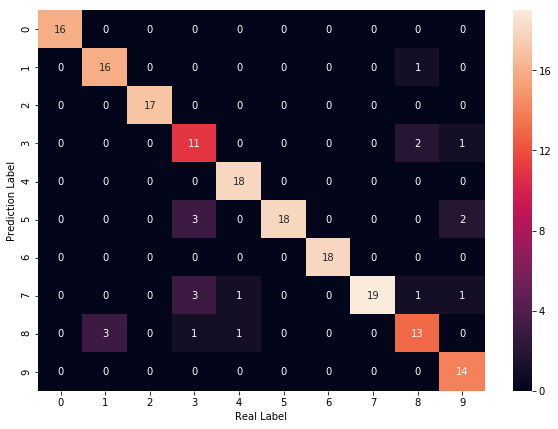

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 17., 17., 14., 18., 23., 18., 25., 18., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:126 index:[5] real:5
#1 min_error:141 index:[2] real:2
#2 min_error:146 index:[8] real:8
#3 min_error:30 index:[0] real:0
#4 min_error:110 index:[1] real:1
#5 min_error:84 index:[7] real:7
#6 min_error:69 index:[6] real:6
#7 min_error:97 index:[3] real:3
#8 min_error:61 index:[2] real:2
#9 min_error:123 index:[1] real:1
#10 min_error:153 index:[7] real:7
#11 min_error:162 index:[7] real:4
#12 min_error:85 index:[6] real:6
#13 min_error:104 index:[3] real:3
#14 min_error:115 index:[1] real:1
#15 min_error:141 index:[3] real:3
#16 min_error:162 index:[7] real:9
#17 min_error:111 index:[1] real:1
#18 min_error:125 index:[7] real:7
#19 min_error:51 index:[6] real:6
#20 min_error:145 index:[8] real:8
#21 min_error:61 index:[4] real:4
#22 min_error:97 index:[3] real:3
#23 min_error:125 index:[1] real:1
#24 min_error:66 index:[4] real:4
#25 min_error:56 index:[0] real:0
#26 min_error:76 index:[5] real:5
#27 min_error:90 index:[3] real:3
#28 min_error:128 index:[6] real:6
#29 min_

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:10163 Total connections::11556


In [25]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9282622139764997
Avg Base Learner:0.807539026996673


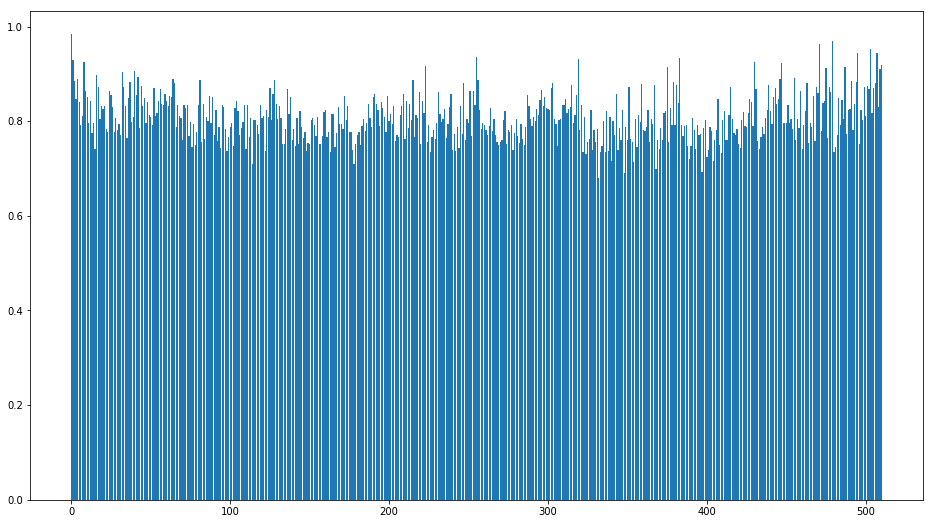

In [28]:
plt.figure(figsize = (16,9))
plt.bar(range(511),winner_fitness)
plt.show()

In [ ]:
winner_list